**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. ([2-1]부터 [2-10], [3-1]부터 [3-2] 까지 미션 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[주피터 노트북 파일 안내]</span>**
1. 탐색적 데이터 분석(solution).ipynb: 미션 수행 대상 아님. 제공된 solution을 참고하여 [2-1]부터의 미션 수행을 위한 탐색적 데이터 분석 진행</br>
2. 데이터 전처리.ipynb: [2-1]부터 [2-8] 까지 미션 수행 대상</br>
3. 모델링(머신러닝).ipynb: [3-1]부터 [3-2] 까지 미션 수행 대상. [4-1]~[4-4]는 선택 사항임</br>

#### **<span style="color:red">[데이터 설명]</span>**

* air_2021.csv : 2021년 미세먼지 데이터
* air_2022.csv : 2022년 미세먼지 데이터
* weather_2021.csv : 2021년 날씨 데이터
* weather_2022.csv : 2022년 날씨 데이터
* 학습 데이터: 2021년의 미세먼지 농도 데이터, 테스트 데이터: 2022년의 미세먼지 농도 데이터

# [Step 1] 탐색적 데이터 분석

#### **<span style="color:blue">[1-1] 필요한 라이브러리 설치</span>**

In [249]:
# 필요한 라이브러리 설치 및 임포트
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
DATA_DIR = os.path.join(os.getcwd(), 'data')

---

#### **<span style="color:blue">[1-2] 미세먼지 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'utf-8'
* index_col = 0

In [251]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장
air_21 = pd.read_csv('./data/air_2021.csv', sep=',', encoding='utf-8', index_col=0)
air_22 = pd.read_csv('./data/air_2022.csv', sep=',', encoding='utf-8', index_col=0)

In [252]:
# air_21 데이터의 head 확인
air_21.head()

지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10  \
0  서울 종로구  도시대기  111123  종로구  2021100101  0.003  0.6  0.002  0.039  31.0   
1  서울 종로구  도시대기  111123  종로구  2021100102  0.003  0.6  0.002  0.035  27.0   
2  서울 종로구  도시대기  111123  종로구  2021100103  0.003  0.6  0.002  0.033  28.0   
3  서울 종로구  도시대기  111123  종로구  2021100104  0.003  0.6  0.002  0.030  26.0   
4  서울 종로구  도시대기  111123  종로구  2021100105  0.003  0.5  0.003  0.026  26.0   

   PM25                주소  
0  18.0  서울 종로구 종로35가길 19  
1  16.0  서울 종로구 종로35가길 19  
2  18.0  서울 종로구 종로35가길 19  
3  16.0  서울 종로구 종로35가길 19  
4  16.0  서울 종로구 종로35가길 19

In [253]:
# air_21 데이터의 shape 확인
air_21.shape

(8760, 12)

In [254]:
# air_22 데이터의 head 확인
air_22.head()

지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10  \
0  서울 종로구  도시대기  111123  종로구  2022010101  0.003  0.4  0.026  0.016  23.0   
1  서울 종로구  도시대기  111123  종로구  2022010102  0.003  0.4  0.022  0.020  20.0   
2  서울 종로구  도시대기  111123  종로구  2022010103  0.003  0.5  0.014  0.028  20.0   
3  서울 종로구  도시대기  111123  종로구  2022010104  0.003  0.5  0.016  0.027  19.0   
4  서울 종로구  도시대기  111123  종로구  2022010105  0.003  0.5  0.005  0.040  24.0   

   PM25                주소  
0  12.0  서울 종로구 종로35가길 19  
1   9.0  서울 종로구 종로35가길 19  
2   9.0  서울 종로구 종로35가길 19  
3  10.0  서울 종로구 종로35가길 19  
4  11.0  서울 종로구 종로35가길 19

In [255]:
# air_22 데이터의 shape 확인
air_22.shape

(2160, 12)

---

#### **<span style="color:blue">[1-3] 날씨 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [256]:
#'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장
weather_21 = pd.read_csv('./data/weather_2021.csv', sep=',', encoding='cp949')
weather_22 = pd.read_csv('./data/weather_2022.csv', sep=',', encoding='cp949')

In [257]:
# 미세먼지 데이터와 같이 날씨 데이터의 head, shape 등을 확인
print(weather_21.shape)
weather_21.head()

(8759, 38)


지점 지점명                일시  기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  \
0  108  서울  2021-01-01 01:00    -8.7       NaN      NaN        NaN      2.4   
1  108  서울  2021-01-01 02:00    -9.1       NaN      NaN        NaN      1.6   
2  108  서울  2021-01-01 03:00    -9.3       NaN      NaN        NaN      1.1   
3  108  서울  2021-01-01 04:00    -9.3       NaN      NaN        NaN      0.3   
4  108  서울  2021-01-01 05:00    -9.7       NaN      NaN        NaN      1.9   

   풍속 QC플래그  풍향(16방위)  ...  최저운고(100m )  시정(10m)  지면상태(지면상태코드)  현상번호(국내식)  \
0       NaN     270.0  ...          NaN     2000           NaN        NaN   
1       NaN     270.0  ...          NaN     2000           NaN        NaN   
2       NaN     250.0  ...          NaN     2000           NaN        NaN   
3       NaN       0.0  ...          NaN     2000           NaN        NaN   
4       NaN      20.0  ...          NaN     2000           NaN        NaN   

   지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
0      -6.9         NaN          -1.0           -0.8            0.3   
1      -7.1         NaN          -1.1           -0.8            0.3   
2      -7.3         NaN          -1.2           -0.9            0.3   
3      -7.5         NaN          -1.3           -1.0            0.2   
4      -7.6         NaN          -1.3           -1.0            0.2   

   30cm 지중온도(°C)  
0            1.6  
1            1.6  
2            1.6  
3            1.5  
4            1.5  

[5 rows x 38 columns]

In [258]:
weather_21.describe()

지점       기온(°C)  기온 QC플래그     강수량(mm)  강수량 QC플래그      풍속(m/s)  \
count  8759.0  8759.000000       0.0  949.000000     1763.0  8757.000000   
mean    108.0    13.739194       NaN    1.250263        9.0     2.311328   
std       0.0    10.894786       NaN    3.398801        0.0     1.120906   
min     108.0   -18.500000       NaN    0.000000        9.0     0.000000   
25%     108.0     6.000000       NaN    0.000000        9.0     1.500000   
50%     108.0    14.600000       NaN    0.100000        9.0     2.200000   
75%     108.0    22.600000       NaN    1.100000        9.0     2.900000   
max     108.0    36.300000       NaN   64.700000        9.0     8.300000   

       풍속 QC플래그     풍향(16방위)  풍향 QC플래그        습도(%)  ...  최저운고(100m )  \
count       2.0  8757.000000       2.0  8759.000000  ...  4547.000000   
mean        9.0   169.658559       9.0    65.589223  ...    15.161425   
std         0.0   107.549684       0.0    18.394276  ...    13.537921   
min         9.0     0.000000       9.0    19.000000  ...     1.000000   
25%         9.0    50.000000       9.0    51.000000  ...     7.000000   
50%         9.0   200.000000       9.0    66.000000  ...    10.000000   
75%         9.0   270.000000       9.0    80.000000  ...    16.000000   
max         9.0   360.000000       9.0   100.000000  ...    76.000000   

           시정(10m)  지면상태(지면상태코드)     현상번호(국내식)     지면온도(°C)  지면온도 QC플래그  \
count  8759.000000           0.0  2.125000e+03  8754.000000    24.00000   
mean   1719.765384           NaN  1.367177e+04    14.734304     1.87500   
std     521.130959           NaN  4.170156e+05    12.042066     3.73366   
min      33.000000           NaN  1.000000e+00   -12.700000     0.00000   
25%    1719.000000           NaN  5.000000e+00     4.300000     0.00000   
50%    2000.000000           NaN  1.900000e+01    15.400000     0.00000   
75%    2000.000000           NaN  1.901000e+03    23.600000     0.00000   
max    2000.000000           NaN  1.916020e+07    56.800000     9.00000   

       5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
count   8754.000000    8754.000000    8754.000000    8754.000000  
mean      15.128581      14.555118      14.533276      14.827633  
std       10.175582      10.044423       9.739277       9.360493  
min       -4.700000      -4.600000      -3.000000      -0.800000  
25%        5.900000       5.500000       5.600000       6.300000  
50%       15.400000      14.700000      14.600000      15.100000  
75%       24.100000      23.500000      23.400000      23.600000  
max       35.700000      33.700000      31.900000      30.600000  

[8 rows x 35 columns]

In [259]:
# 미세먼지 데이터와 같이 날씨 데이터의 head, shape 등을 확인
print(weather_22.shape)
weather_22.head()

(2160, 38)


지점 지점명                일시  기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  \
0  108  서울  2022-01-01 00:00    -8.5       NaN      NaN        NaN      1.9   
1  108  서울  2022-01-01 01:00    -9.2       NaN      NaN        NaN      1.8   
2  108  서울  2022-01-01 02:00    -9.5       NaN      NaN        NaN      1.2   
3  108  서울  2022-01-01 03:00    -9.3       NaN      NaN        NaN      1.4   
4  108  서울  2022-01-01 04:00    -9.6       NaN      NaN        NaN      1.7   

   풍속 QC플래그  풍향(16방위)  ...  최저운고(100m )  시정(10m)  지면상태(지면상태코드)  현상번호(국내식)  \
0       NaN       320  ...          NaN     2000           NaN        NaN   
1       NaN       270  ...          NaN     2000           NaN        NaN   
2       NaN       270  ...          NaN     2000           NaN        NaN   
3       NaN       290  ...          NaN     2000           NaN        NaN   
4       NaN       340  ...          NaN     2000           NaN        NaN   

   지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  \
0      -7.0         NaN          -1.0           -1.0           -0.2   
1      -7.2         NaN          -1.1           -1.1           -0.2   
2      -7.5         NaN          -1.3           -1.2           -0.2   
3      -7.6         NaN          -1.4           -1.2           -0.2   
4      -7.6         NaN          -1.4           -1.3           -0.3   

   30cm 지중온도(°C)  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  

[5 rows x 38 columns]

In [260]:
weather_22.describe()

지점       기온(°C)  기온 QC플래그    강수량(mm)  강수량 QC플래그      풍속(m/s)  \
count  2160.0  2160.000000       0.0  81.000000      382.0  2160.000000   
mean    108.0     1.518148       NaN   1.392593        9.0     2.430231   
std       0.0     6.358060       NaN   4.087321        0.0     1.164067   
min     108.0   -11.300000       NaN   0.000000        9.0     0.000000   
25%     108.0    -3.300000       NaN   0.000000        9.0     1.600000   
50%     108.0     1.200000       NaN   0.000000        9.0     2.300000   
75%     108.0     6.100000       NaN   0.900000        9.0     3.100000   
max     108.0    19.400000       NaN  32.200000        9.0     7.900000   

       풍속 QC플래그     풍향(16방위)  풍향 QC플래그        습도(%)  ...  최저운고(100m )  \
count       0.0  2160.000000       0.0  2160.000000  ...   743.000000   
mean        NaN   212.856481       NaN    57.306481  ...    12.454913   
std         NaN   100.383875       NaN    17.524800  ...     9.158550   
min         NaN     0.000000       NaN    17.000000  ...     2.000000   
25%         NaN   160.000000       NaN    45.000000  ...     7.000000   
50%         NaN   250.000000       NaN    55.000000  ...    10.000000   
75%         NaN   270.000000       NaN    69.000000  ...    14.000000   
max         NaN   360.000000       NaN   100.000000  ...    60.000000   

           시정(10m)  지면상태(지면상태코드)      현상번호(국내식)     지면온도(°C)  지면온도 QC플래그  \
count  2160.000000           0.0     418.000000  2160.000000         7.0   
mean   1737.135648           NaN    5578.363636     2.495093         0.0   
std     488.601856           NaN   33784.324460     7.624066         0.0   
min     141.000000           NaN       1.000000   -10.500000         0.0   
25%    1721.750000           NaN      19.000000    -2.800000         0.0   
50%    2000.000000           NaN      19.000000     0.000000         0.0   
75%    2000.000000           NaN      42.000000     7.000000         0.0   
max    2000.000000           NaN  401905.000000    31.100000         0.0   

       5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  
count   2160.000000    2160.000000    2160.000000    2160.000000  
mean       2.196620       1.678241       1.673843       2.142685  
std        4.069035       3.937891       3.706190       3.399132  
min       -2.400000      -2.400000      -1.400000      -0.300000  
25%       -0.300000      -0.700000      -0.500000       0.000000  
50%        0.200000      -0.300000      -0.400000       0.100000  
75%        4.900000       4.500000       4.225000       3.825000  
max       13.100000      12.000000      11.000000      10.500000  

[8 rows x 35 columns]

---

#### **<span style="color:blue">[1-4] 데이터 변수 확인</span>**

In [261]:
# 각 데이터프레임의 info 확인
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [262]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


In [263]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [264]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

---

#### **<span style="color:blue">[1-5] 미세먼지 데이터 분석</span>**

* 데이터 전처리와 모델링을 위해 데이터 분석을 진행해보세요. 시각화 등을 통해 관측치들의 패턴 탐색, 잘못된 자료 탐색, 변수들간의 관계 파악을 할 수 있습니다.

In [ ]:
# 시각화 한글폰트 설정 (아래 코드를 실행하세요)
plt.rc('font', family='AppleGothic')
sns.set_theme(font="AppleGothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

Dataframe 분석 및 시각화 함수

In [266]:
def explore_and_visualize(df):
    """
    데이터프레임을 다양한 변수에 대해 시각화하는 함수입니다.
    """
    # 결측치 개수 및 비율 확인
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n")

    # 기본 통계 요약 출력
    print("Statistical Summary:")
    print(df.describe())
    print("\n")

    # 연속형 및 범주형 변수 분류
    numeric_columns = df.select_dtypes(include=np.number).columns
    categorical_columns = df.select_dtypes(include='object').columns

    # 연속형 변수 시각화
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))
        
        # 히스토그램과 KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        
        # 박스플롯 (이상치 확인)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

    # 범주형 변수 시각화
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.show()

    # 연속형 변수 간의 상관관계 히트맵
    if len(numeric_columns) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Heatmap")
        plt.show()

    # 연속형 변수 간의 관계 시각화 (페어플롯)
    if len(numeric_columns) > 1:
        sns.pairplot(df[numeric_columns], diag_kind='kde', plot_kws={'alpha':0.5})
        plt.suptitle("Pairplot of Numerical Features", y=1.02)
        plt.show()

    # 범주형 변수와 연속형 변수 간의 관계 시각화
    for cat_col in categorical_columns:
        for num_col in numeric_columns:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f'{num_col} by {cat_col}')
            plt.show()

Missing Values:
지역         0
망          0
측정소코드      0
측정소명       0
측정일시       0
SO2      112
CO        80
O3        97
NO2       80
PM10     105
PM25      97
주소         0
dtype: int64


Statistical Summary:
          측정소코드          측정일시          SO2           CO           O3  \
count    8760.0  8.760000e+03  8648.000000  8680.000000  8663.000000   
mean   111123.0  2.021067e+09     0.003385     0.505645     0.029246   
std         0.0  3.450216e+04     0.000826     0.209516     0.019708   
min    111123.0  2.021010e+09     0.001000     0.200000     0.000000   
25%    111123.0  2.021040e+09     0.003000     0.400000     0.015000   
50%    111123.0  2.021070e+09     0.003000     0.400000     0.028000   
75%    111123.0  2.021100e+09     0.004000     0.600000     0.040000   
max    111123.0  2.021123e+09     0.011000     2.000000     0.137000   

               NO2         PM10         PM25  
count  8680.000000  8655.000000  8663.000000  
mean      0.023346    38.925361    20.466005  
st

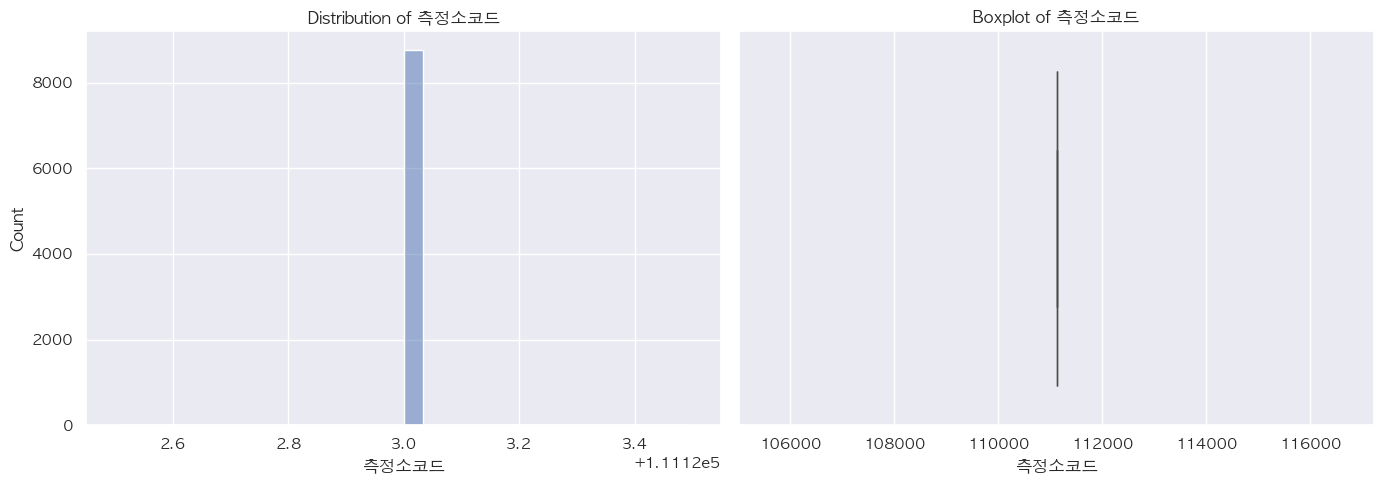

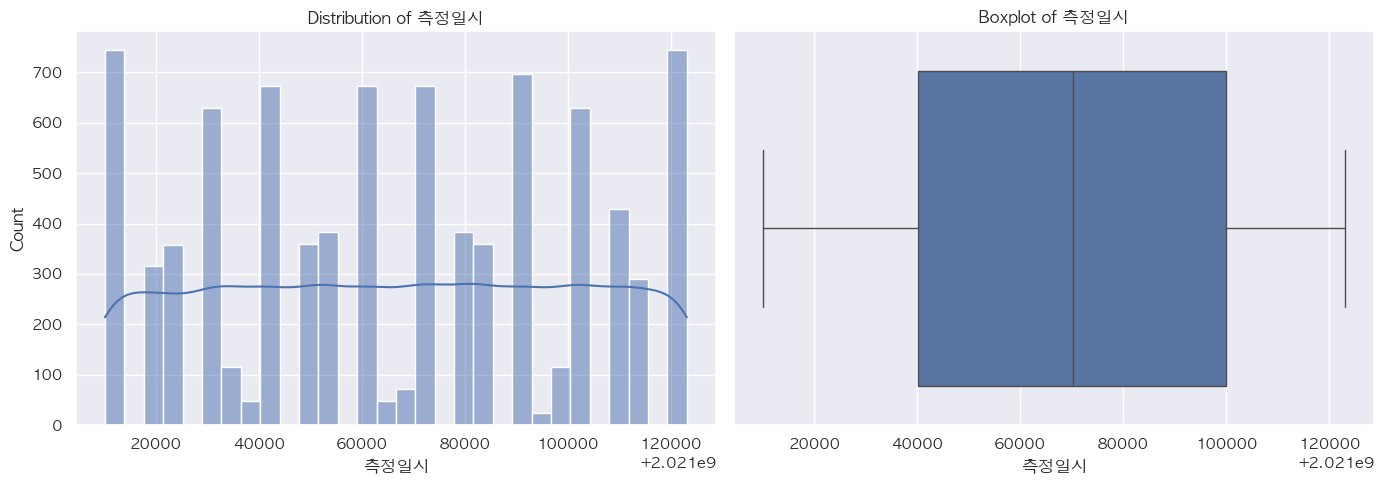

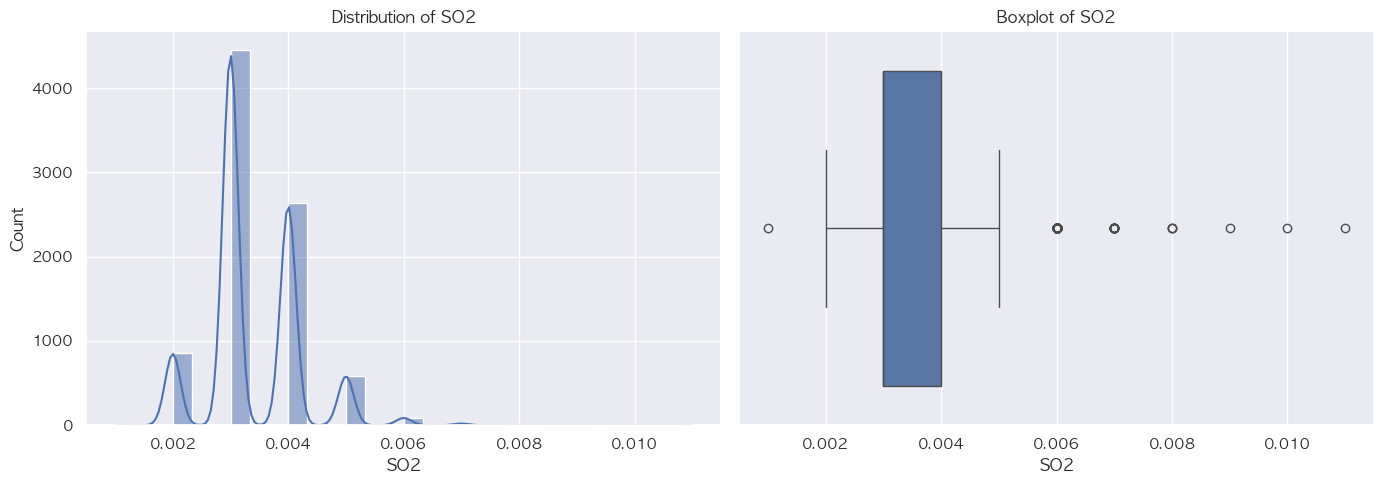

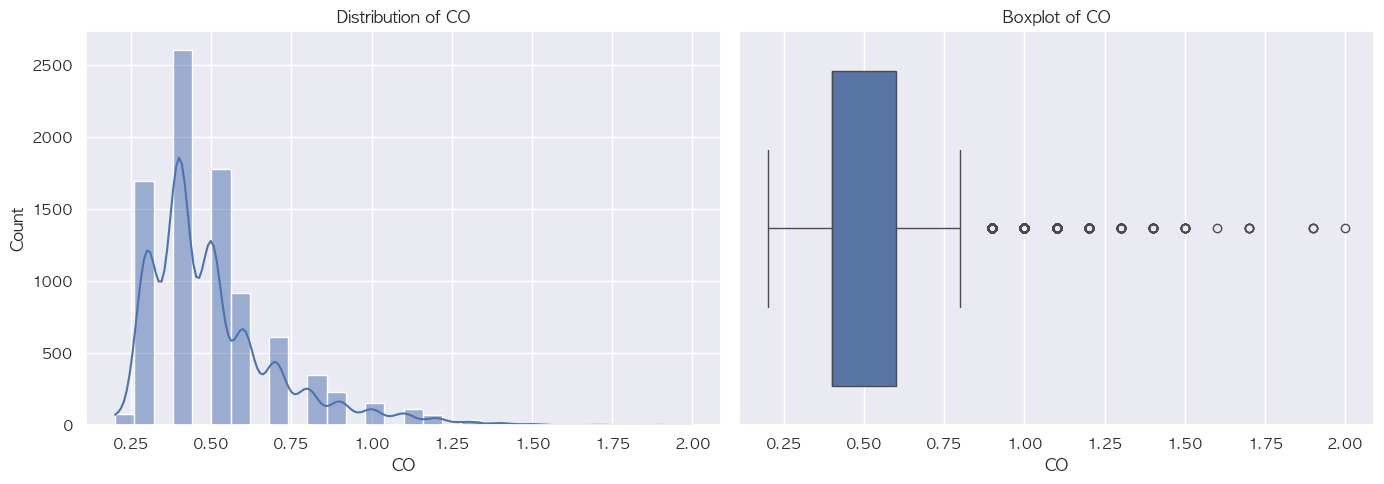

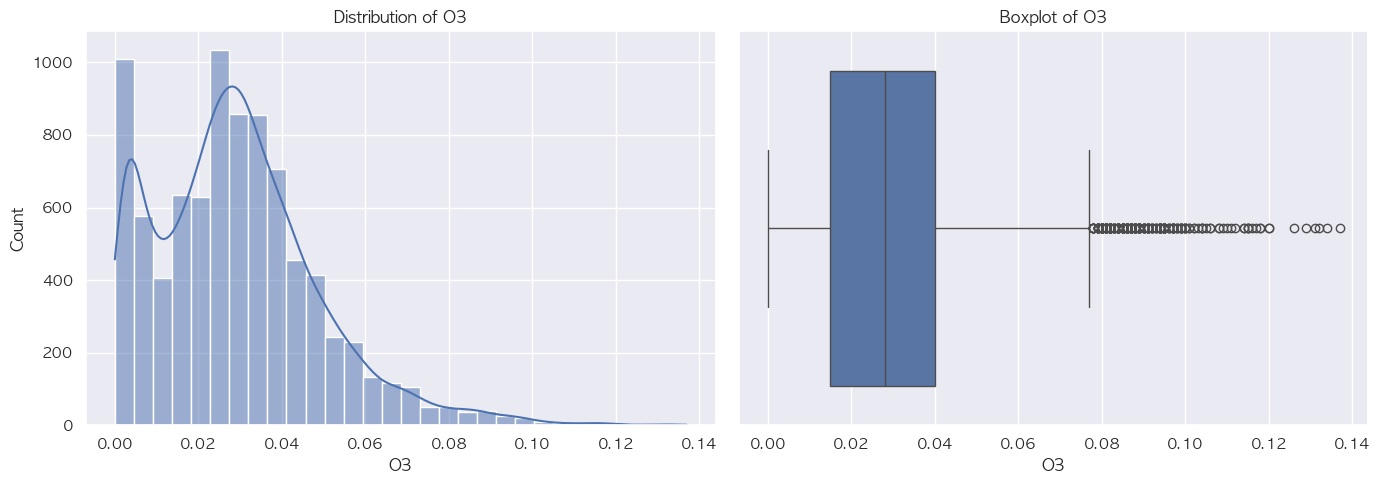

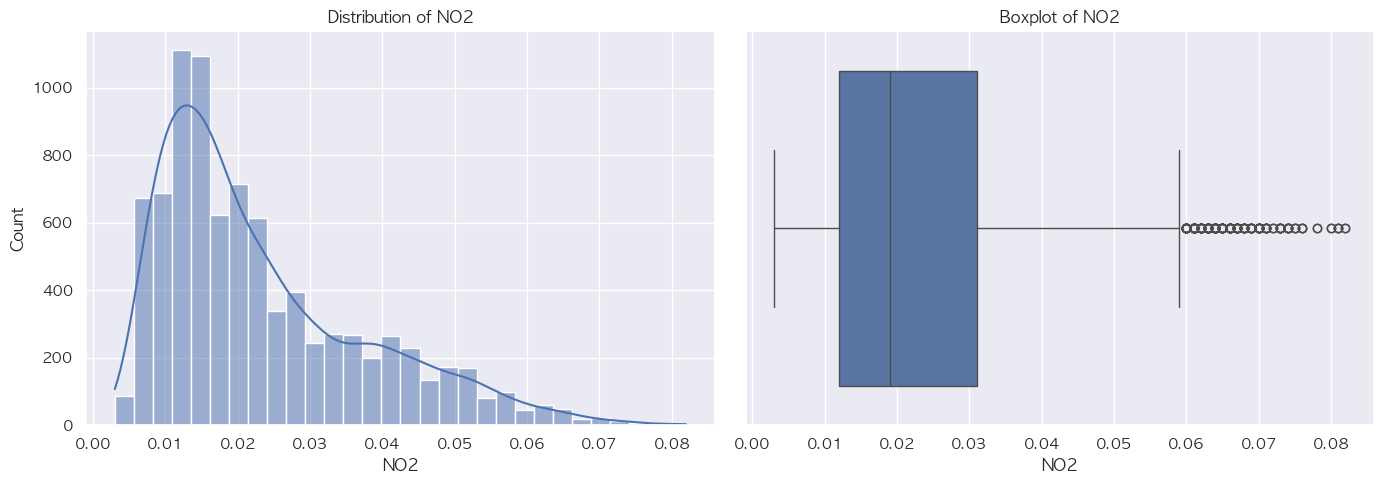

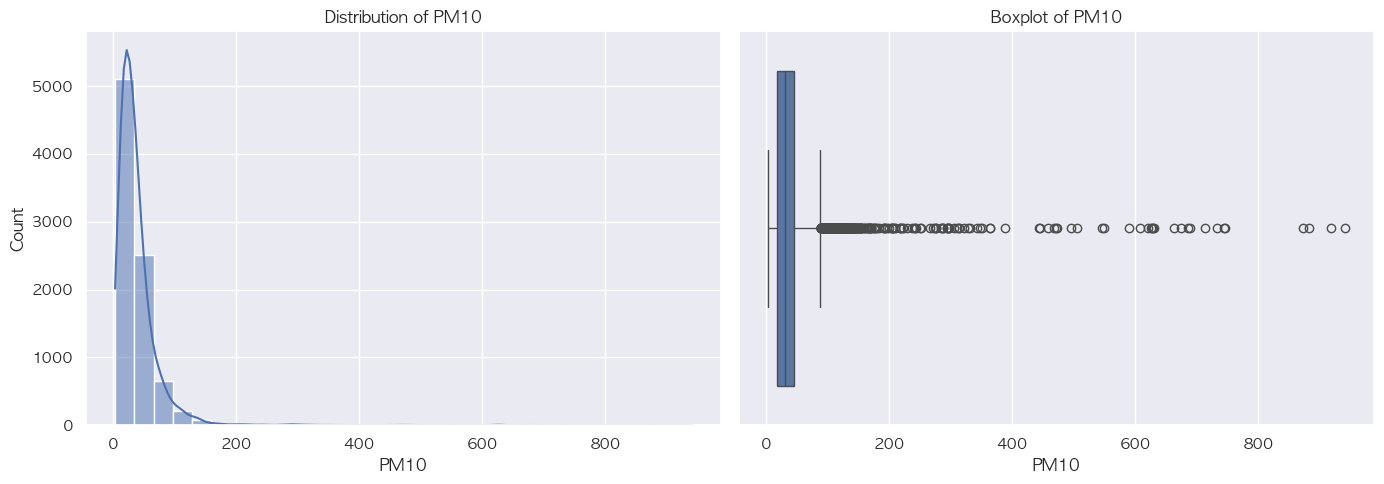

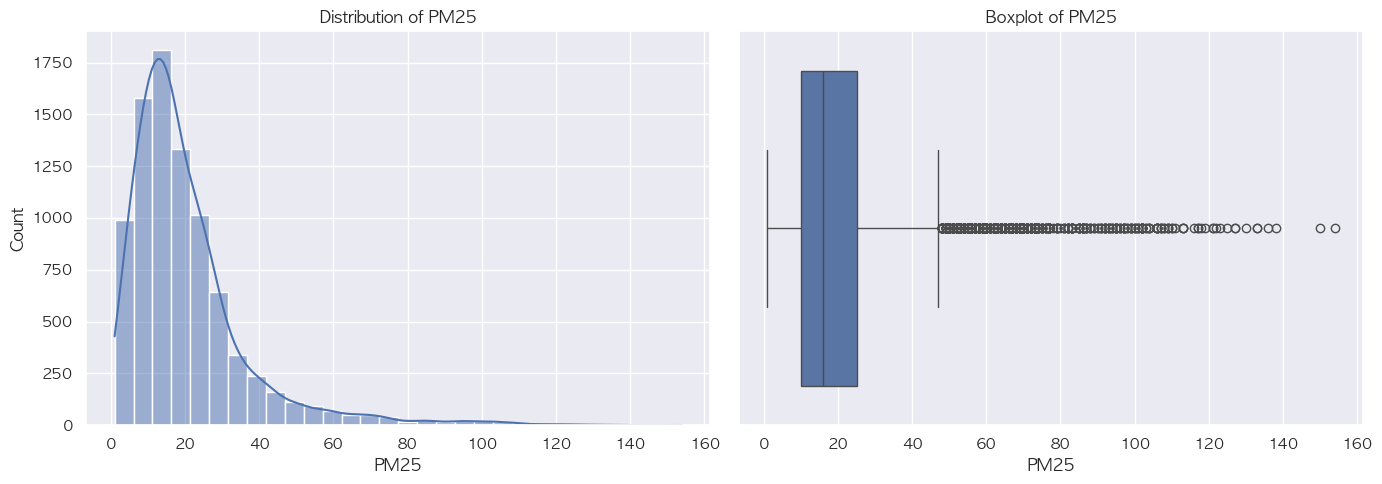

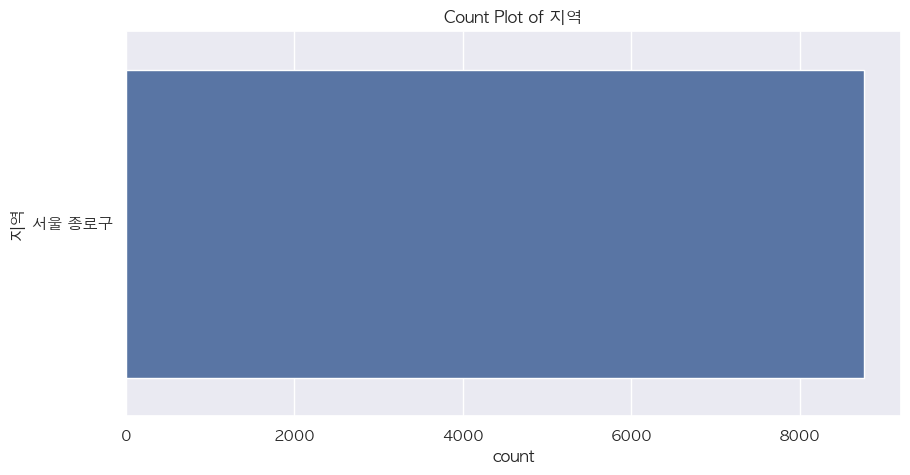

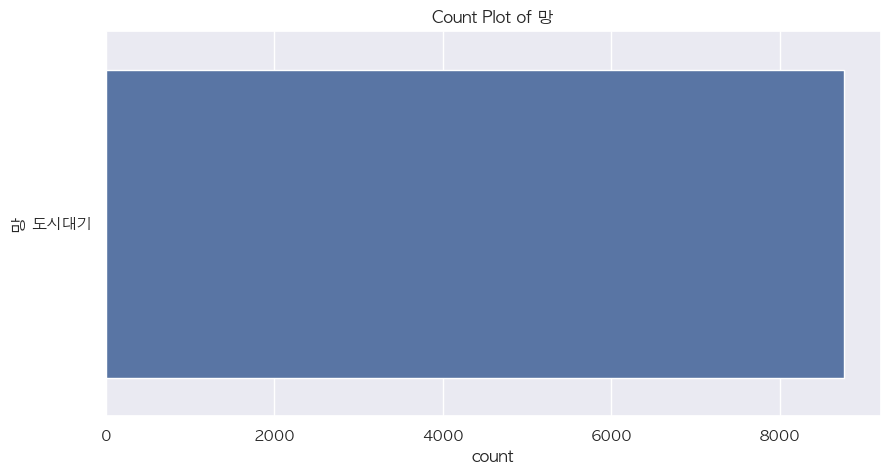

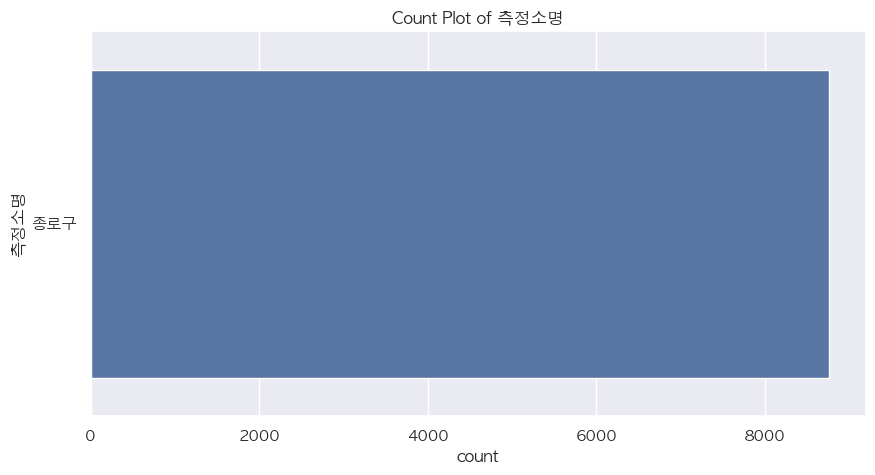

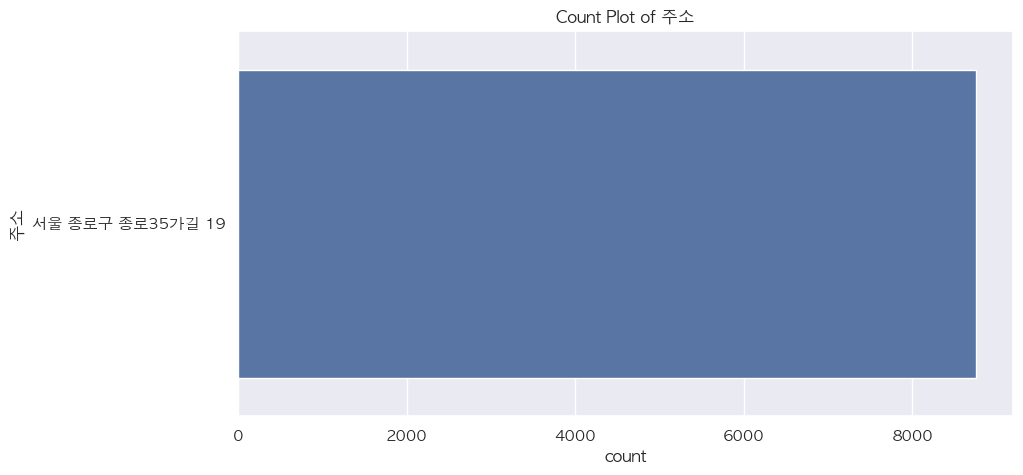

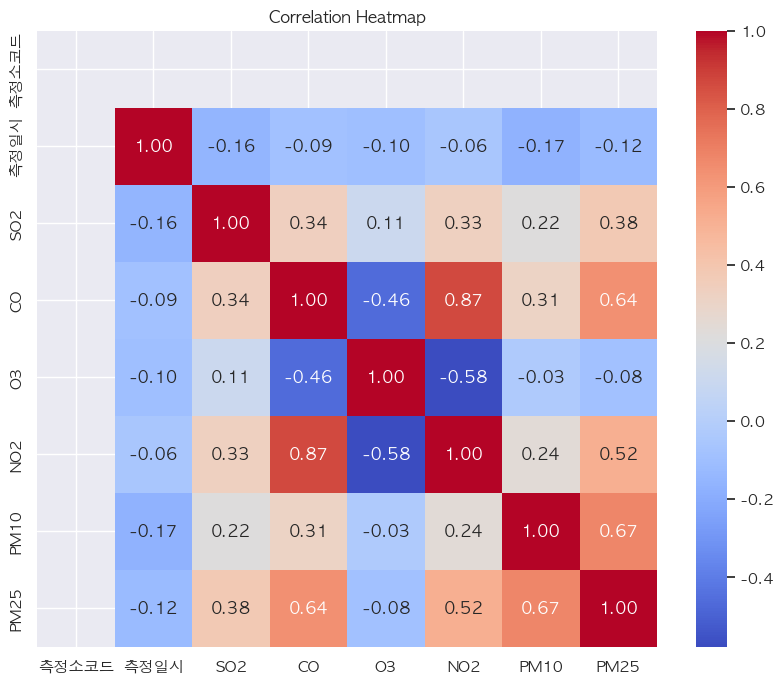

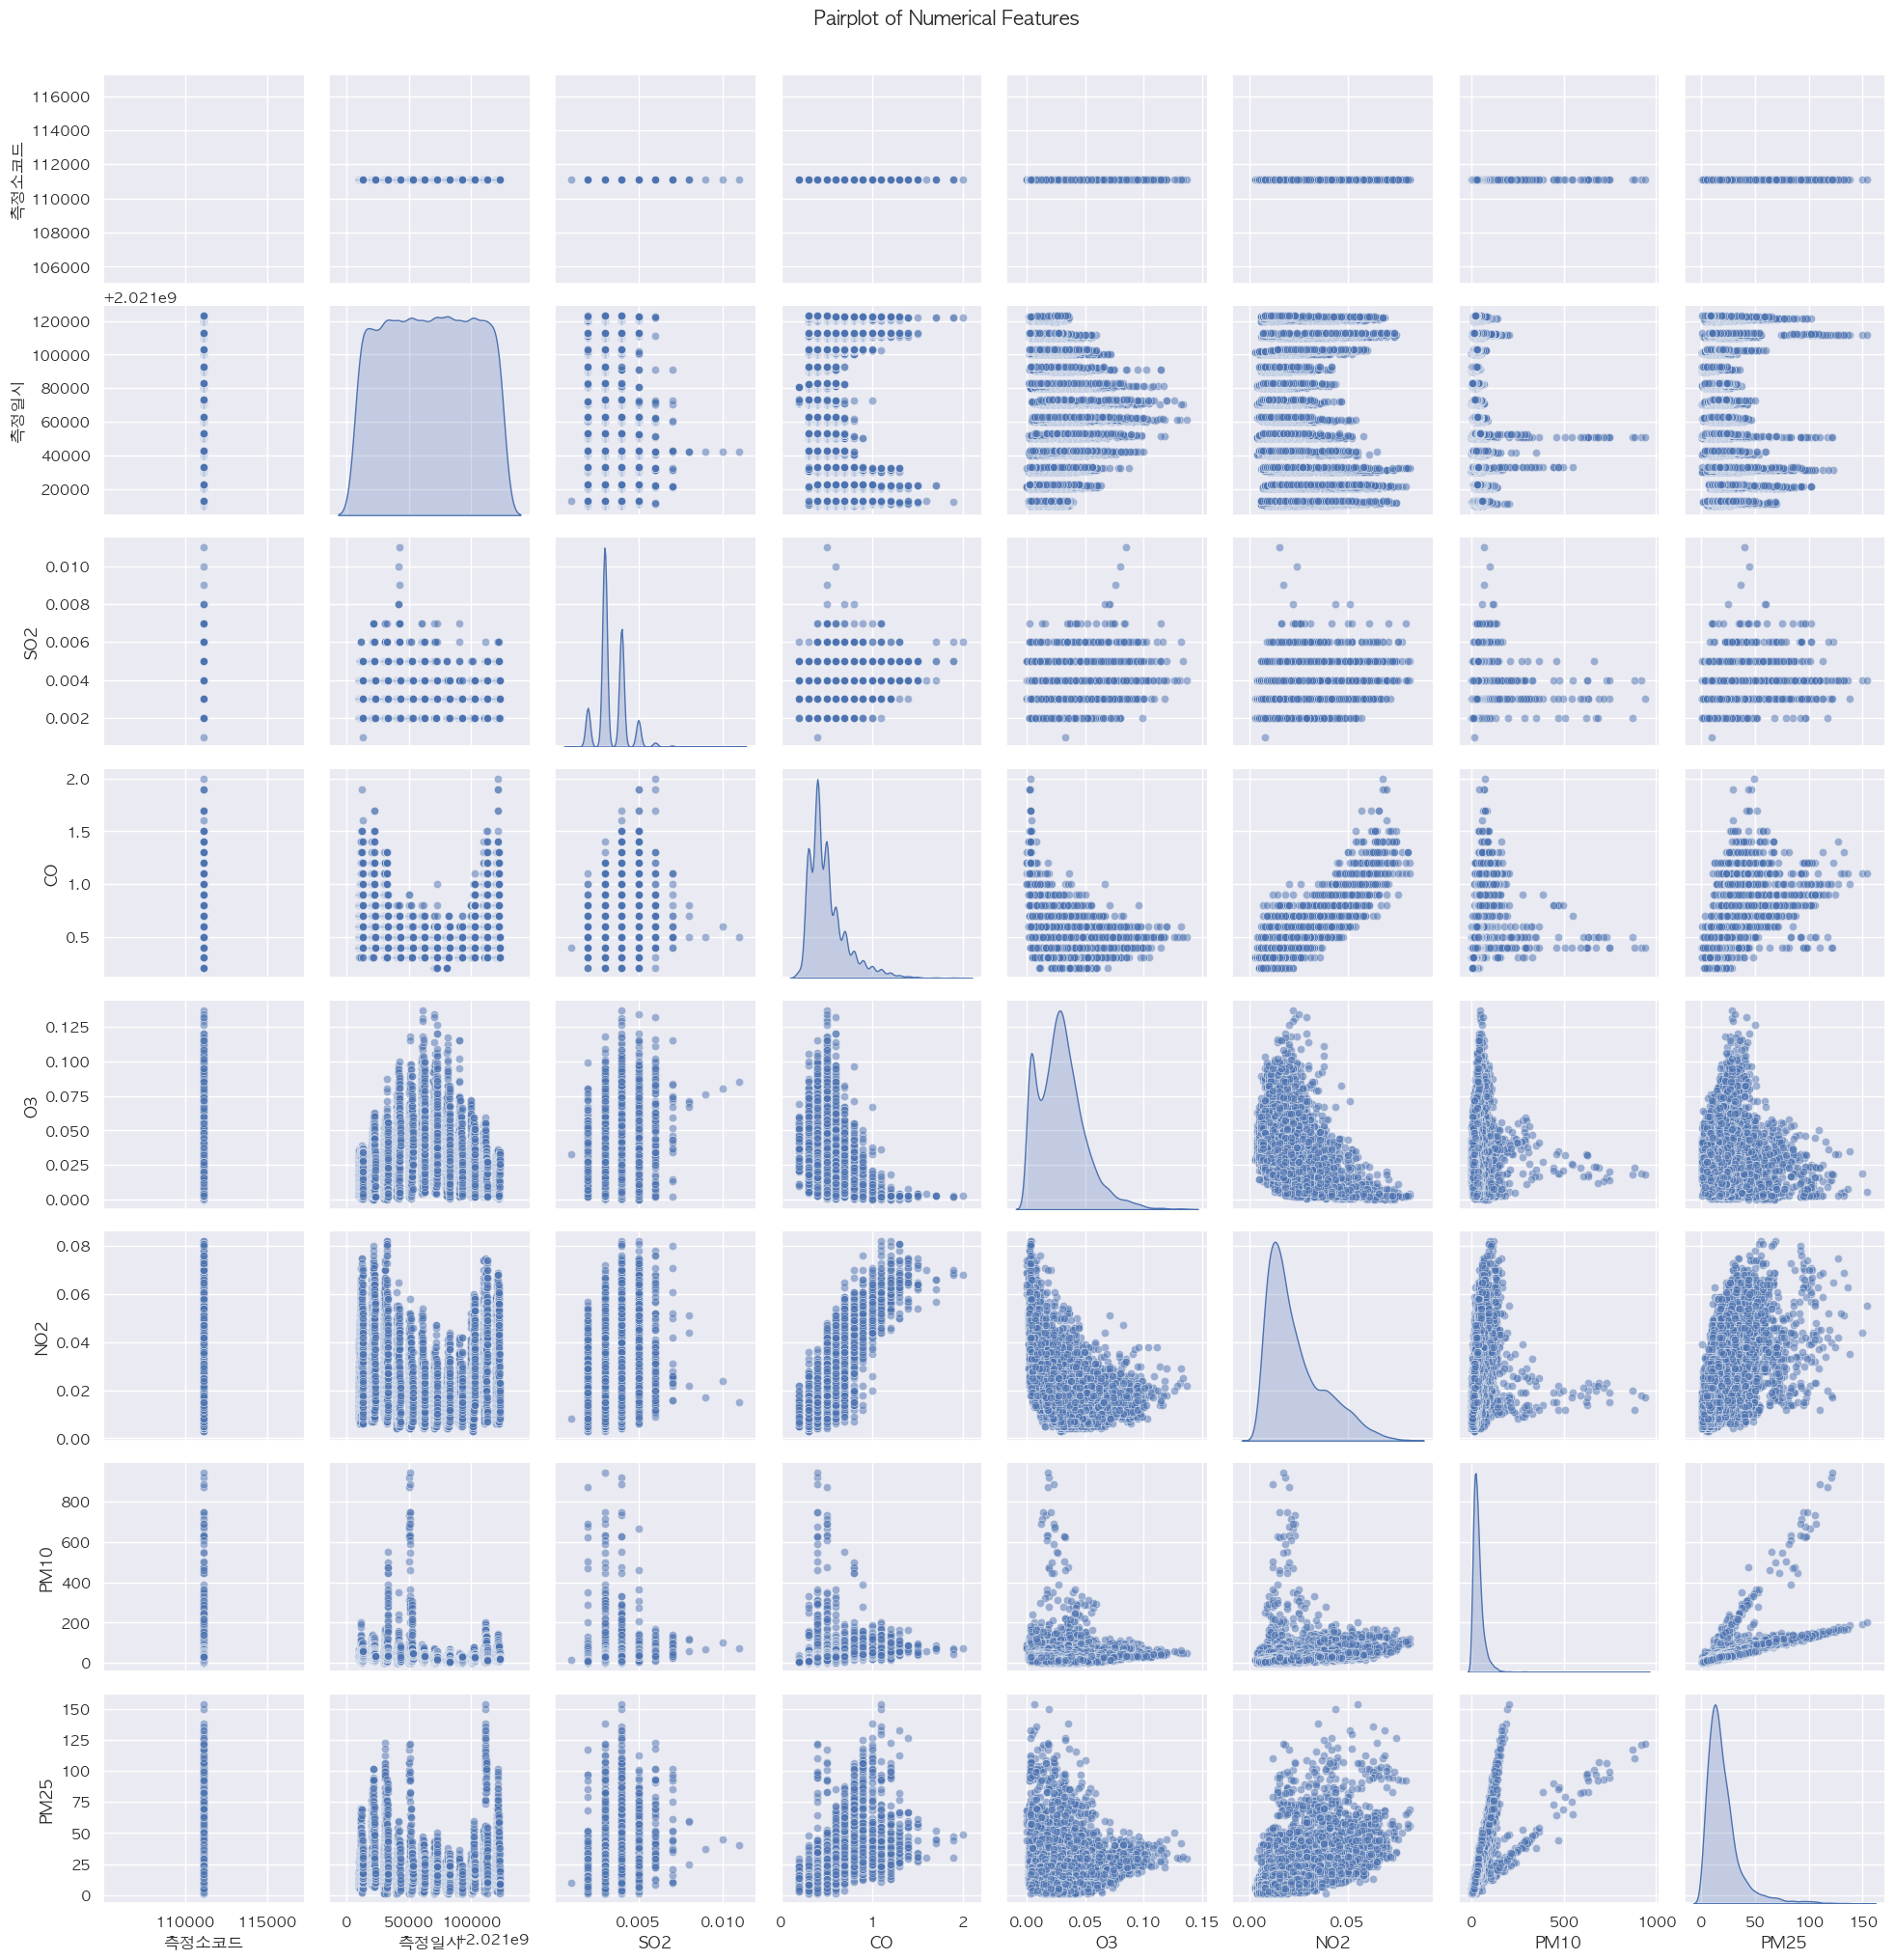

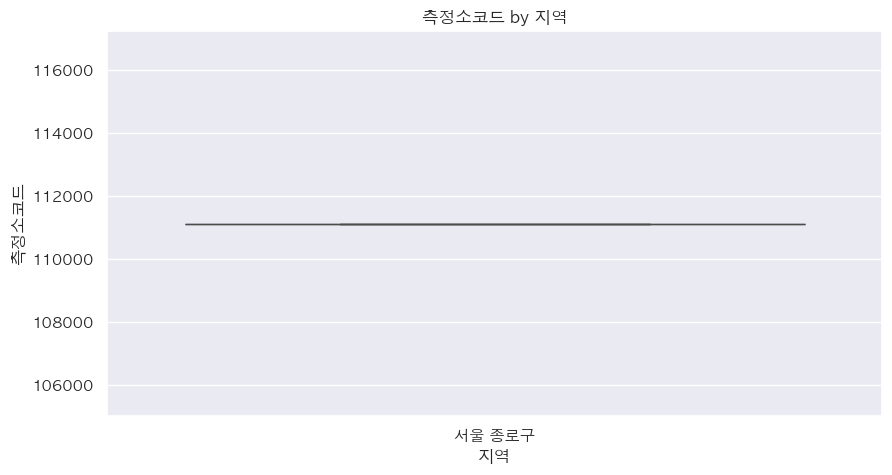

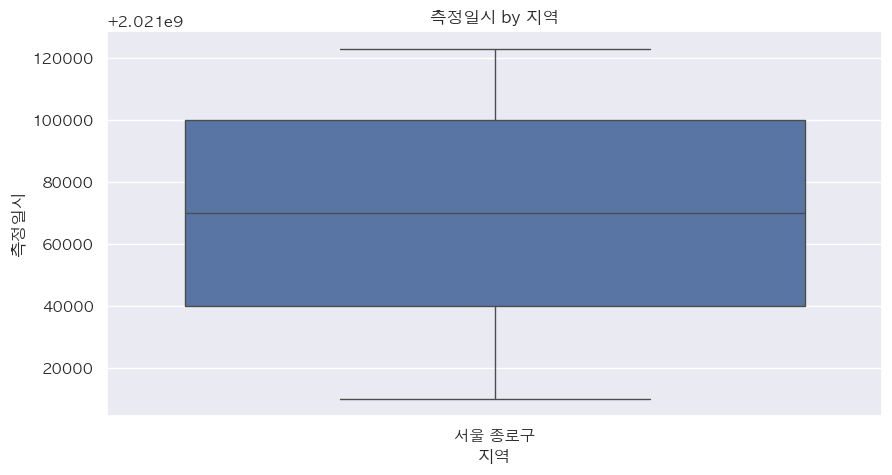

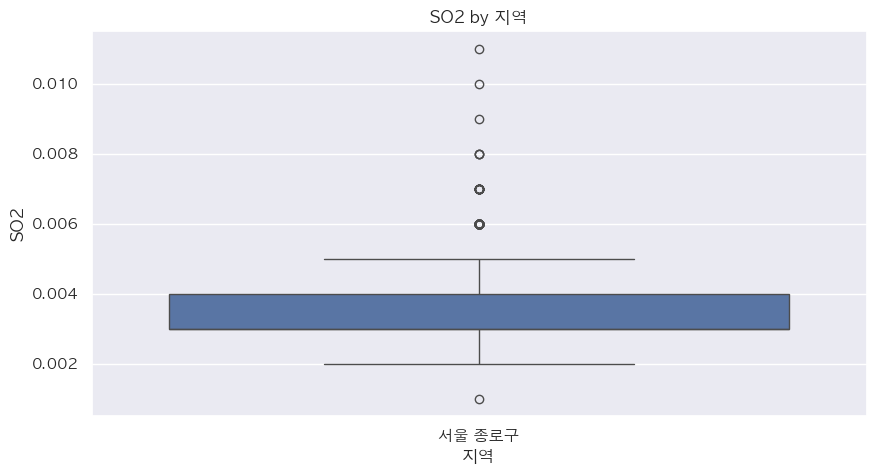

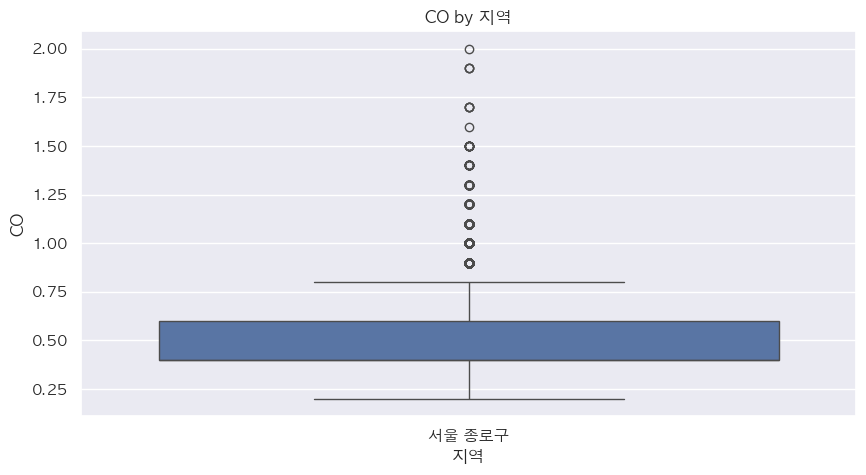

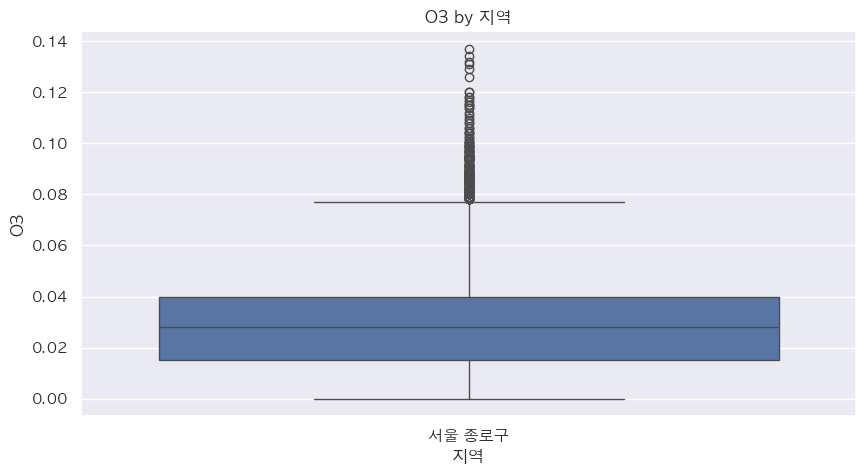

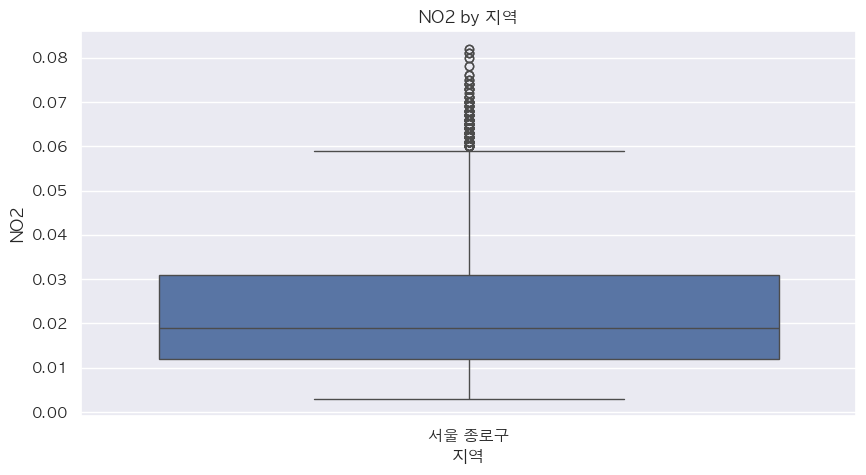

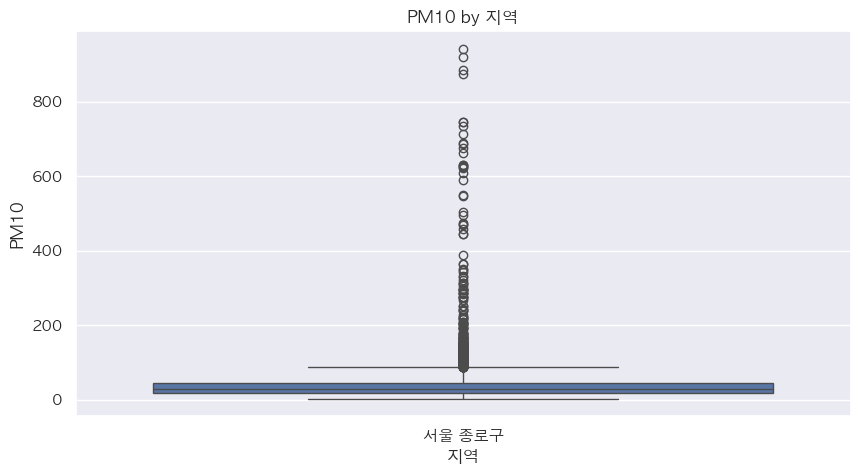

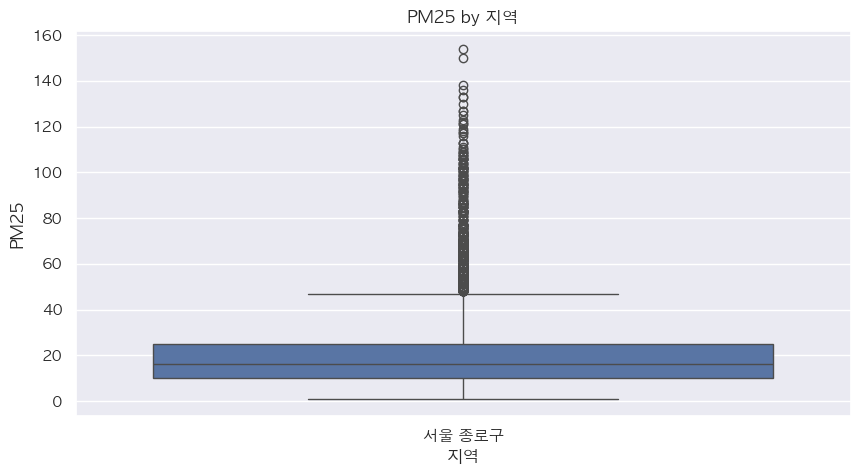

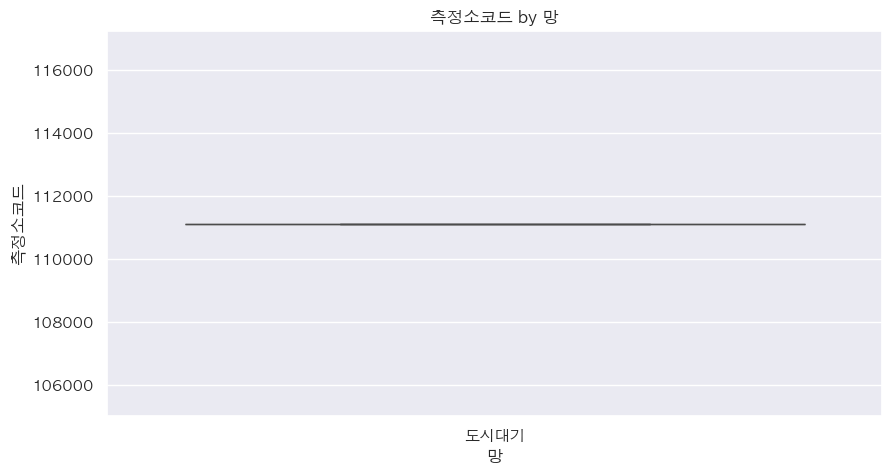

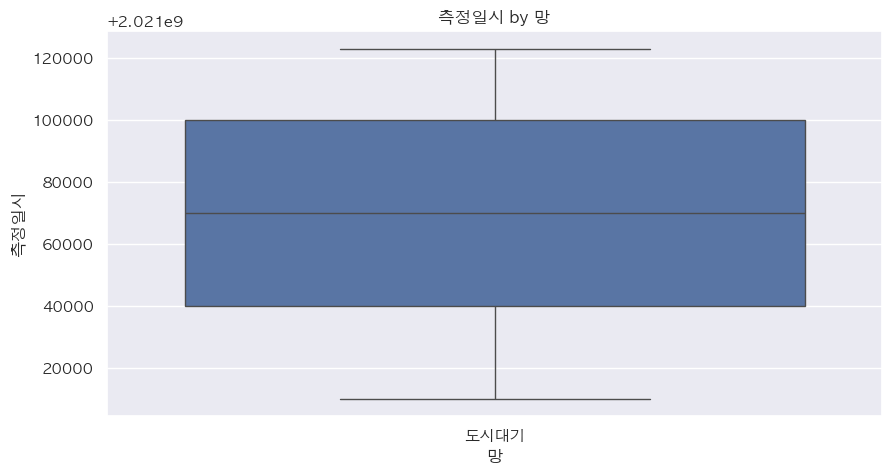

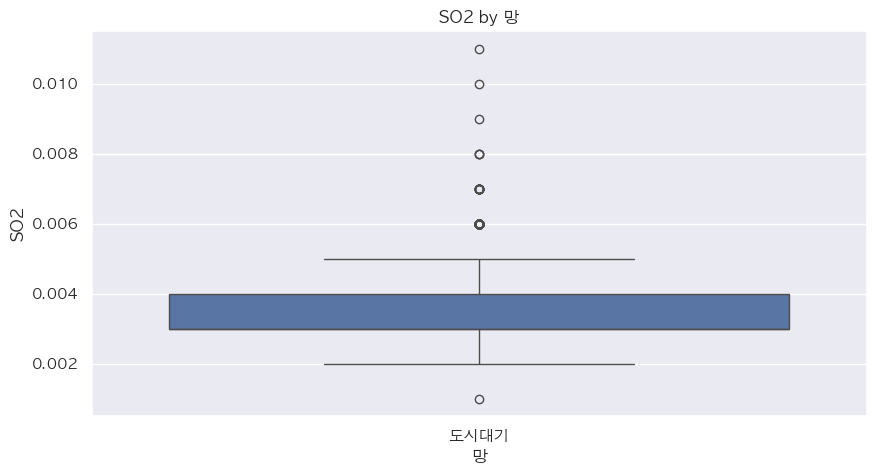

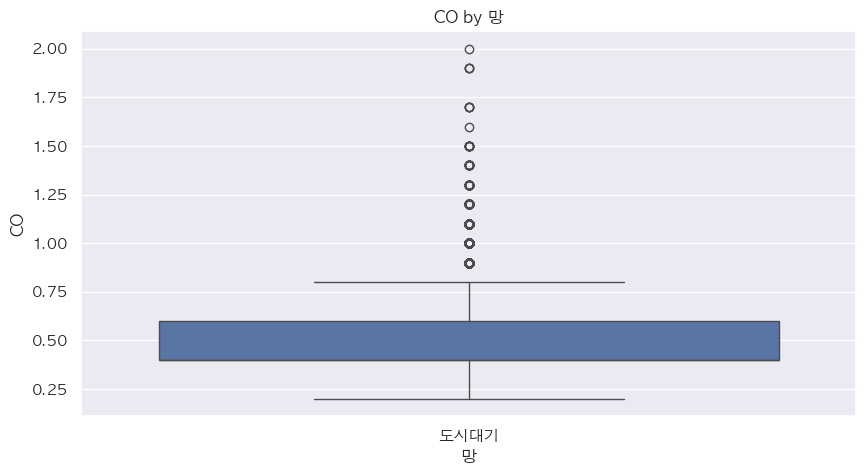

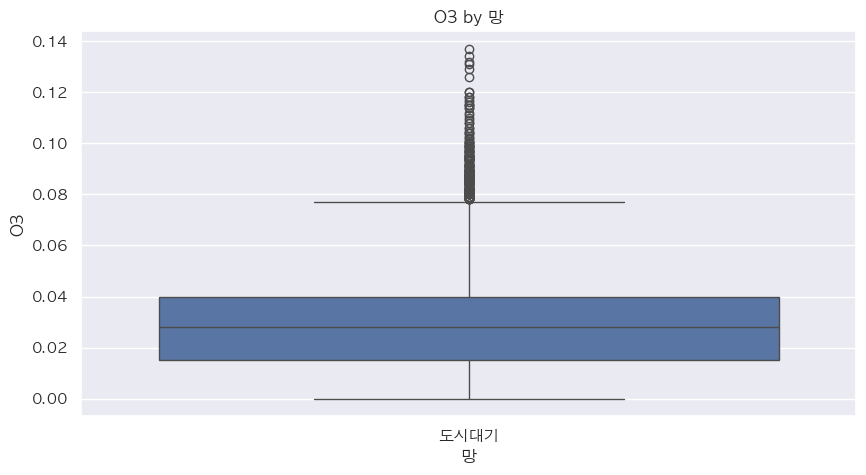

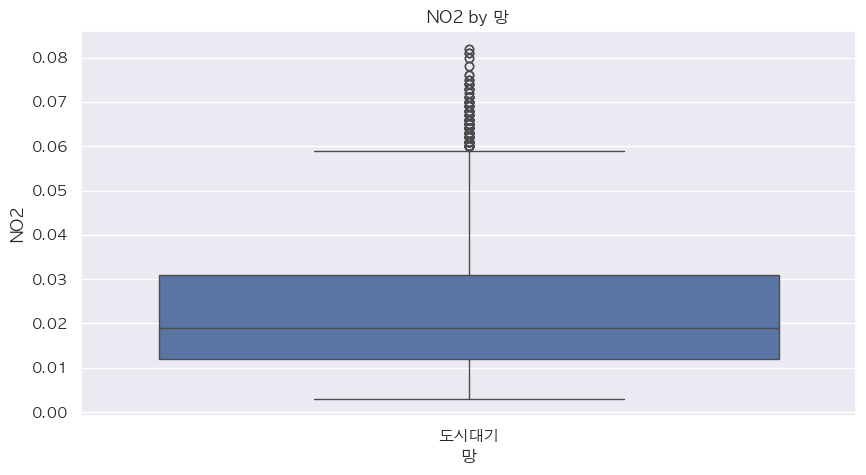

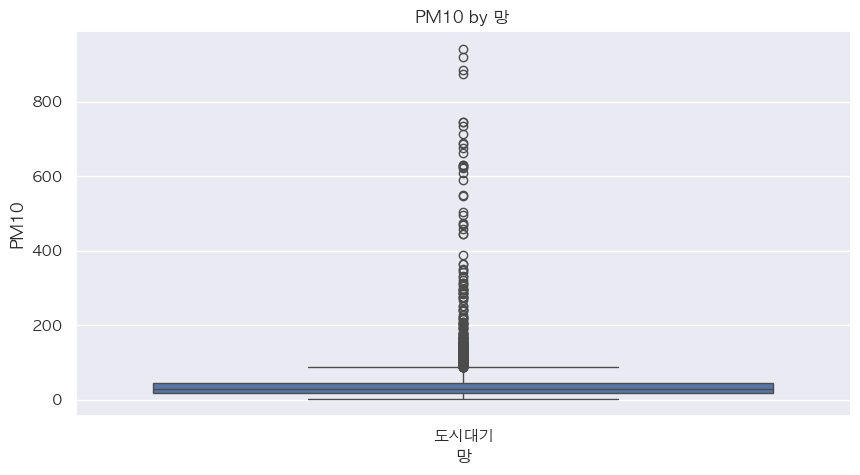

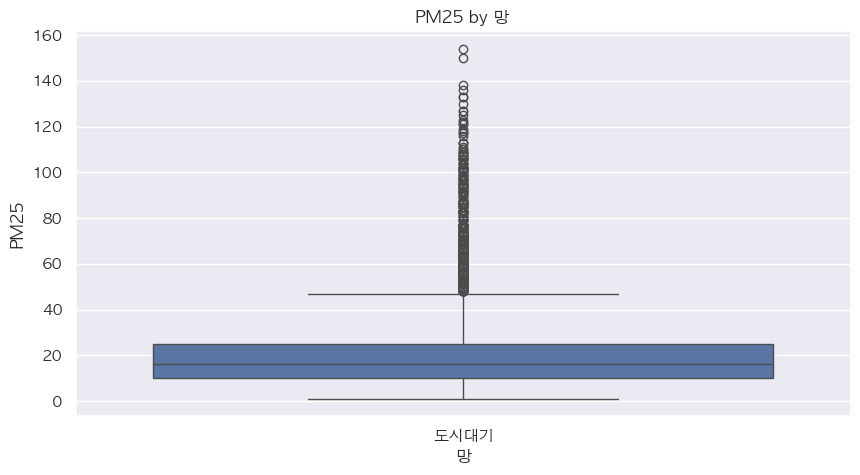

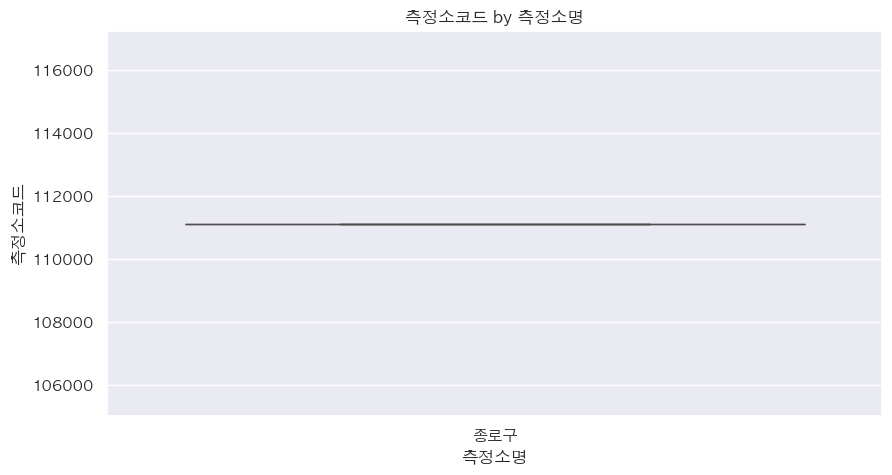

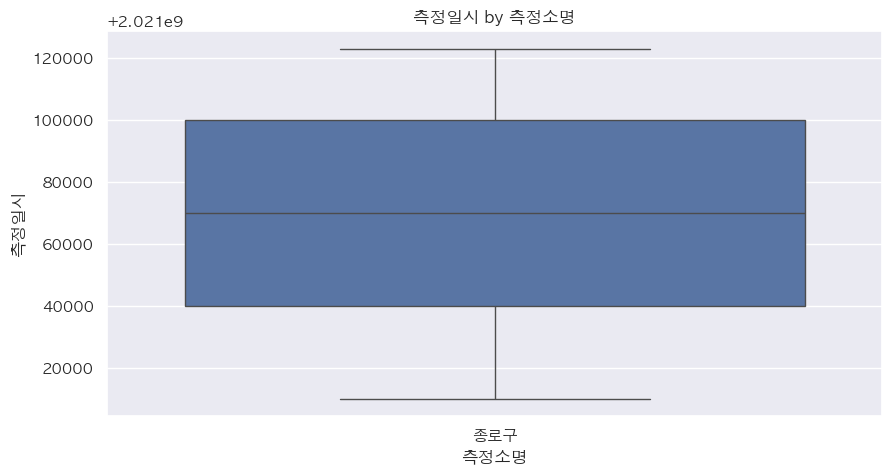

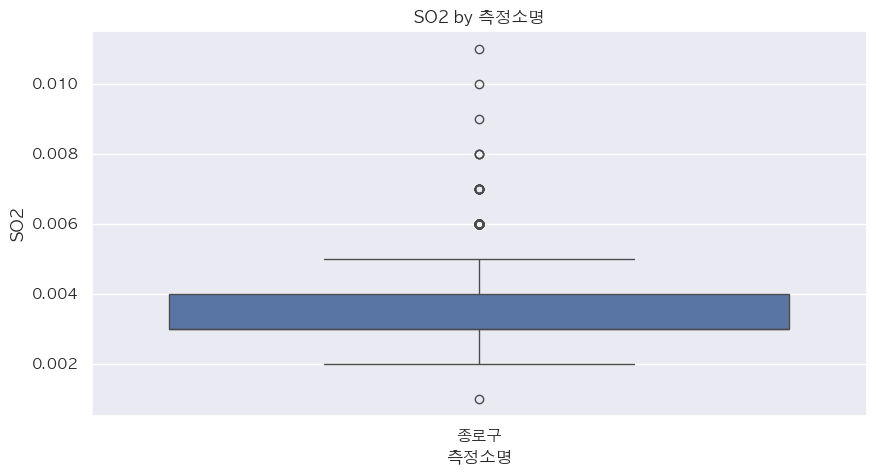

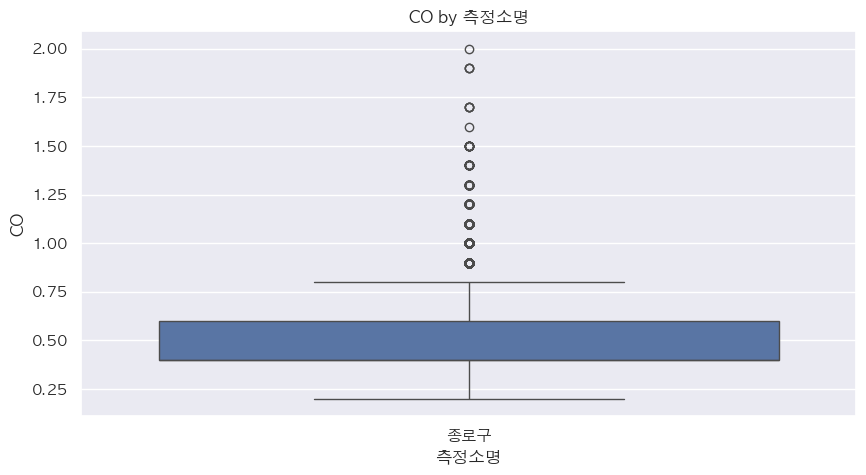

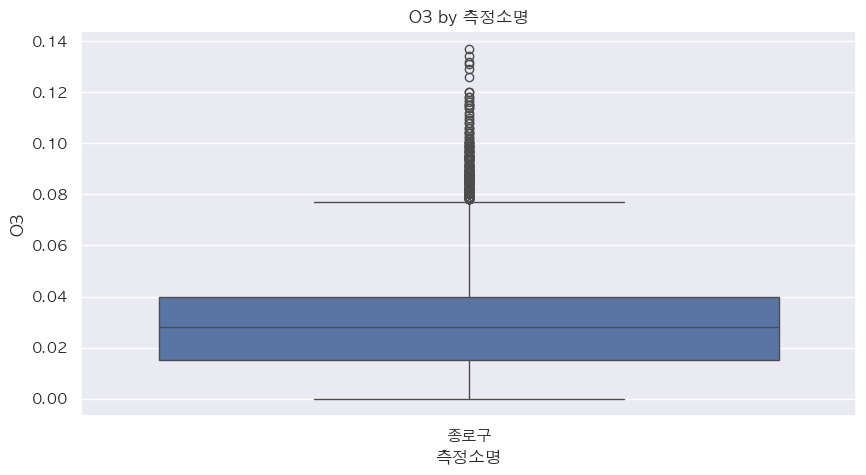

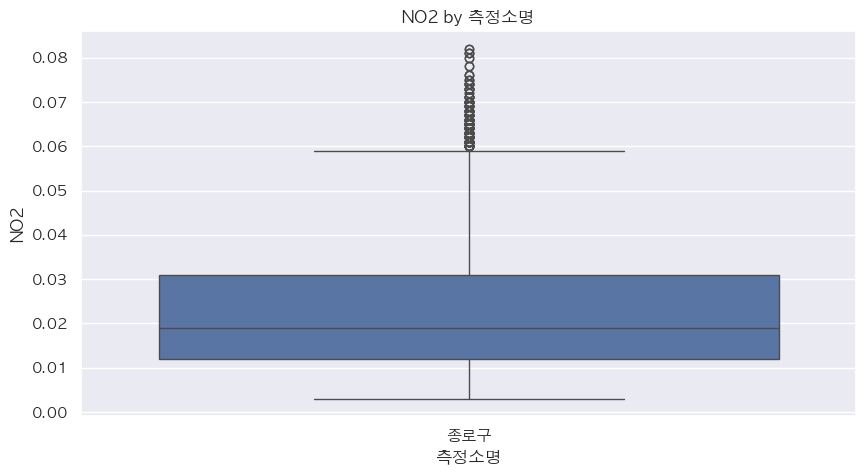

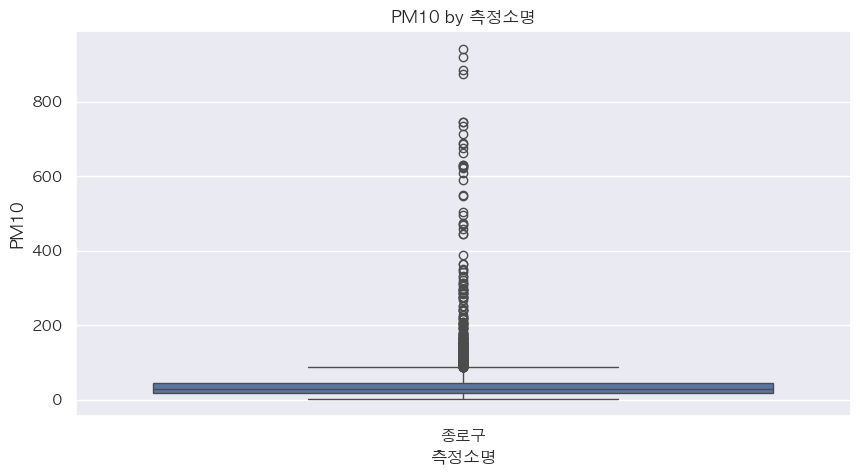

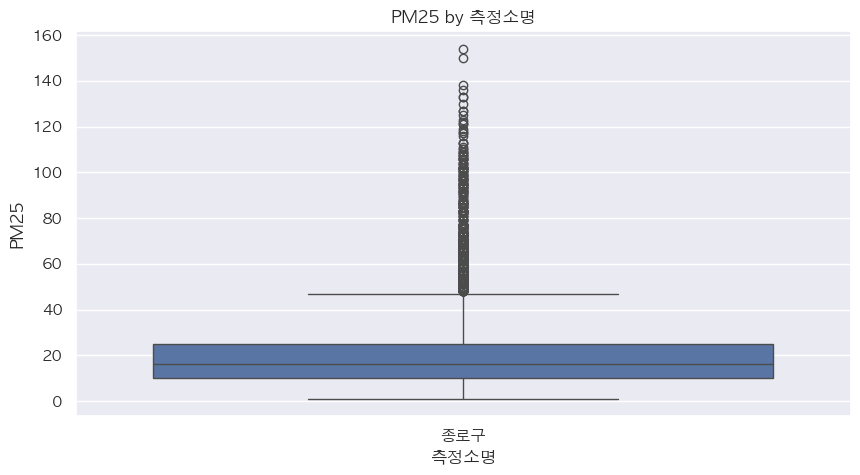

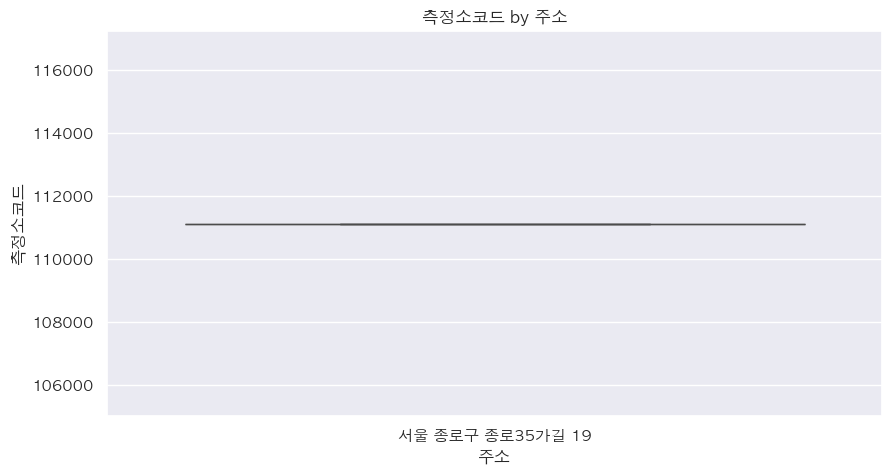

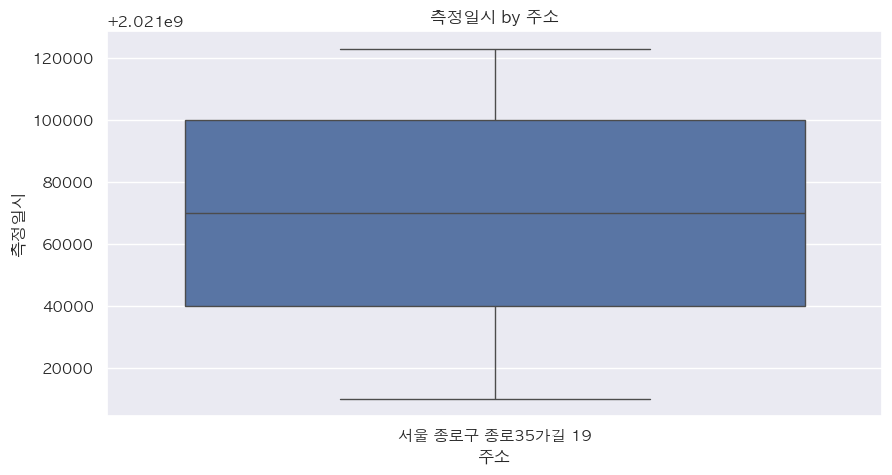

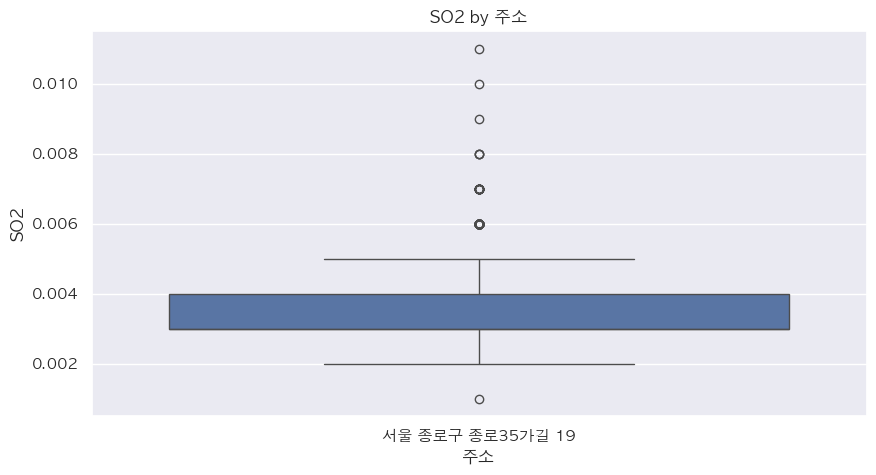

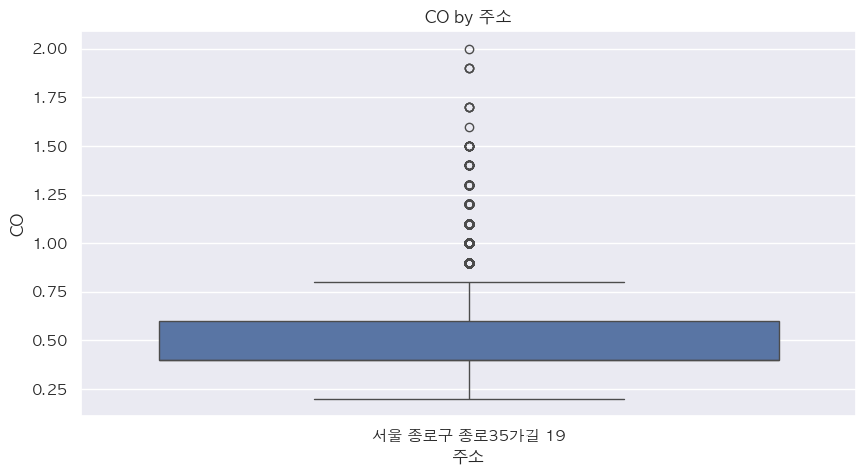

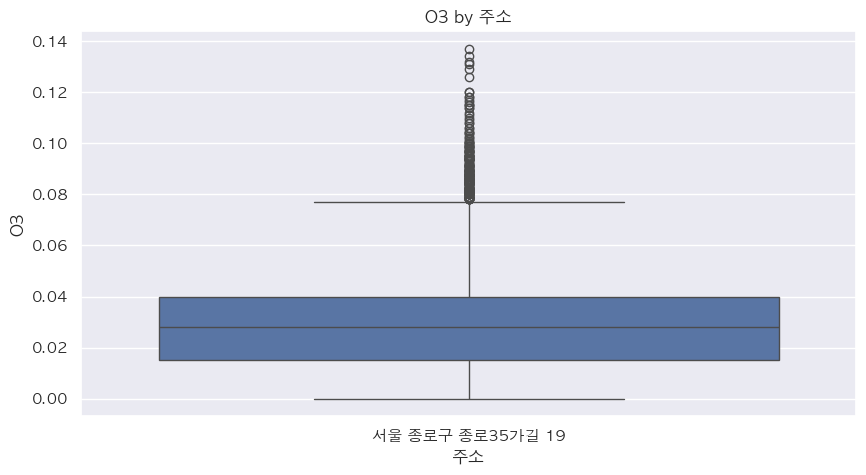

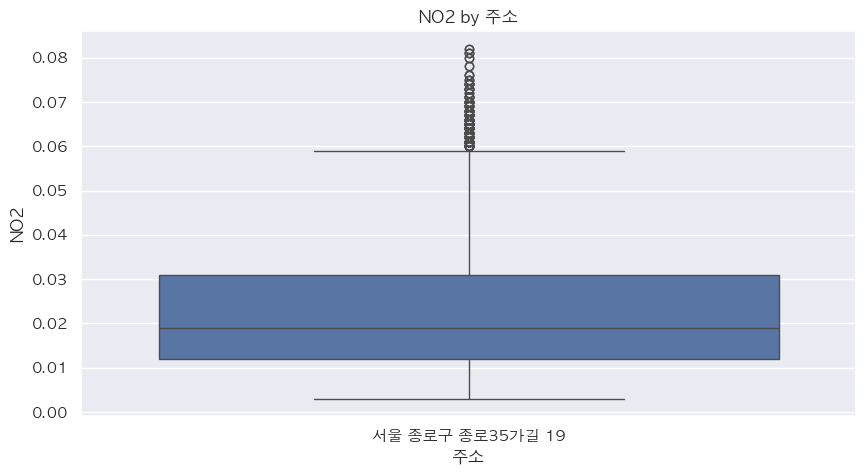

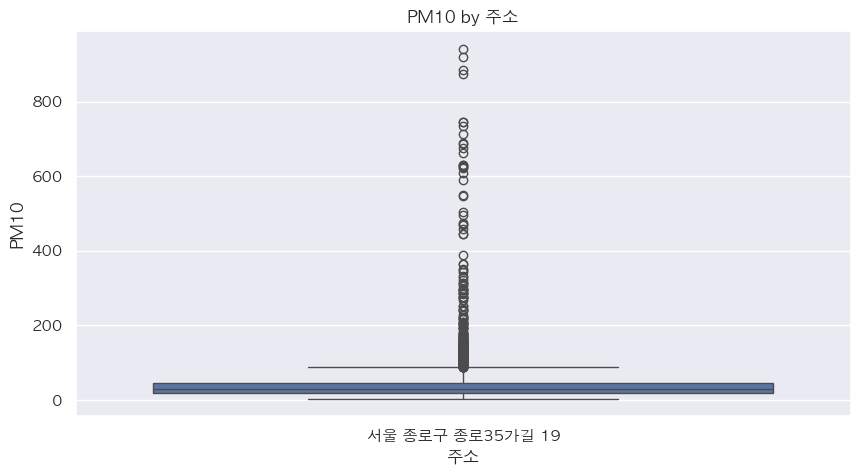

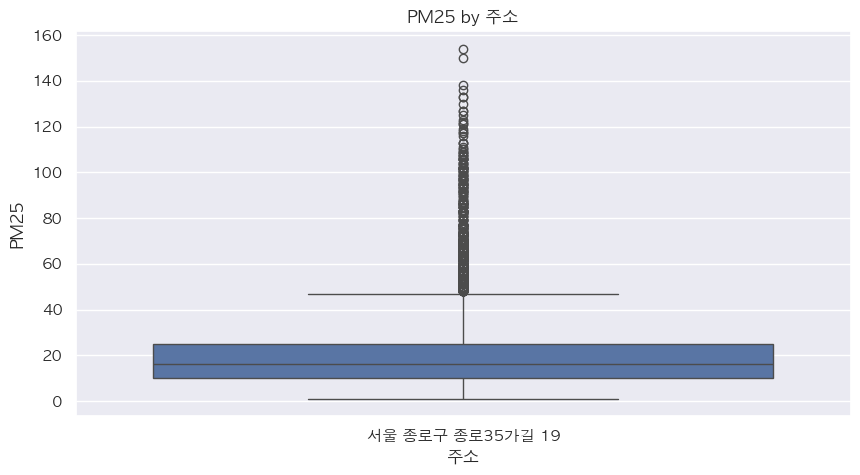

In [267]:
# air_21,air_22 의 다양한 변수에 대하여 시각화
explore_and_visualize(air_21)

Missing Values:
지역         0
망          0
측정소코드      0
측정소명       0
측정일시       0
SO2      112
CO        80
O3        97
NO2       80
PM10     105
PM25      97
주소         0
dtype: int64


Statistical Summary:
          측정소코드          측정일시          SO2           CO           O3  \
count    8760.0  8.760000e+03  8648.000000  8680.000000  8663.000000   
mean   111123.0  2.021067e+09     0.003385     0.505645     0.029246   
std         0.0  3.450216e+04     0.000826     0.209516     0.019708   
min    111123.0  2.021010e+09     0.001000     0.200000     0.000000   
25%    111123.0  2.021040e+09     0.003000     0.400000     0.015000   
50%    111123.0  2.021070e+09     0.003000     0.400000     0.028000   
75%    111123.0  2.021100e+09     0.004000     0.600000     0.040000   
max    111123.0  2.021123e+09     0.011000     2.000000     0.137000   

               NO2         PM10         PM25  
count  8680.000000  8655.000000  8663.000000  
mean      0.023346    38.925361    20.466005  
st

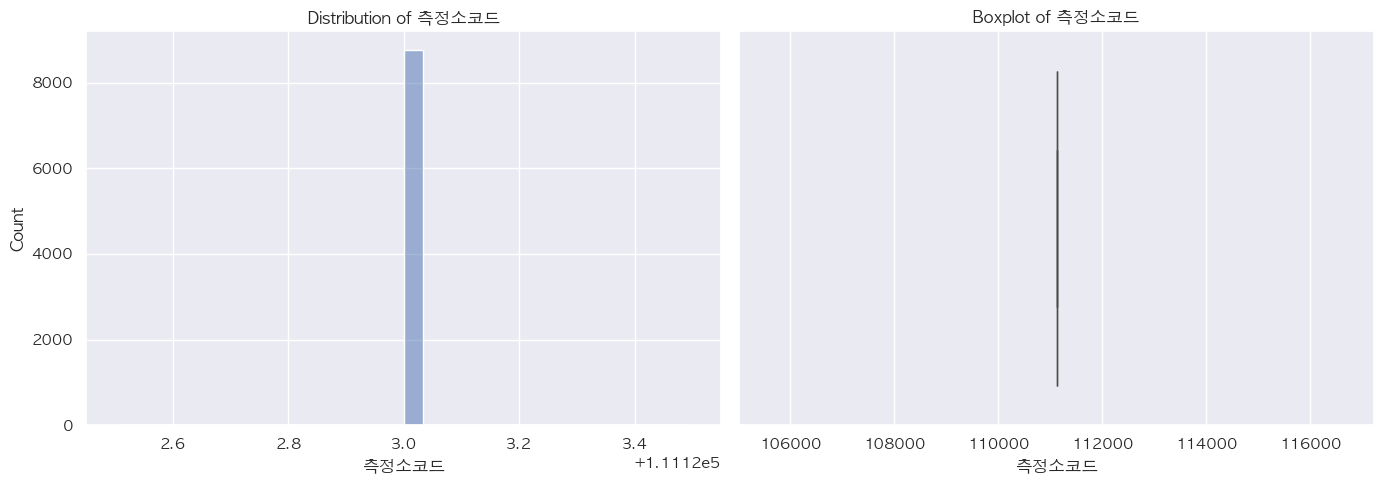

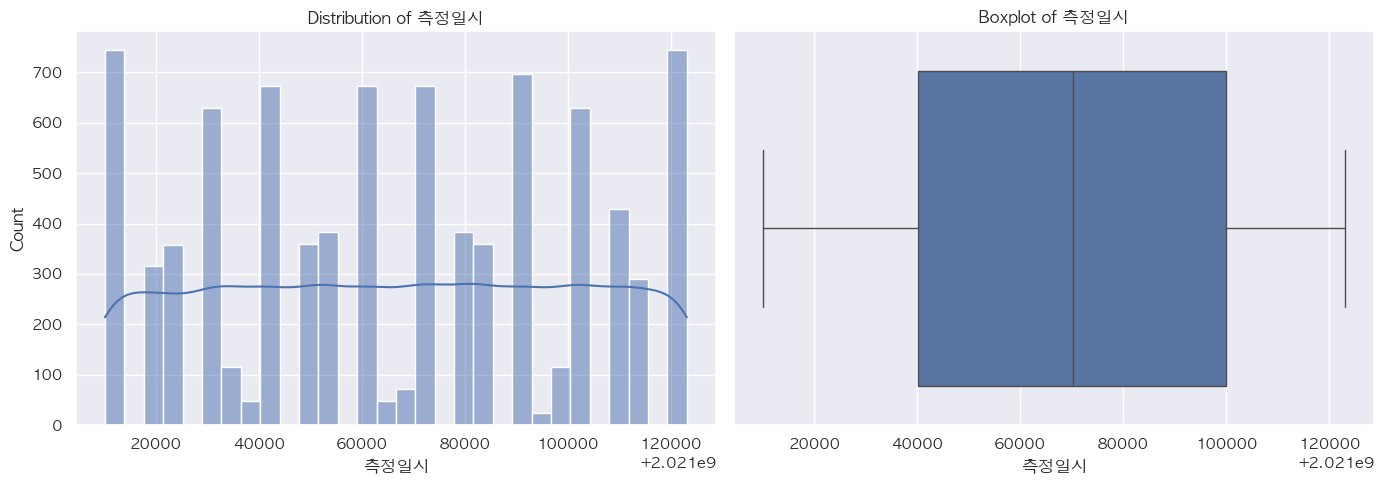

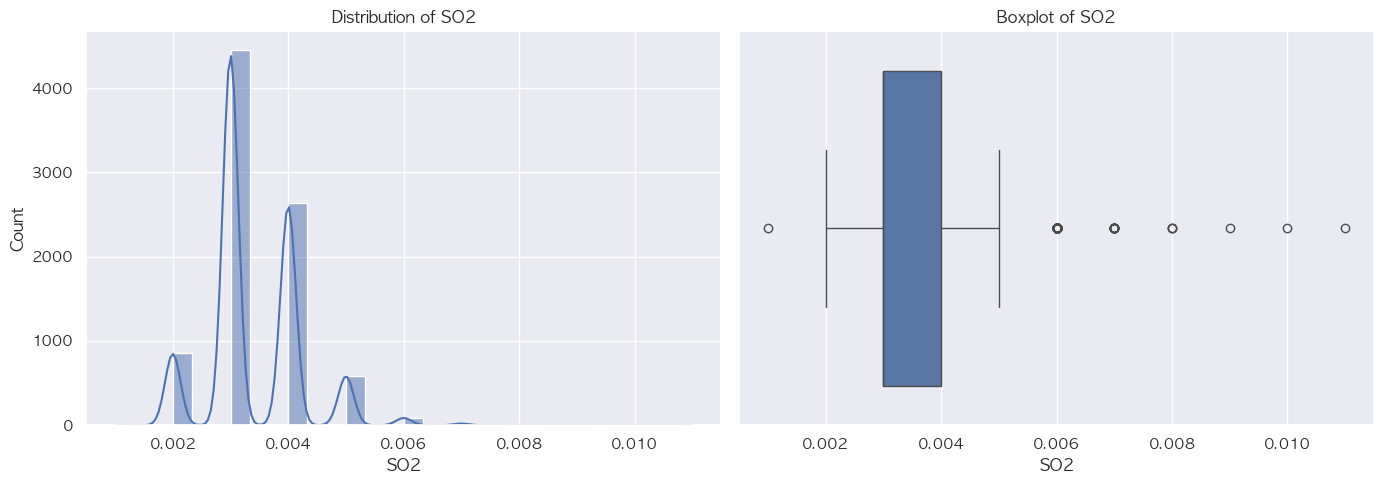

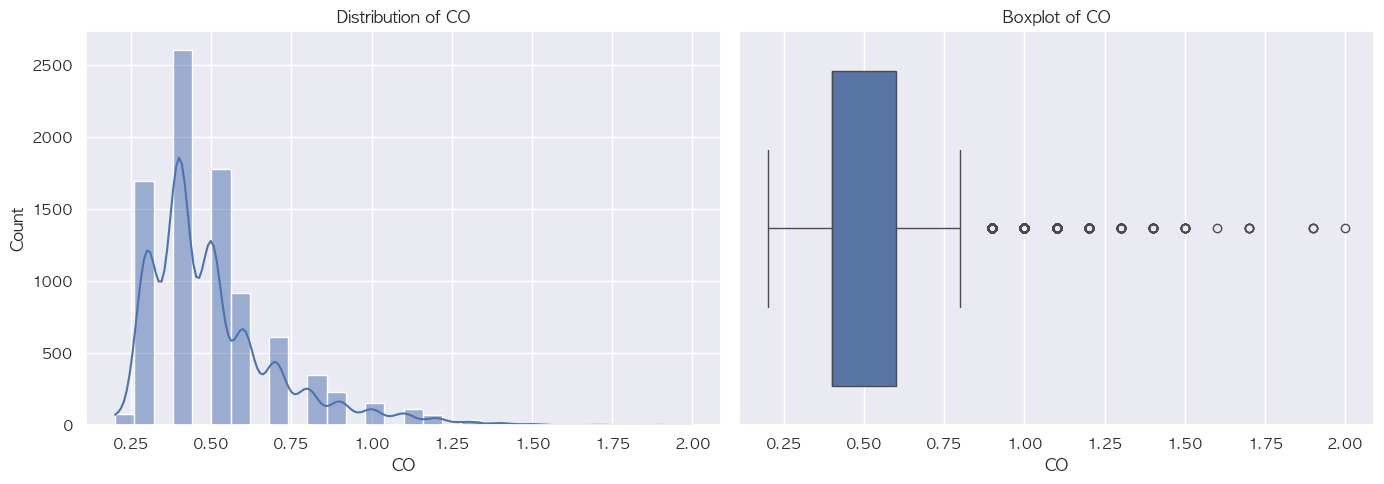

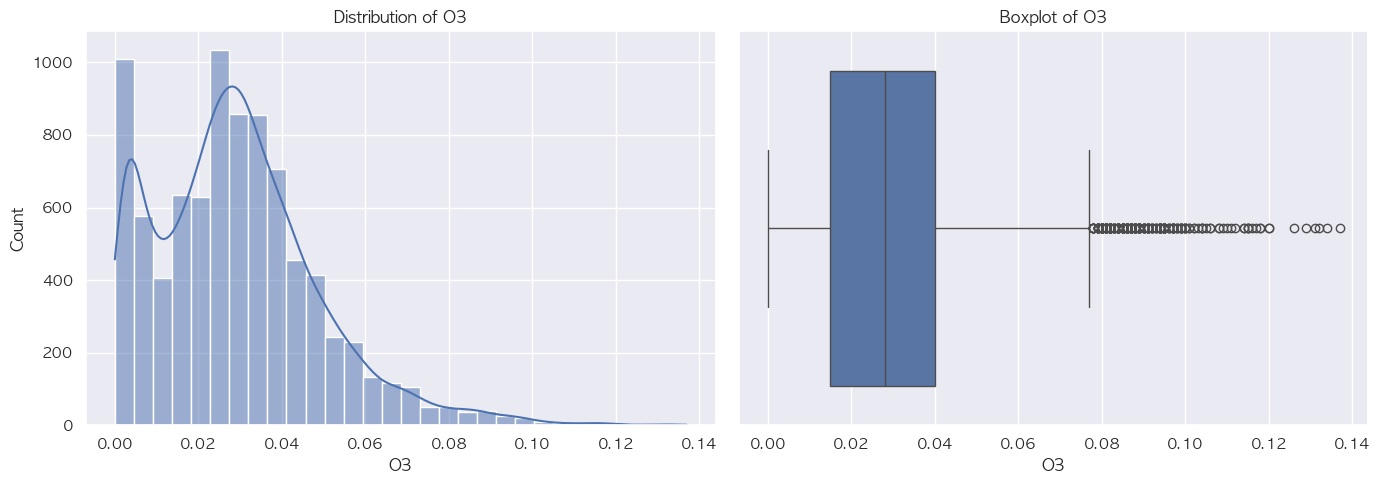

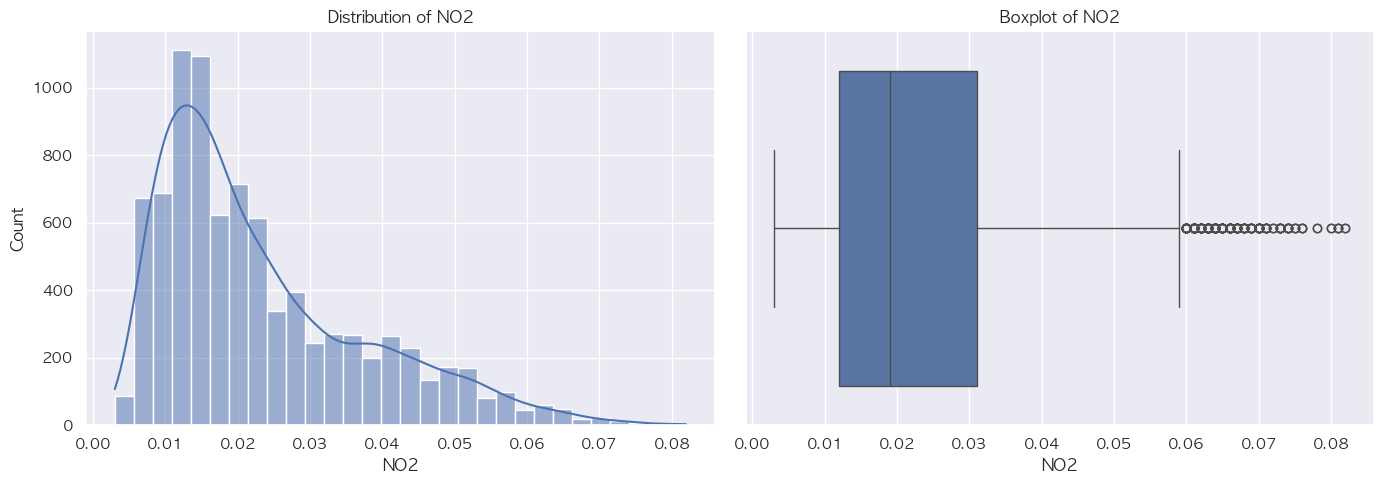

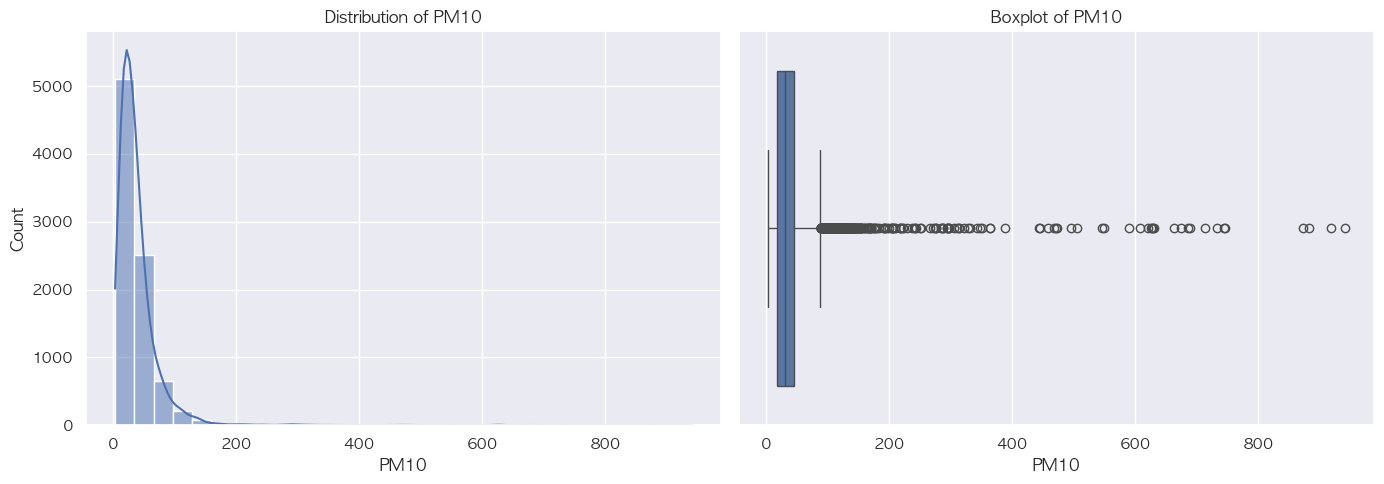

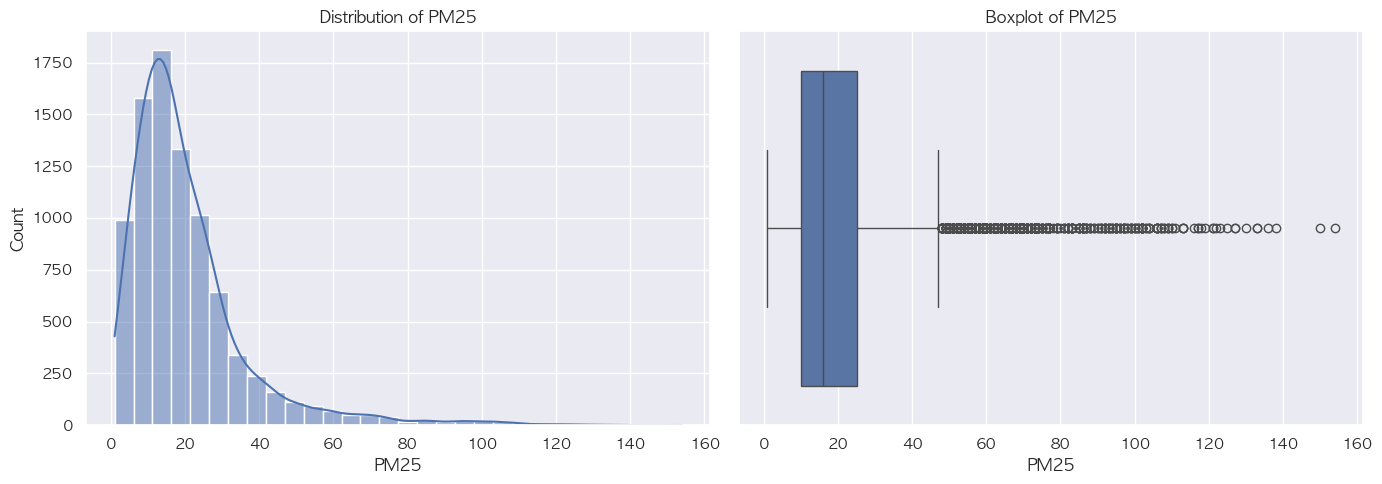

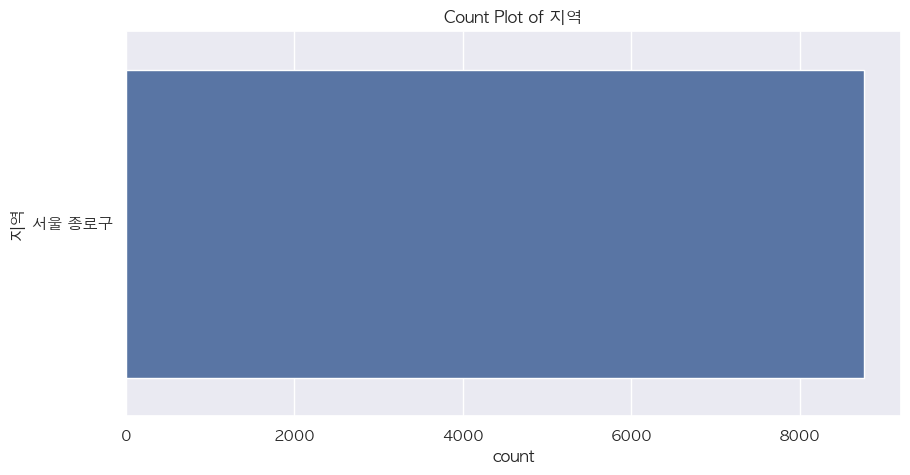

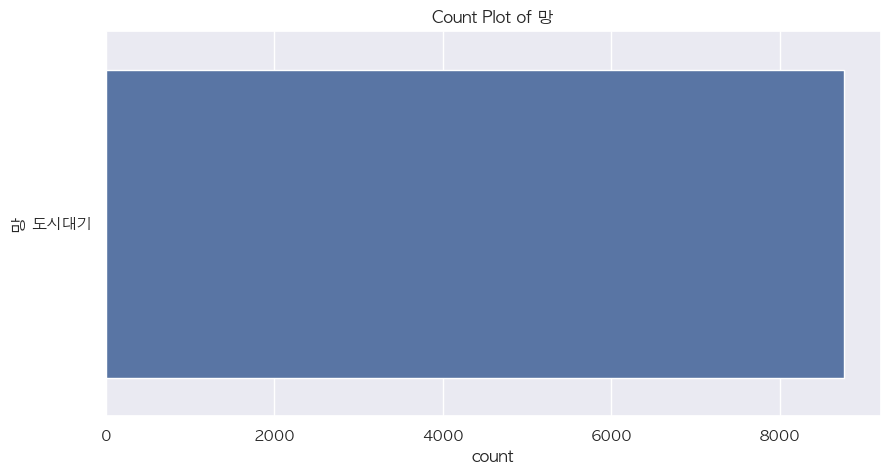

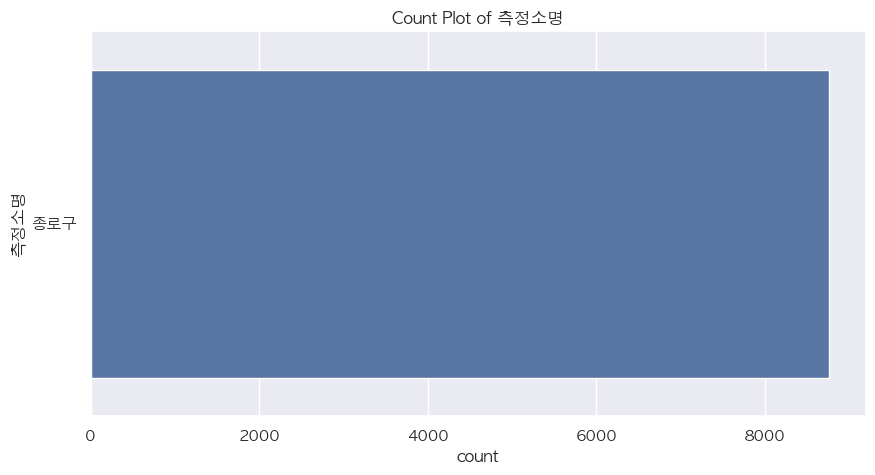

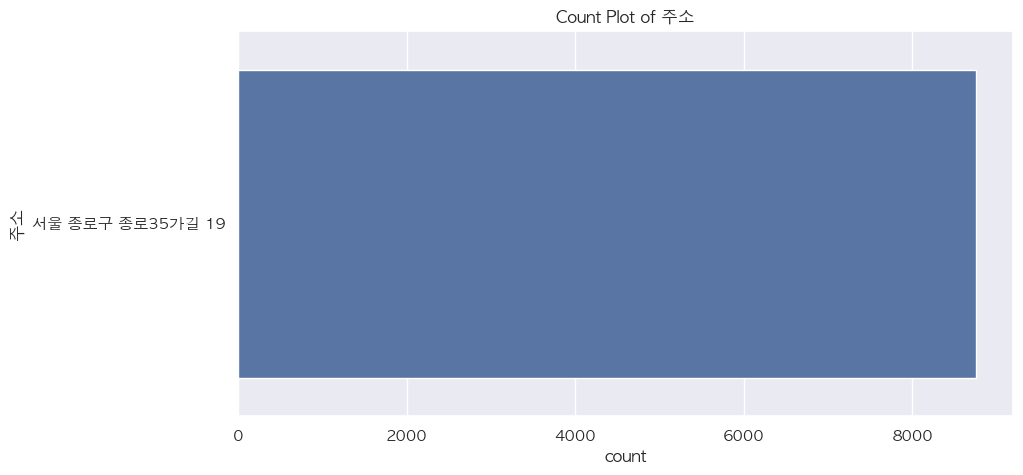

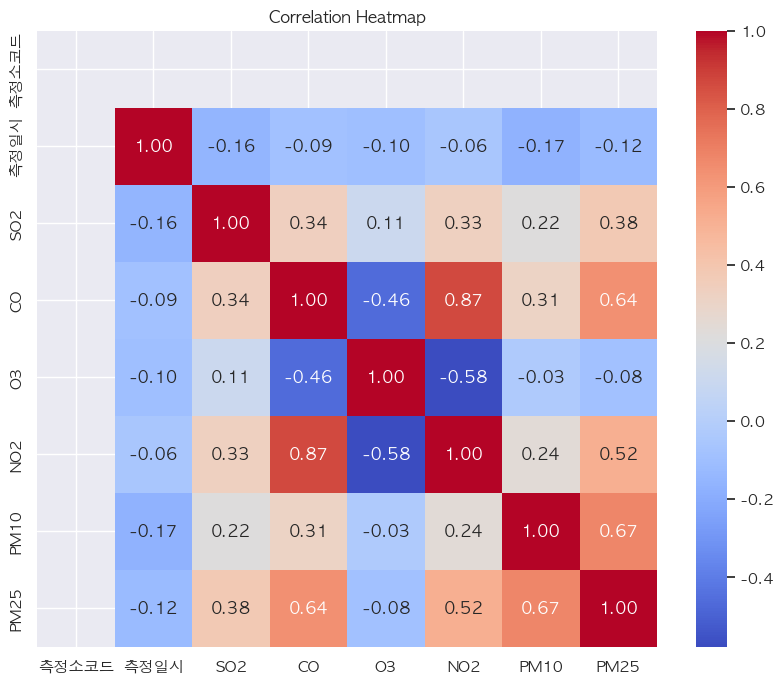

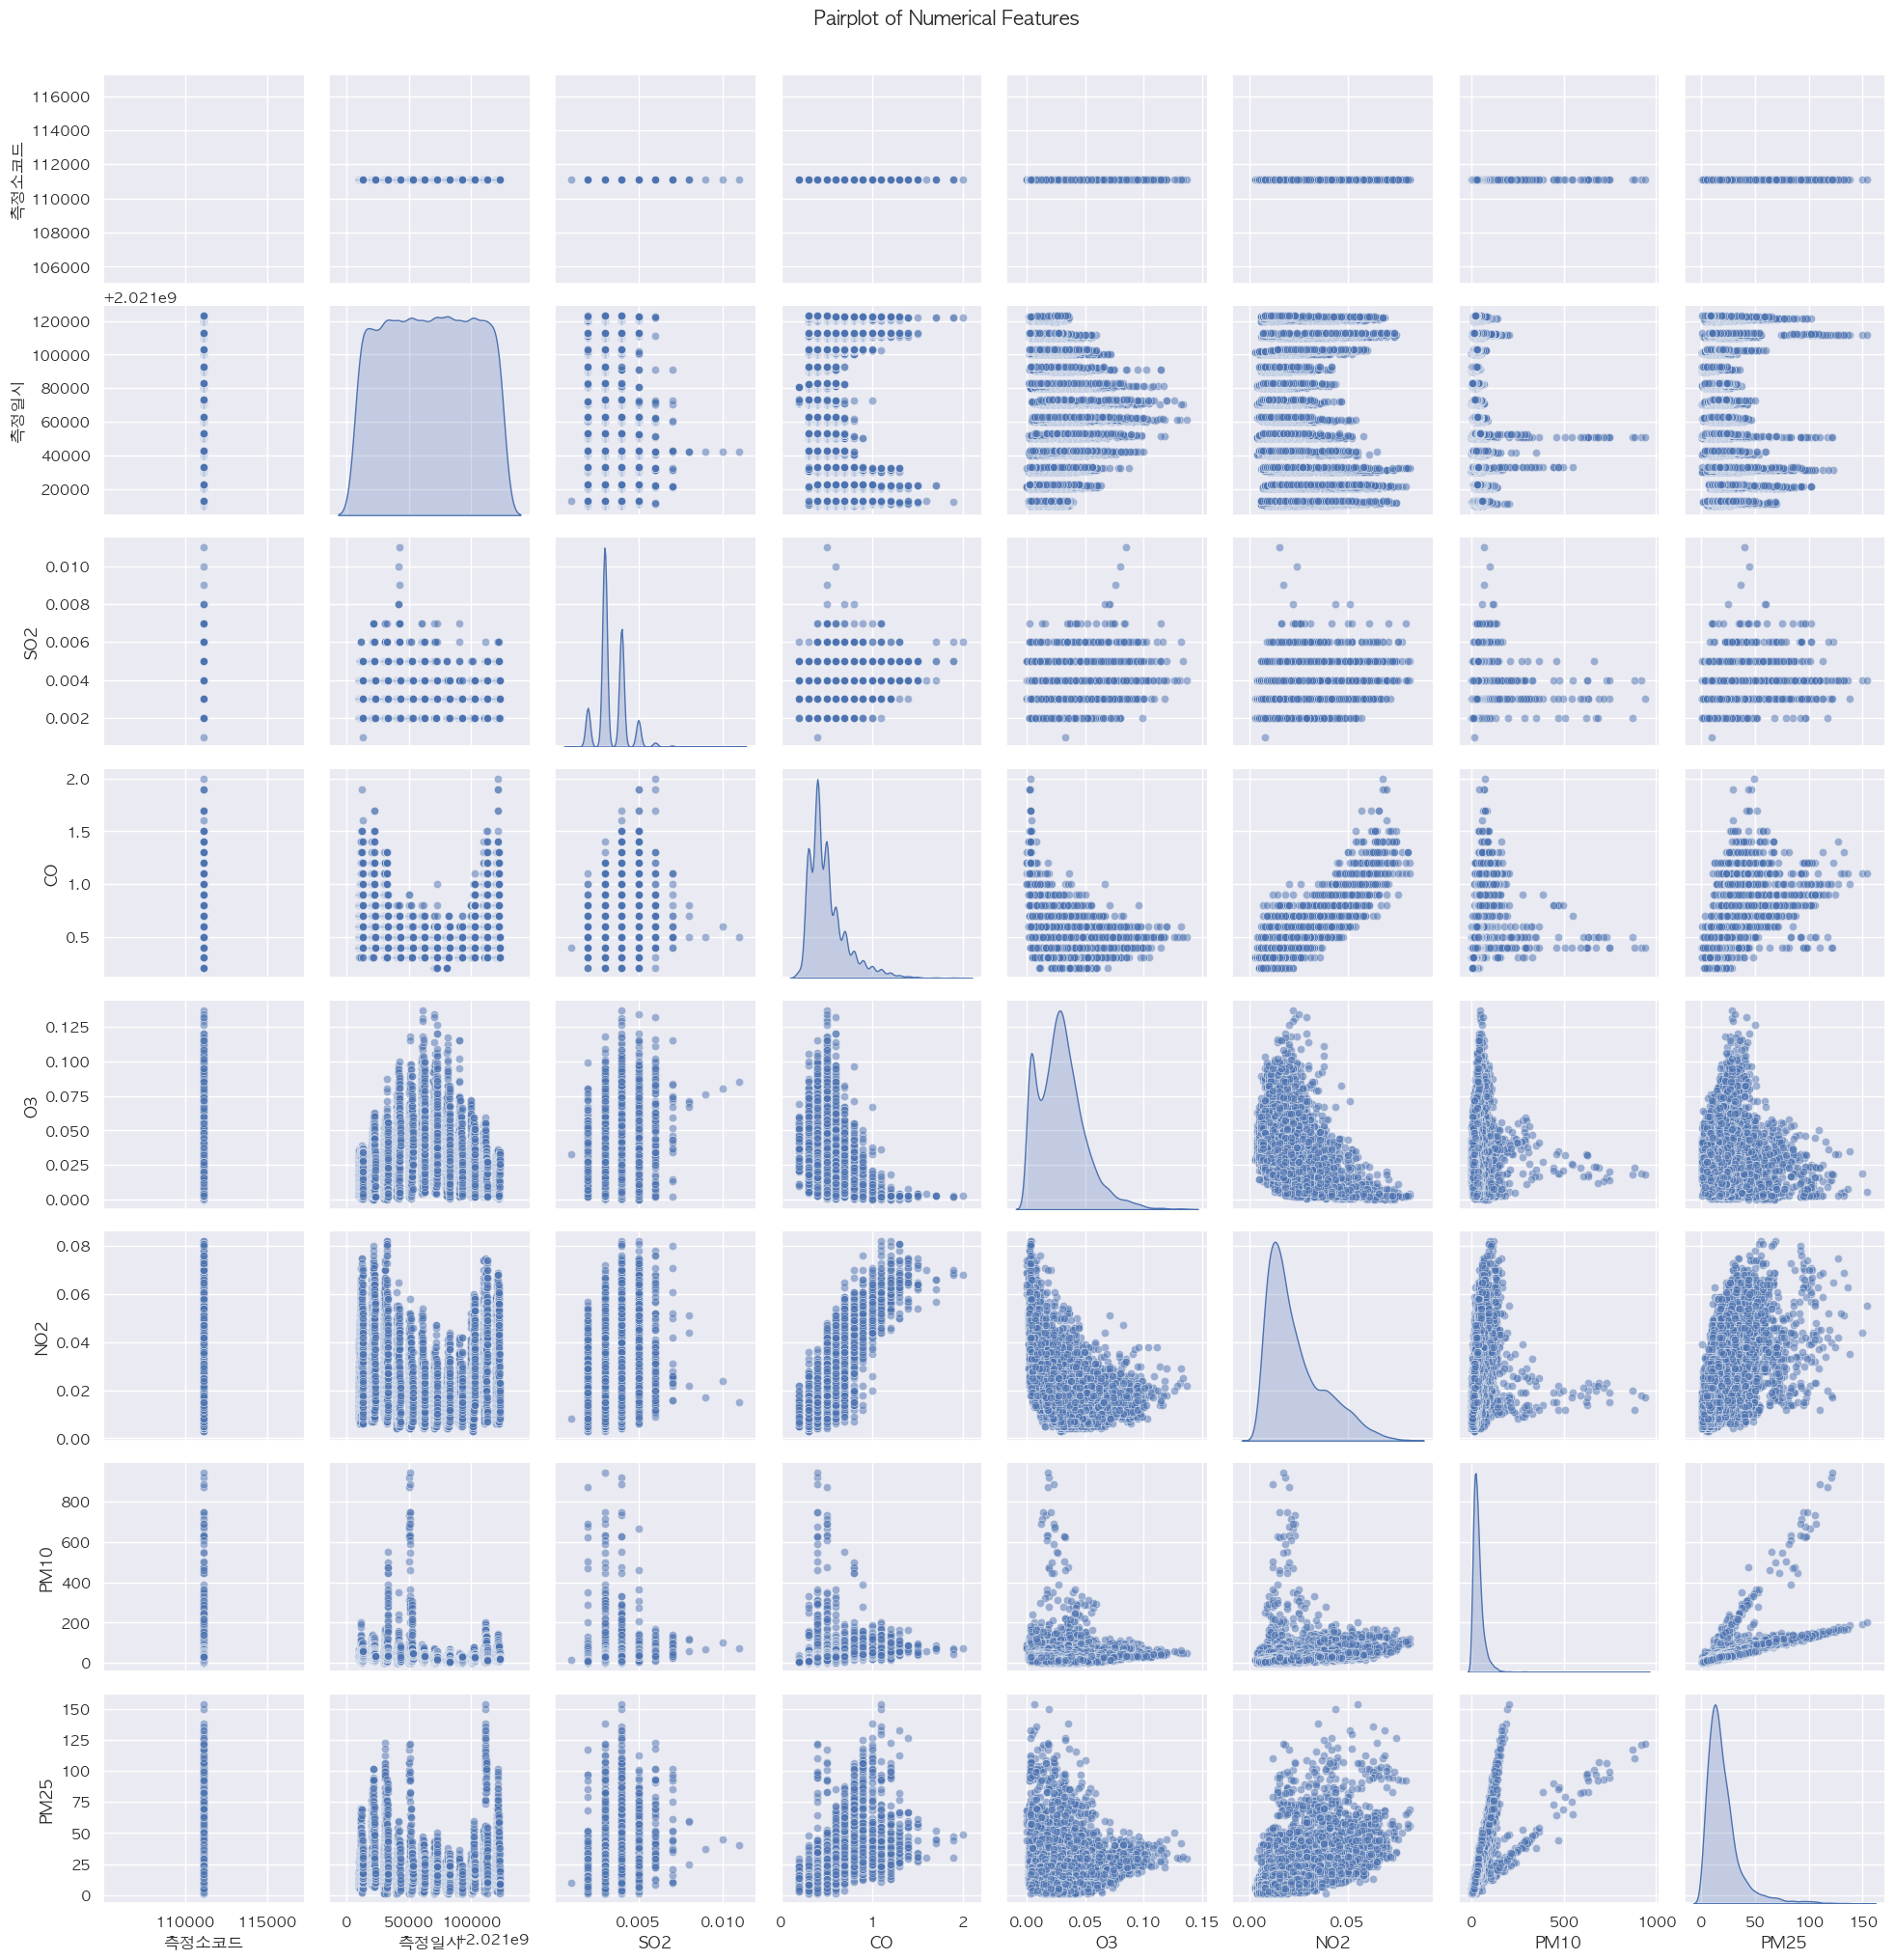

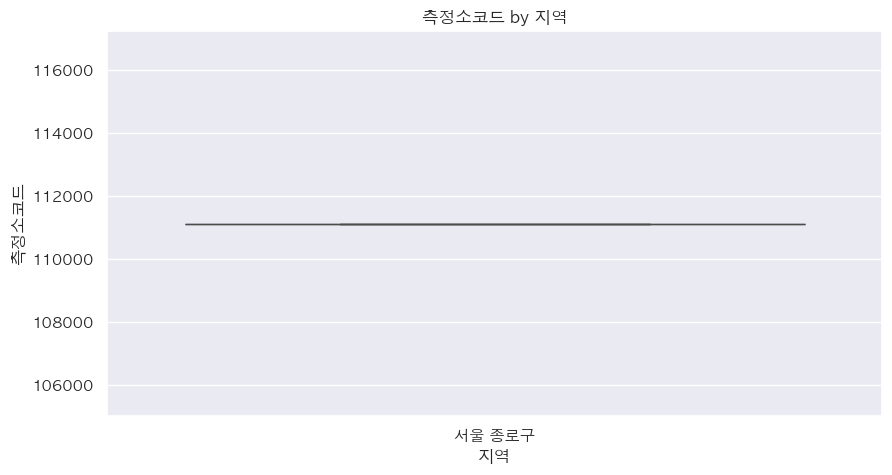

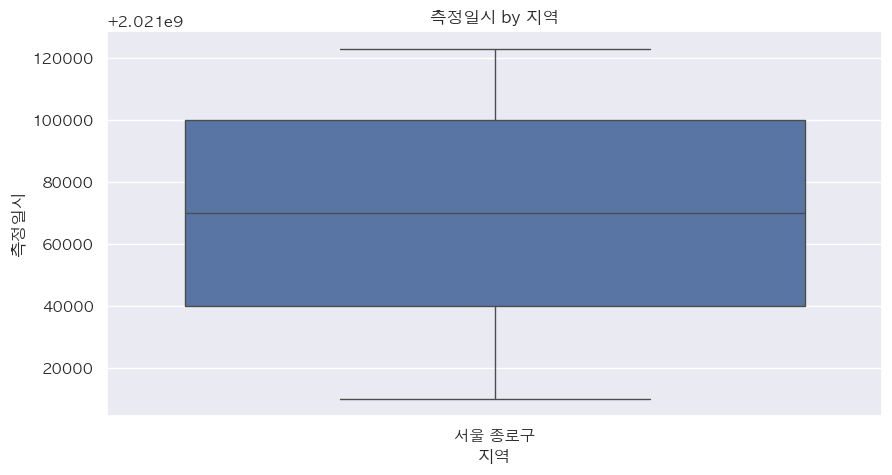

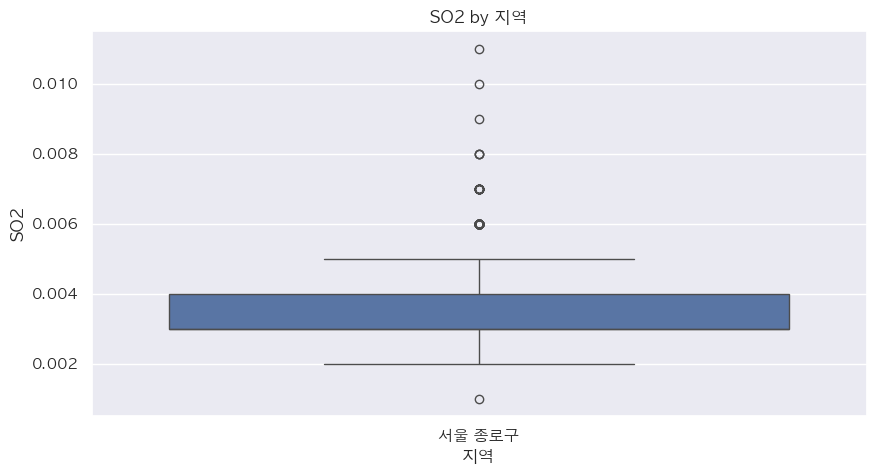

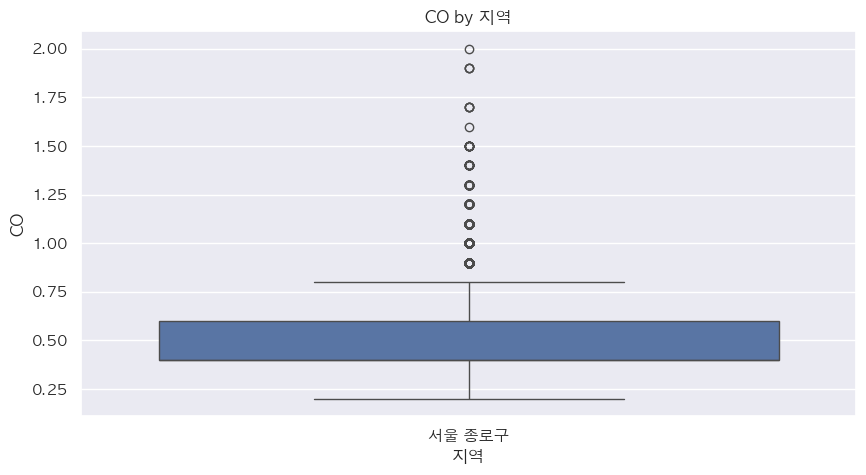

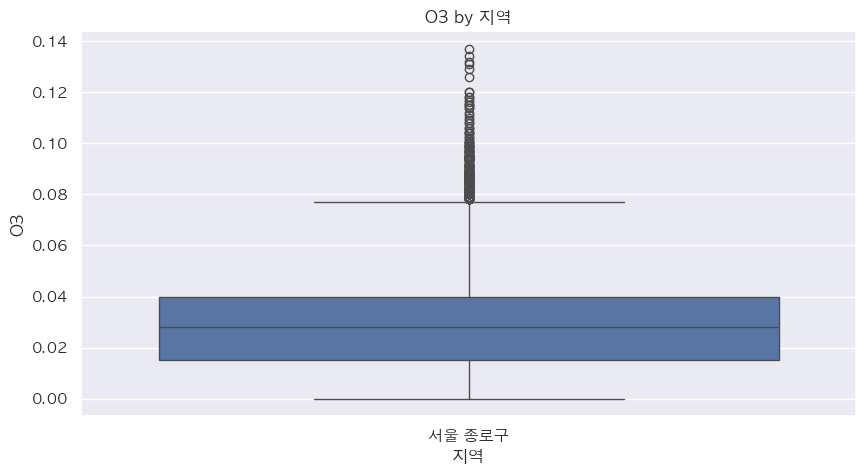

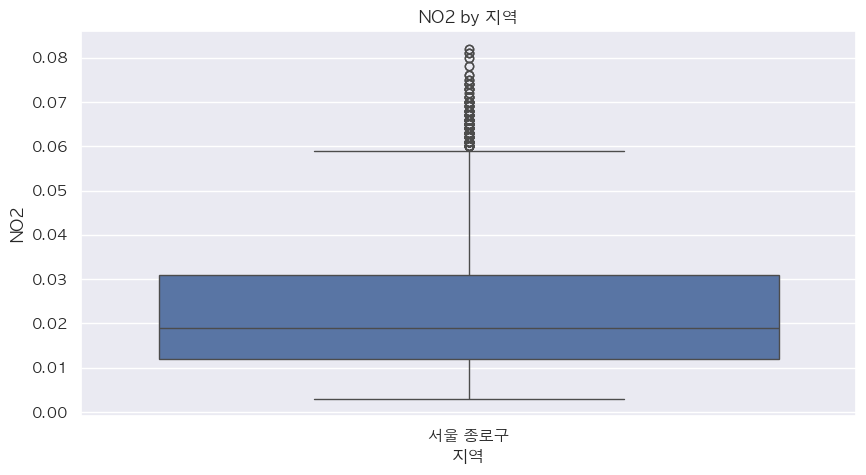

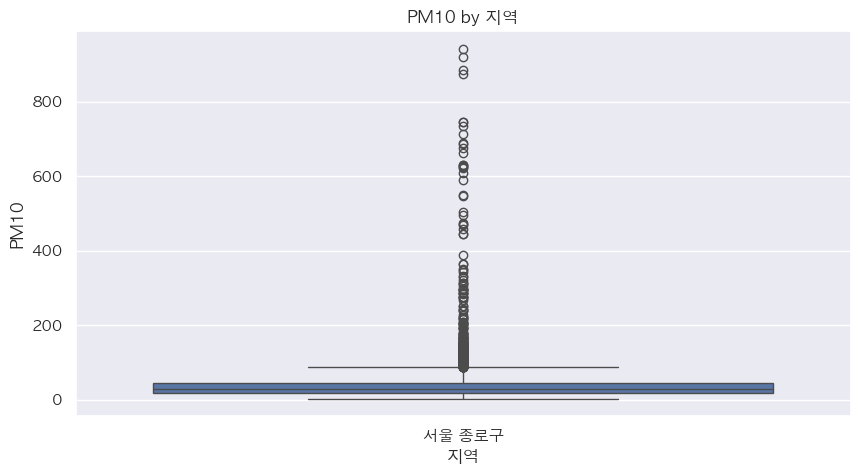

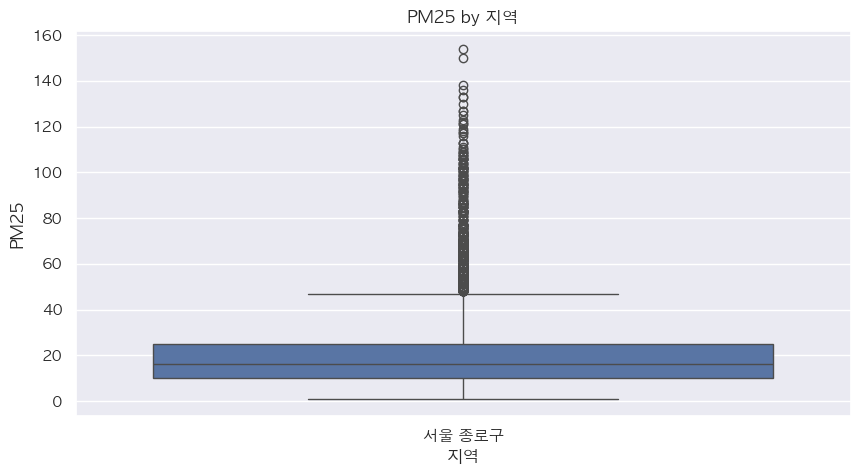

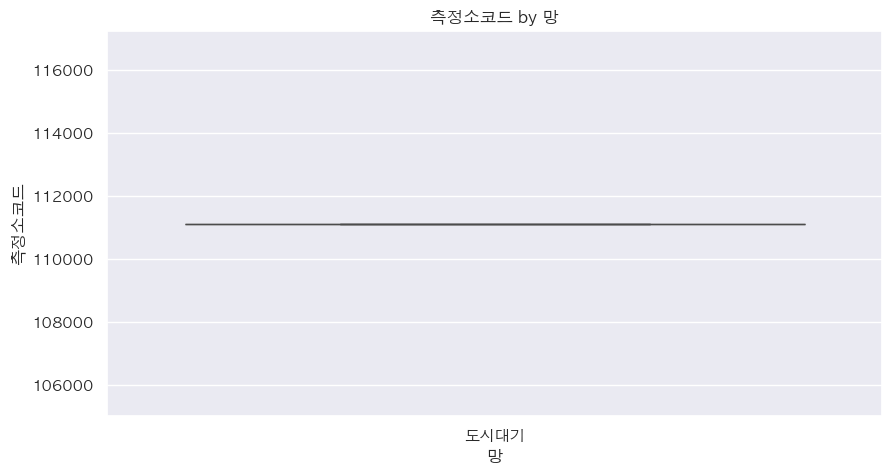

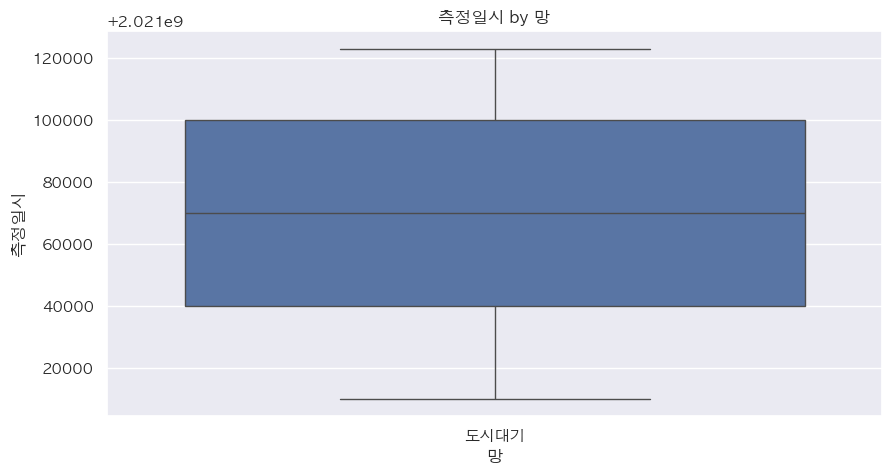

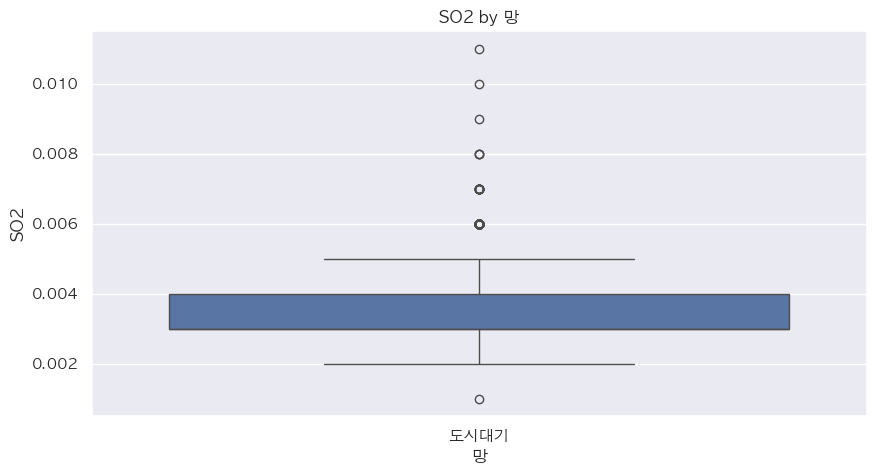

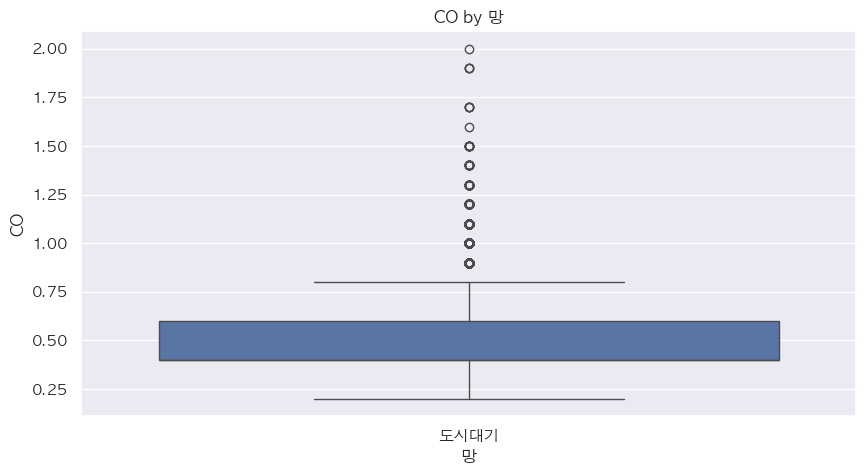

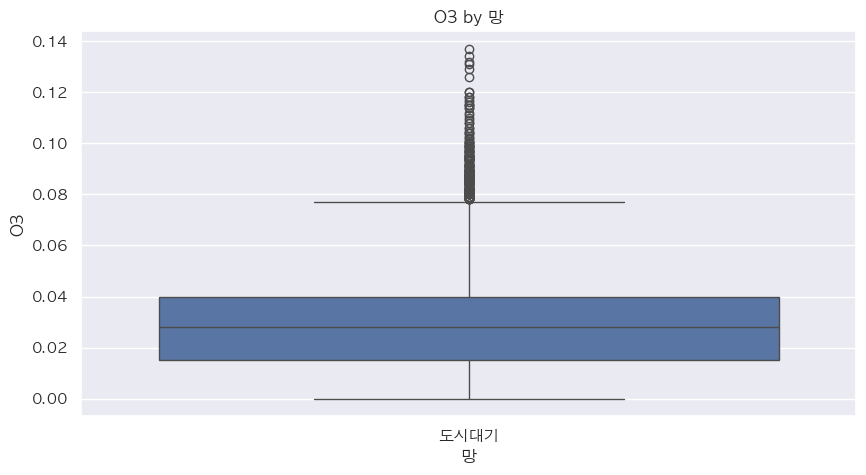

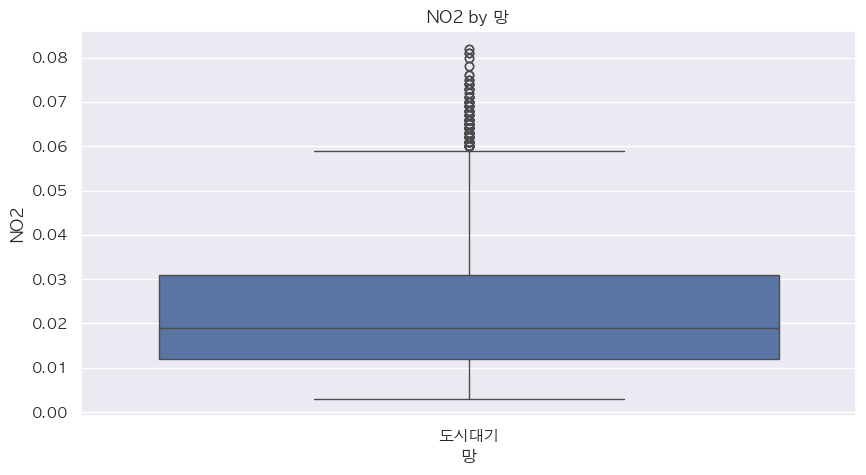

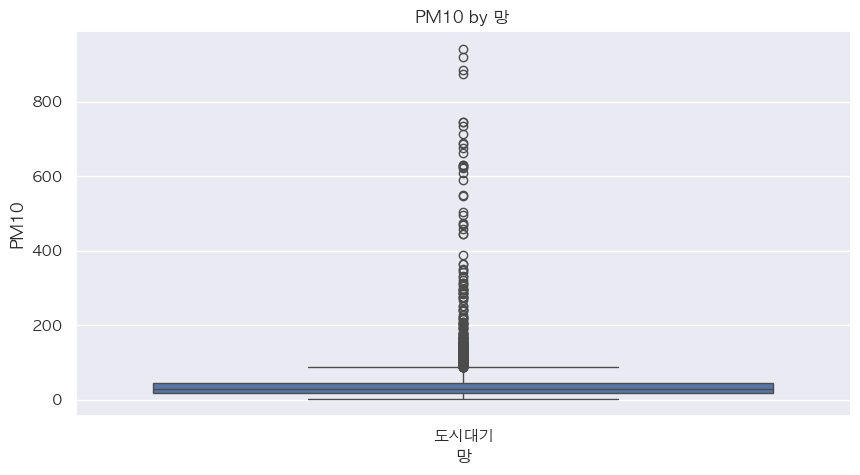

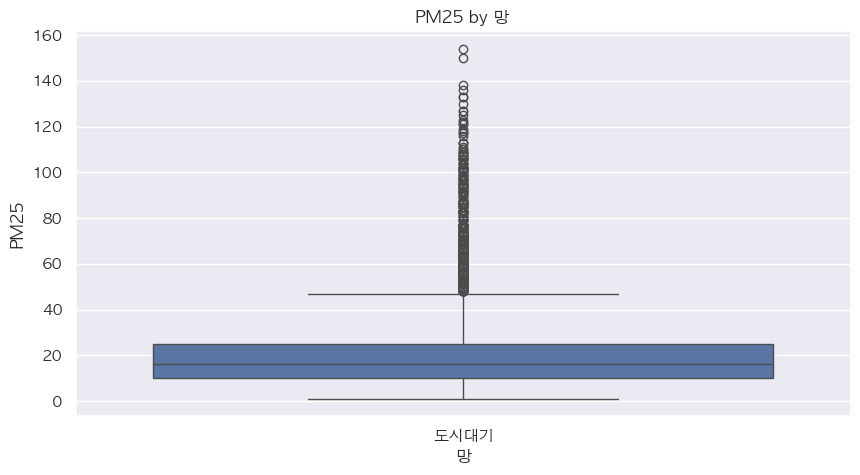

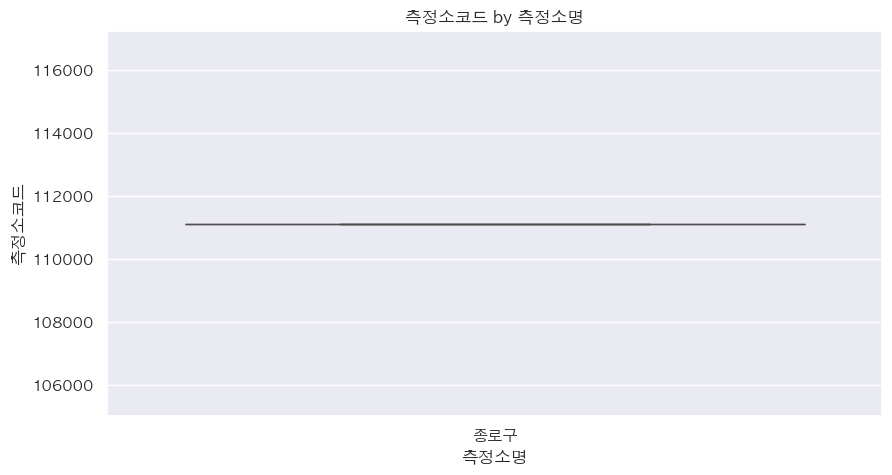

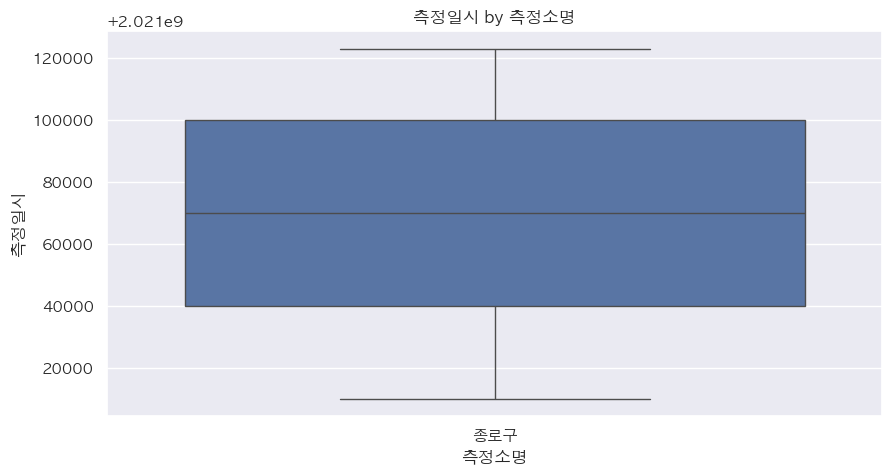

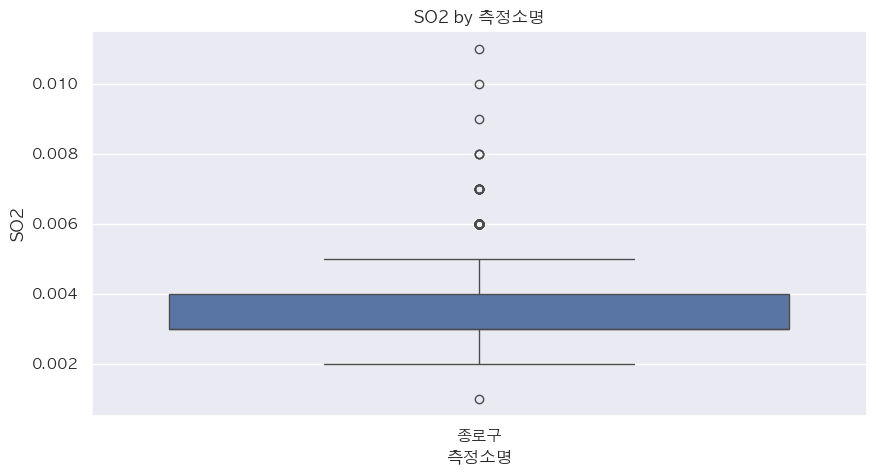

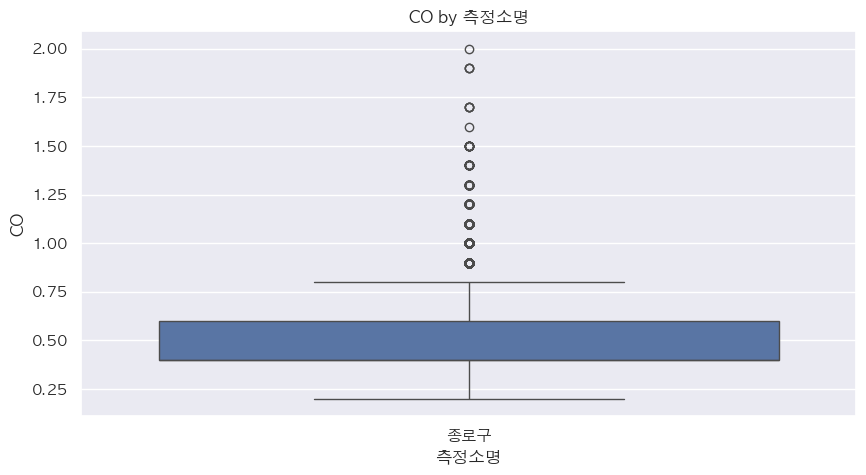

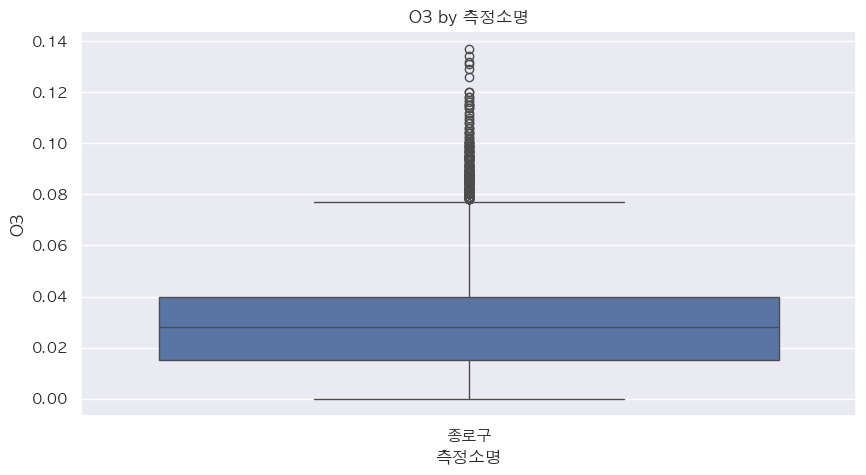

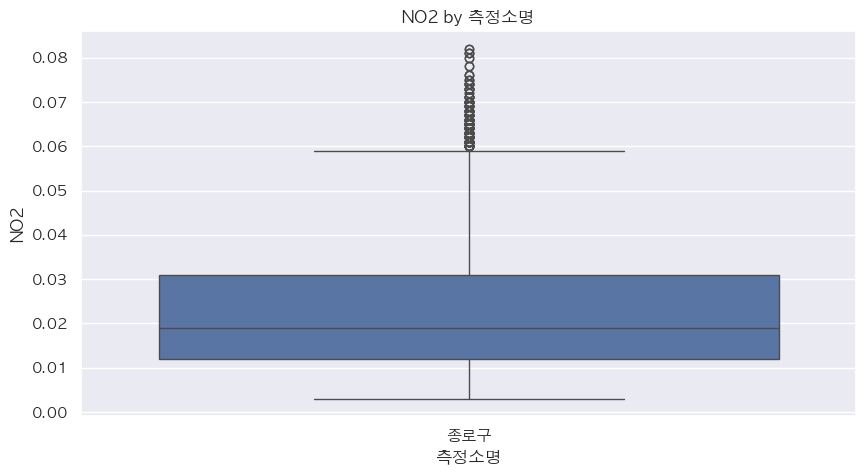

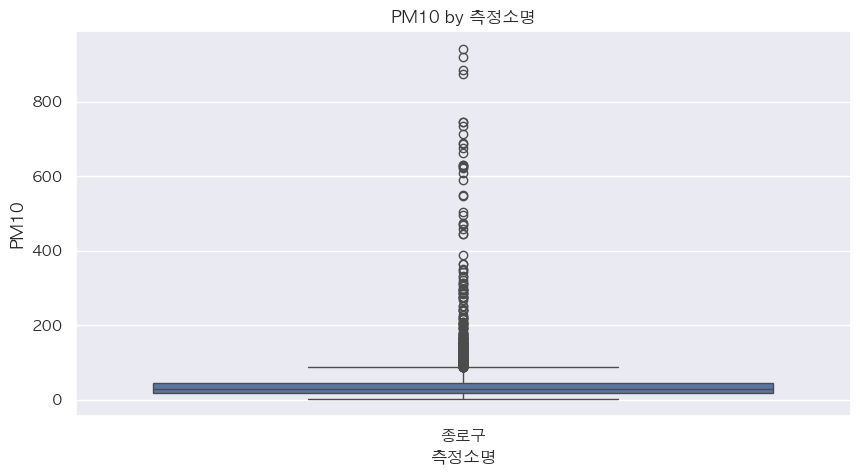

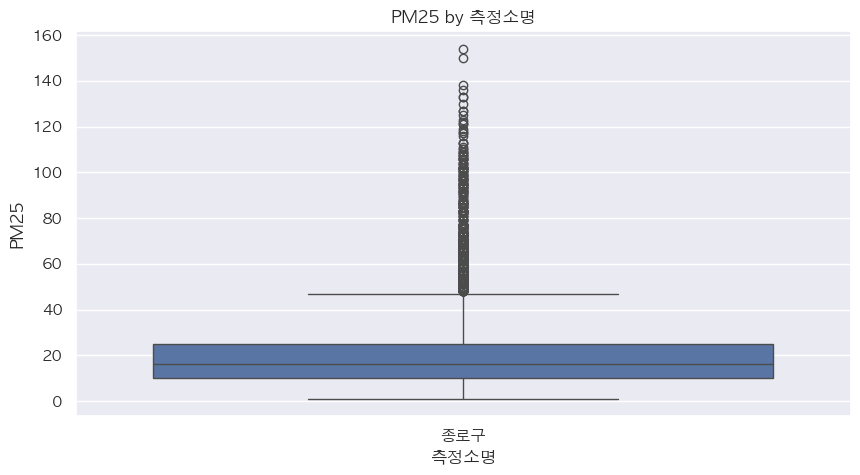

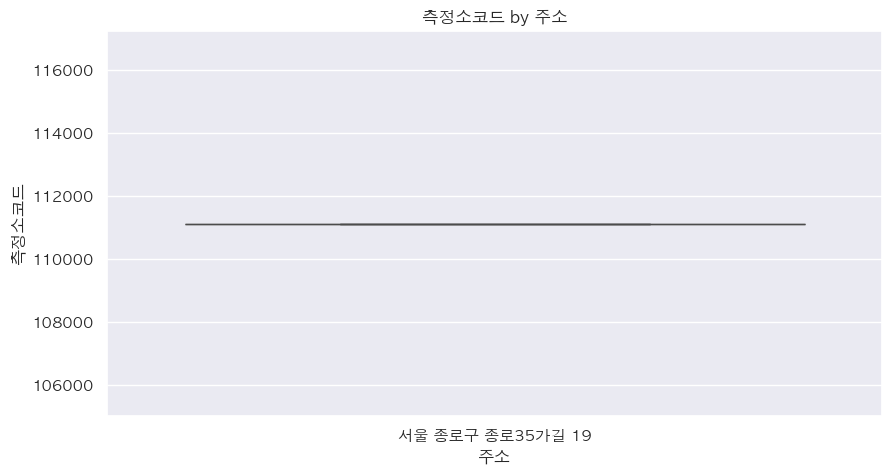

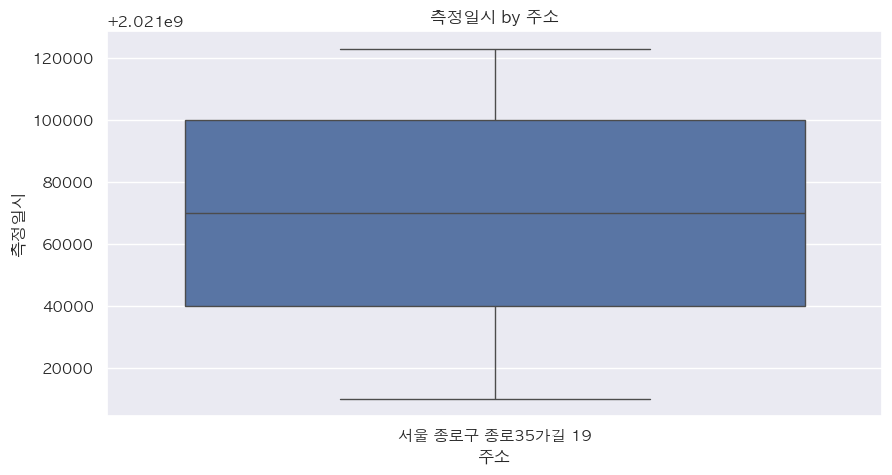

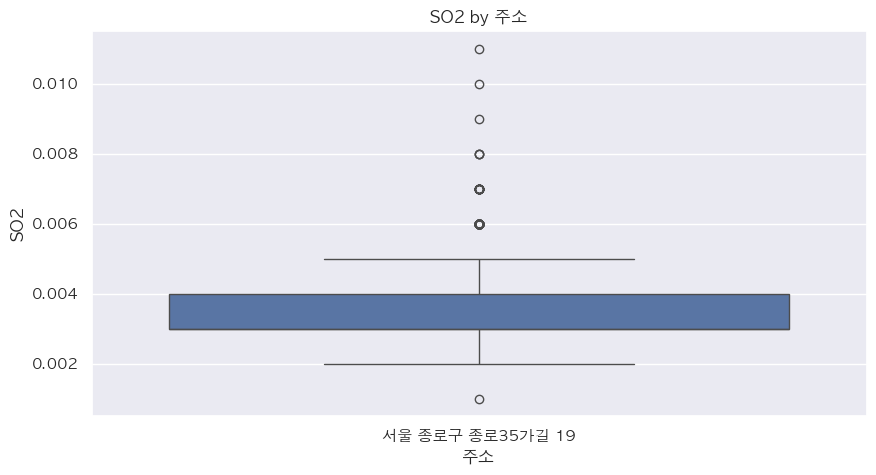

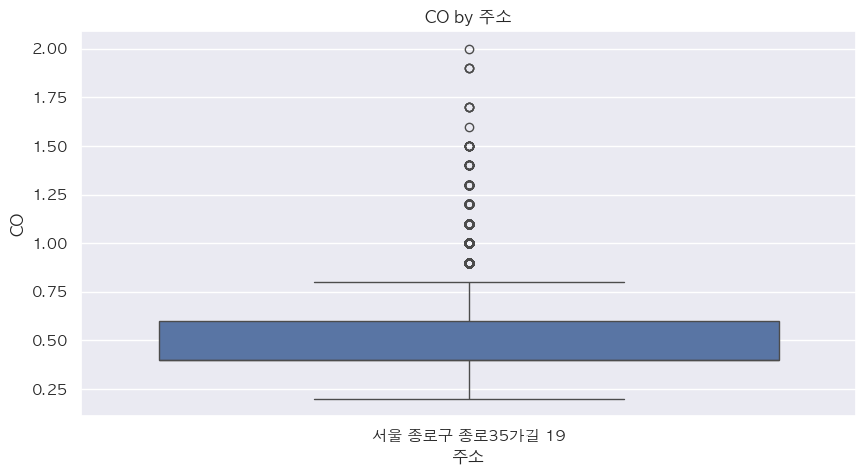

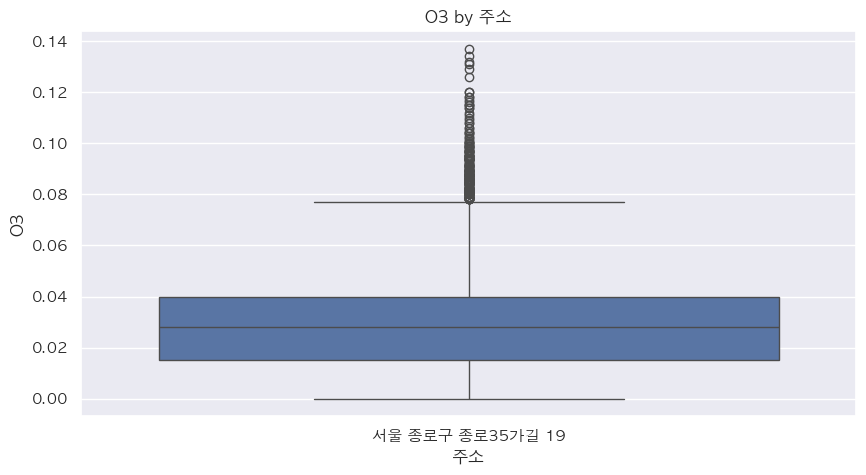

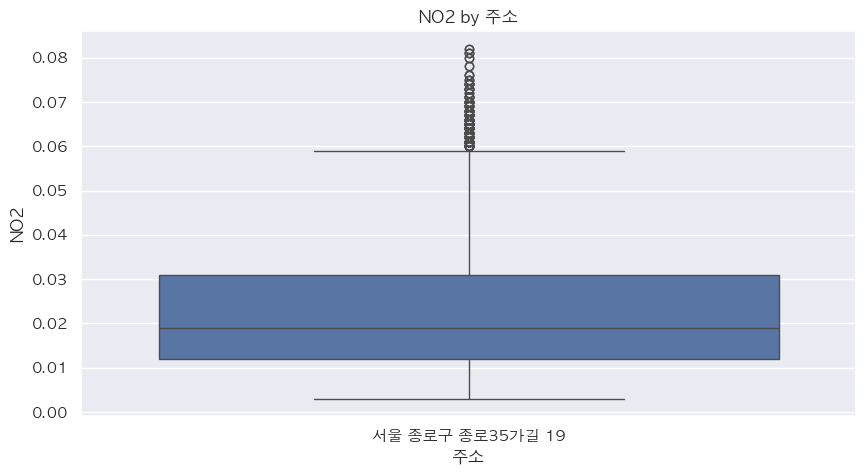

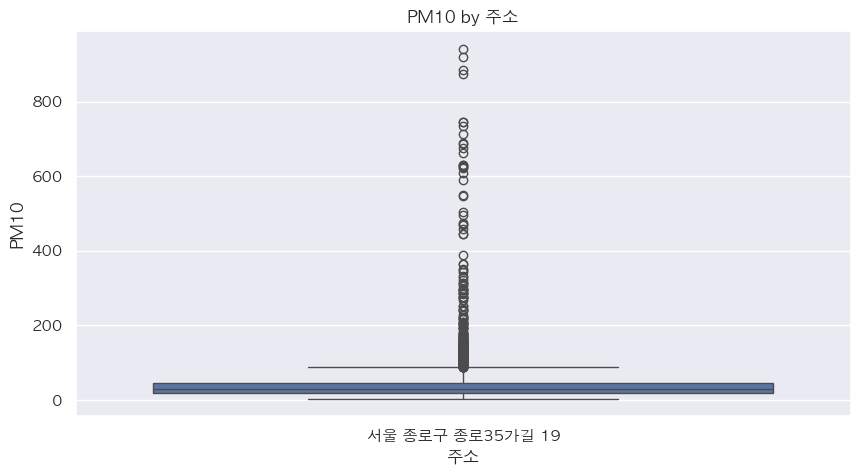

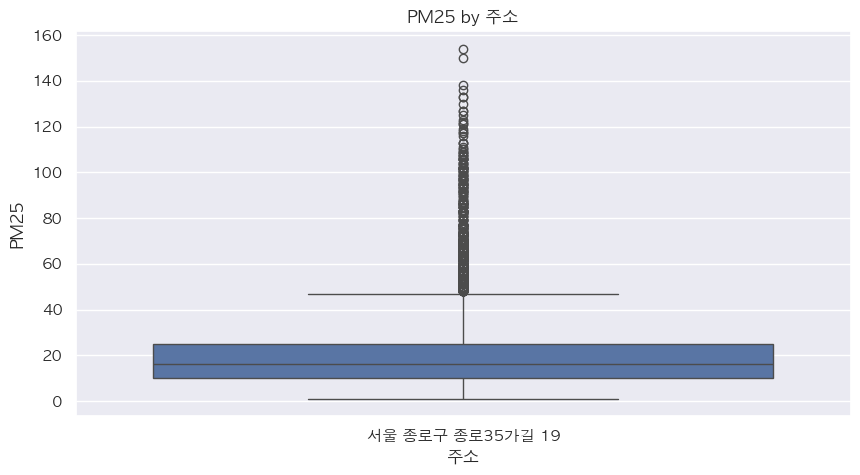

In [268]:
explore_and_visualize(air_21)

## 시각화를 통해 알게된 사실을 정리
### 1. 전부 같은 지역의 같은 망에서 측정되었다. 그렇기 때문에 측정소 코드도 동일하다.
    - 지역, 망, 측정소코드, 지역 column은 drop해도 무방할 것이다.
### 2.측정일시가 시간의 흐름에 따라 정리되어 있다.
    - 시계열 데이터라고 볼 수 있기 때문에 예측을 수행할 때 이를 고려해서 ML model을 사용하면 좋을 듯 하다.
### 3. PM10과 PM25가 존재
    - 우리가 예측할 미세먼지는 PM10이기 때문에 초미세먼지인 PM25는 현재 task에서는 없어도 될 것 같다.

---

### **<span style="color:blue">[1-6] 날씨 데이터 분석</span>**

### 미세먼지(PM10) 예측을 위한 EDA에서는 미세먼지의 시계열적, 공간적, 기후적 특성을 분석하는 것이 중요

1. 데이터 구조 파악 및 기본 통계 분석:
    - PM10 수치의 기본 통계(평균, 중위수, 분산 등)를 확인
    - 시간, 장소, 기상 요소에 따라 PM10 데이터의 분포와 특성을 파악
    - 결측치나 이상치를 확인

2. 시계열 분석:
    - PM10 수치의 일별, 월별, 계절별 변화 패턴을 분석하여 주기성이나 추세를 파악
    - 이동 평균, 롤링 윈도우 등을 활용해 장기적 경향을 관찰
    - 요일별, 공휴일, 특정 계절의 미세먼지 농도 차이를 분석

3. 기상 변수와의 상관관계 분석:
    - 기온, 습도, 풍속, 강수량 등 기상 변수와 미세먼지 수치 간의 상관관계를 파악
    - 기온이 높은 날이나 강수량이 많은 날의 PM10 농도 변화를 통해 미세먼지에 영향을 주는 주요 변수 찾기
    - Pearson 상관계수를 통해 변수를 수치화하고 시각화

4. ~~공간적 분석:~~
    - 데이터가 여러 지점에서 수집되지 않았기 때문에 지역별 PM10 농도의 차이를 비교할 필요는 없음
    - ~~지리적 특성과 미세먼지 농도 간의 관계를 파악하기 위해 지도 위에 시각화하거나, 클러스터링 기법을 활용하여 지역별 패턴을 분석~~

5. 이벤트 기반 분석:
    - 미세먼지 농도가 급증하는 이벤트(예: 황사, 봄철 등)가 발생한 시점의 데이터를 분석
    - 특정 이벤트가 PM10 농도에 미치는 영향을 살펴보고, 이들 이벤트와 관련된 변수와의 관계를 분석

In [269]:
weather_21['운형(운형약어)'].info()
print('='*80)
weather_22['운형(운형약어)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8759 entries, 0 to 8758
Series name: 운형(운형약어)
Non-Null Count  Dtype 
--------------  ----- 
4947 non-null   object
dtypes: object(1)
memory usage: 68.6+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 2160 entries, 0 to 2159
Series name: 운형(운형약어)
Non-Null Count  Dtype 
--------------  ----- 
939 non-null    object
dtypes: object(1)
memory usage: 17.0+ KB


#### Preprocessing
- 지점, 지점명은 동일하므로 drop
- weather_21에서의 운형은 약 절반정도가 NaN이기 때문에 drop </br>
(weather_22에선 그래도 적지만 train에 쓸 weather_21에서 사용하기 애매하기 때문에 drop하는 게 낫다고 판단)
- 일시는 datetime으로 변환 (추후 air df의 측정일시와 merge해 PM10을 가져오기 위해)

이렇게 모든 object column은 drop

- weather dataframe 자체의 column 끼리 보는 것보단 PM10의 수치를 기반으로 분석하는 것이 좋을 것 같아 해당 column을 air dataframe에서 가져와 추가

In [270]:
weather_21 = pd.read_csv('./data/weather_2021.csv', encoding='cp949')
weather_22 = pd.read_csv('./data/weather_2022.csv', encoding='cp949')

In [271]:
weather_21.drop(['지점', '지점명', '운형(운형약어)'], axis=1, inplace=True)
weather_22.drop(['지점', '지점명', '운형(운형약어)'], axis=1, inplace=True)

In [272]:
air_21['time'] = air_21['측정일시'] - 1
air_21['time'] = pd.to_datetime(air_21['time'], format='%Y%m%d%H')

air_22['time'] = air_22['측정일시'] - 1
air_22['time'] = pd.to_datetime(air_22['time'], format='%Y%m%d%H')

In [273]:
weather_21['time'] = pd.to_datetime(weather_21['일시'])
weather_22['time'] = pd.to_datetime(weather_22['일시'])

merged_21 = pd.merge(air_21, weather_21, left_on='time', right_on='time', how='left')
weather_21['PM10'] = merged_21['PM10']

merged_22 = pd.merge(air_22, weather_22, left_on='time', right_on='time', how='left')
weather_22['PM10'] = merged_22['PM10']

In [274]:
weather_21.head()

일시  기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  풍속 QC플래그  \
0  2021-01-01 01:00    -8.7       NaN      NaN        NaN      2.4       NaN   
1  2021-01-01 02:00    -9.1       NaN      NaN        NaN      1.6       NaN   
2  2021-01-01 03:00    -9.3       NaN      NaN        NaN      1.1       NaN   
3  2021-01-01 04:00    -9.3       NaN      NaN        NaN      0.3       NaN   
4  2021-01-01 05:00    -9.7       NaN      NaN        NaN      1.9       NaN   

   풍향(16방위)  풍향 QC플래그  습도(%)  ...  지면상태(지면상태코드)  현상번호(국내식)  지면온도(°C)  \
0     270.0       NaN     68  ...           NaN        NaN      -6.9   
1     270.0       NaN     69  ...           NaN        NaN      -7.1   
2     250.0       NaN     70  ...           NaN        NaN      -7.3   
3       0.0       NaN     71  ...           NaN        NaN      -7.5   
4      20.0       NaN     72  ...           NaN        NaN      -7.6   

   지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  20cm 지중온도(°C)  30cm 지중온도(°C)  \
0         NaN          -1.0           -0.8            0.3            1.6   
1         NaN          -1.1           -0.8            0.3            1.6   
2         NaN          -1.2           -0.9            0.3            1.6   
3         NaN          -1.3           -1.0            0.2            1.5   
4         NaN          -1.3           -1.0            0.2            1.5   

                 time  PM10  
0 2021-01-01 01:00:00  31.0  
1 2021-01-01 02:00:00  27.0  
2 2021-01-01 03:00:00  28.0  
3 2021-01-01 04:00:00  26.0  
4 2021-01-01 05:00:00  26.0  

[5 rows x 37 columns]

In [276]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   일시             8759 non-null   object        
 1   기온(°C)         8759 non-null   float64       
 2   기온 QC플래그       0 non-null      float64       
 3   강수량(mm)        949 non-null    float64       
 4   강수량 QC플래그      1763 non-null   float64       
 5   풍속(m/s)        8757 non-null   float64       
 6   풍속 QC플래그       2 non-null      float64       
 7   풍향(16방위)       8757 non-null   float64       
 8   풍향 QC플래그       2 non-null      float64       
 9   습도(%)          8759 non-null   int64         
 10  습도 QC플래그       0 non-null      float64       
 11  증기압(hPa)       8759 non-null   float64       
 12  이슬점온도(°C)      8759 non-null   float64       
 13  현지기압(hPa)      8759 non-null   float64       
 14  현지기압 QC플래그     0 non-null      float64       
 15  해면기압(hPa)      8759 n

In [318]:
def plot_missing_values_heatmap(df):
    """결측치를 히트맵으로 시각화"""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()

def display_basic_statistics(df):
    """기초 통계량 요약"""
    print(df.describe())

def plot_time_series(df, columns):
    """시계열 데이터 시각화"""
    df['일시'] = pd.to_datetime(df['일시'])
    df.set_index('일시', inplace=True)

    plt.figure(figsize=(14, 8))
    for column in columns:
        plt.plot(df[column], label=column)
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.legend()
    plt.title("Time Series of Selected Columns")
    plt.show()

def plot_correlation_with_pm10(df, n=5):
    """상관 행렬 히트맵"""
    corr_matrix = df.corr()
    corr_with_pm10 = corr_matrix['PM10'].sort_values(ascending=False)
    high_corr_list = corr_with_pm10.head(n).index.tolist()
    plt.figure(figsize=(12, 10))
    sns.barplot(x=corr_with_pm10.index, y=corr_with_pm10)
    plt.xticks(rotation=90)
    plt.title("Correlation Matrix based on PM10")
    plt.show()

    return high_corr_list

def plot_distribution(df, columns):
    """특정 컬럼의 분포 시각화"""
    fig, axs = plt.subplots(1, len(columns), figsize=(6 * len(columns), 5))
    for i, column in enumerate(columns):
        sns.histplot(df[column], kde=True, ax=axs[i]).set_title(f"{column} Distribution")
    plt.tight_layout()
    plt.show()

def plot_scatter_with_regression(df, target, columns):
    """특정 컬럼과 목표 변수 간 관계를 산점도로 시각화"""
    fig, axs = plt.subplots(1, len(columns), figsize=(6 * len(columns), 5))
    for i, column in enumerate(columns):
        sns.regplot(x=df[column], y=df[target], ax=axs[i]).set_title(f"{target} vs {column}")
    plt.tight_layout()
    plt.show()

def plot_monthly_pattern(df, target):
    """월별 패턴 시각화"""
    df['Month'] = df['time'].dt.month
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Month', y=target, data=df, errorbar=None)
    plt.title(f"Average {target} by Month")
    plt.show()

def plot_day_of_week_pattern(df, target):
    """요일별 패턴 시각화"""
    df['DayOfWeek'] = df['time'].dt.dayofweek
    plt.figure(figsize=(14, 6))
    sns.barplot(x='DayOfWeek', y=target, data=df, errorbar=None)
    plt.title(f"Average {target} by Day of Week")
    plt.show()

'''def plot_location_pattern(df, target, location_column='지점명'):
    """지점별 농도 비교"""
    plt.figure(figsize=(14, 6))
    sns.barplot(x=location_column, y=target, data=df, ci=None)
    plt.xticks(rotation=90)
    plt.title(f"{target} by Location")
    plt.show()'''

'def plot_location_pattern(df, target, location_column=\'지점명\'):\n    """지점별 농도 비교"""\n    plt.figure(figsize=(14, 6))\n    sns.barplot(x=location_column, y=target, data=df, ci=None)\n    plt.xticks(rotation=90)\n    plt.title(f"{target} by Location")\n    plt.show()'

## weather_21

###  Plot Missing Values

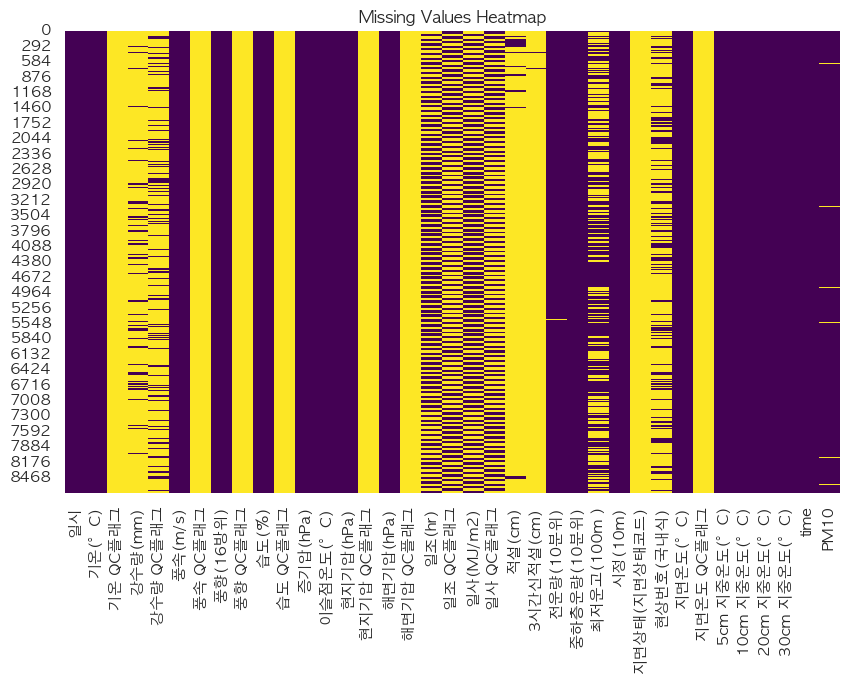

In [278]:
plot_missing_values_heatmap(df=weather_21)

### Plot Basic Statistics

In [279]:
display_basic_statistics(df=weather_21)

            기온(°C)  기온 QC플래그     강수량(mm)  강수량 QC플래그      풍속(m/s)  풍속 QC플래그  \
count  8759.000000       0.0  949.000000     1763.0  8757.000000       2.0   
mean     13.739194       NaN    1.250263        9.0     2.311328       9.0   
min     -18.500000       NaN    0.000000        9.0     0.000000       9.0   
25%       6.000000       NaN    0.000000        9.0     1.500000       9.0   
50%      14.600000       NaN    0.100000        9.0     2.200000       9.0   
75%      22.600000       NaN    1.100000        9.0     2.900000       9.0   
max      36.300000       NaN   64.700000        9.0     8.300000       9.0   
std      10.894786       NaN    3.398801        0.0     1.120906       0.0   

          풍향(16방위)  풍향 QC플래그        습도(%)  습도 QC플래그  ...  지면상태(지면상태코드)  \
count  8757.000000       2.0  8759.000000       0.0  ...           0.0   
mean    169.658559       9.0    65.589223       NaN  ...           NaN   
min       0.000000       9.0    19.000000       NaN  ...           NaN   
2

### Plot Time Series

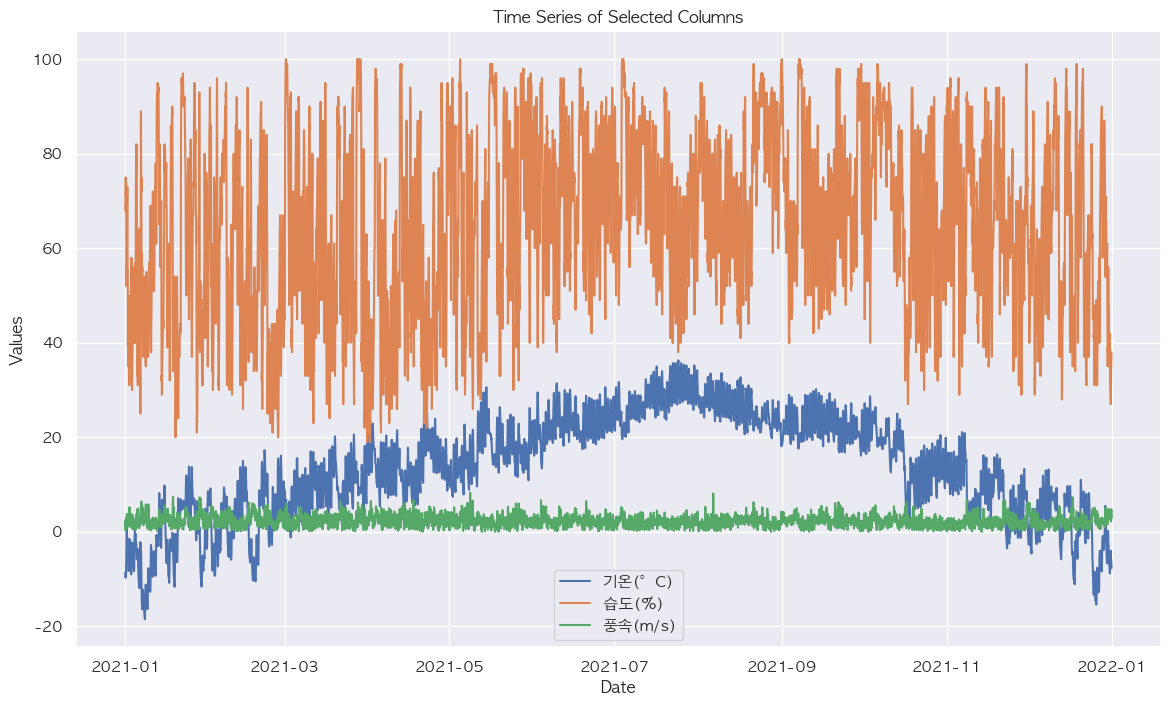

In [280]:
plot_time_series(df=weather_21, columns=['기온(°C)', '습도(%)', '풍속(m/s)'])

### Plot Correlation (based on PM10)

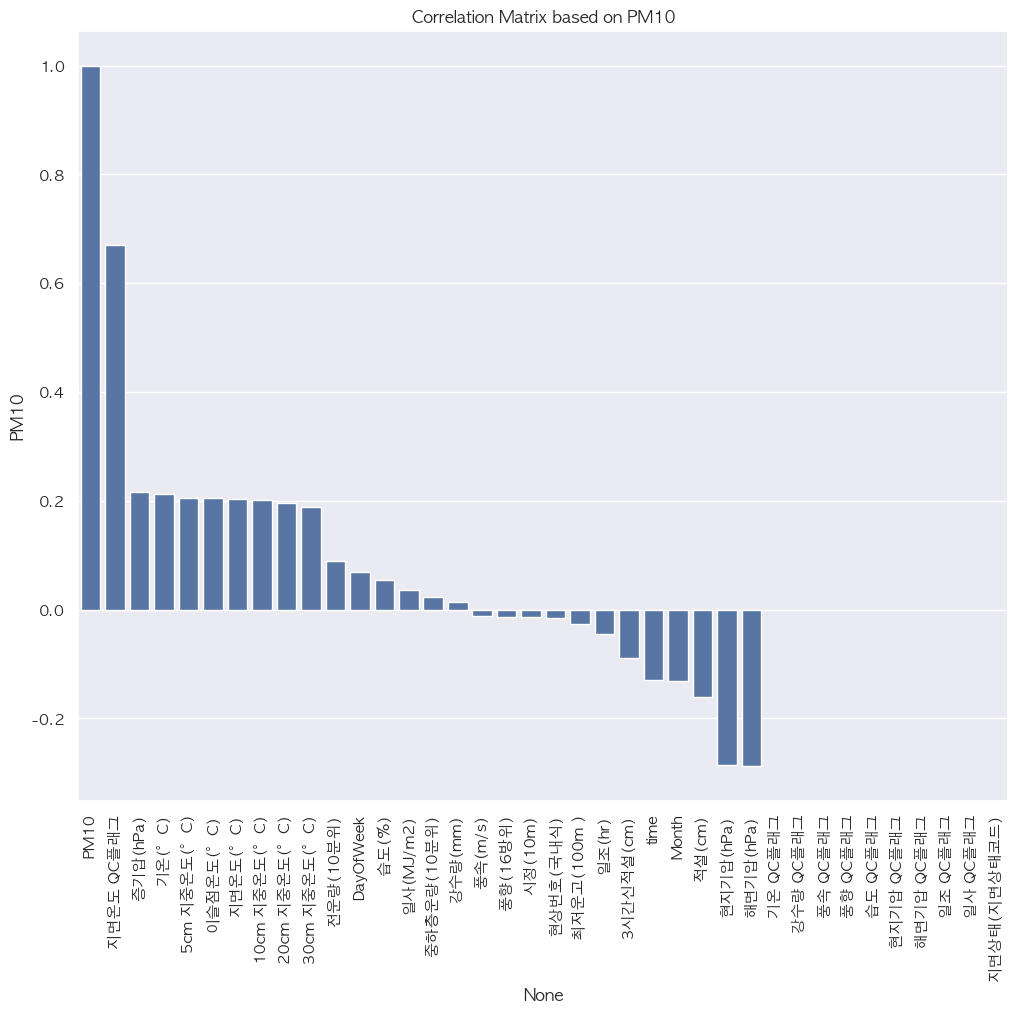

In [319]:
high_corr_list = plot_correlation_with_pm10(df=weather_21)

### Plot Distribution of certain features

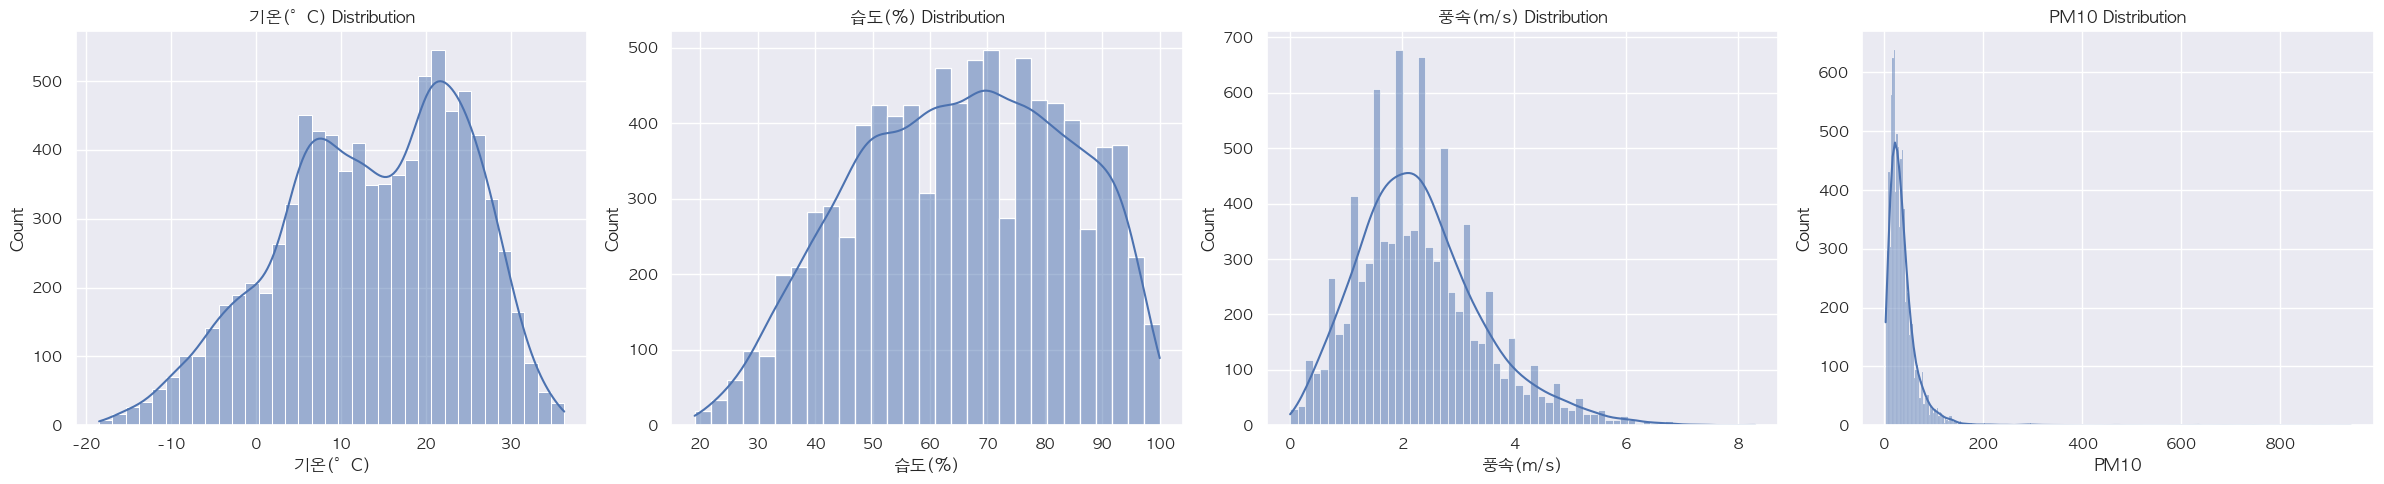

In [300]:
plot_distribution(df=weather_21, columns=['기온(°C)', '습도(%)', '풍속(m/s)', 'PM10'])

### Plot Scatter of PM10 and certain features

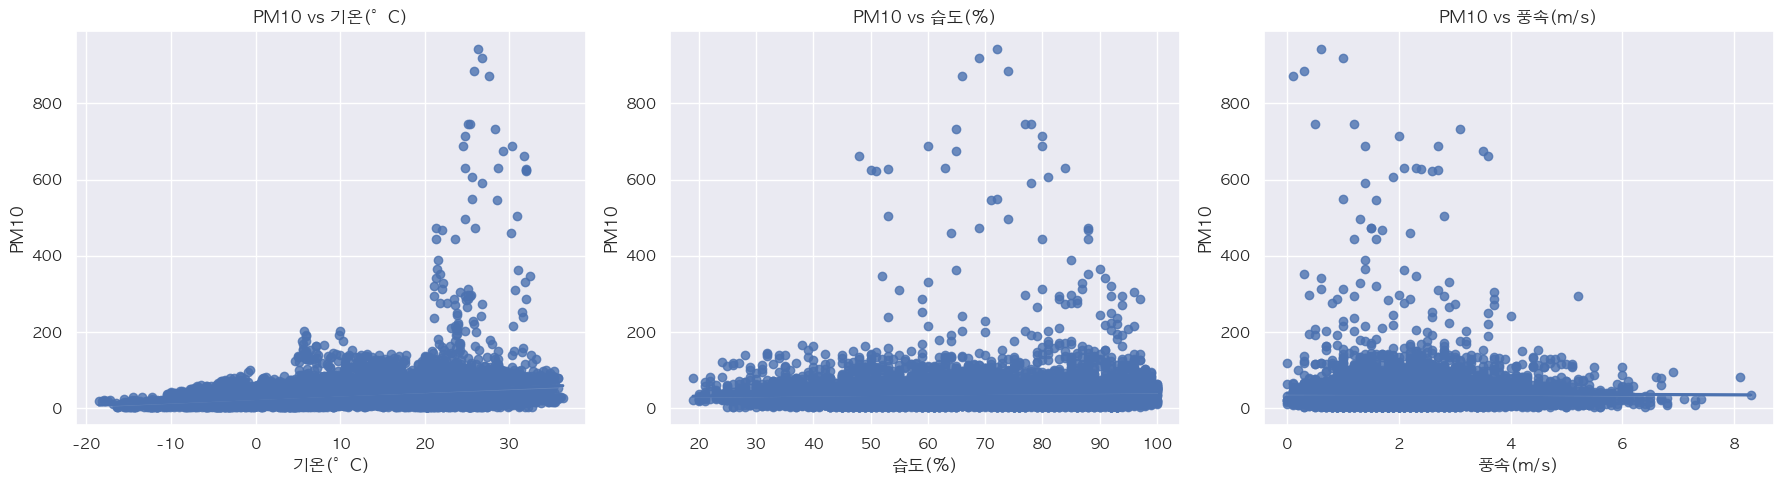

In [301]:
plot_scatter_with_regression(df=weather_21, target='PM10', columns=['기온(°C)', '습도(%)', '풍속(m/s)'])

Based on Correlation

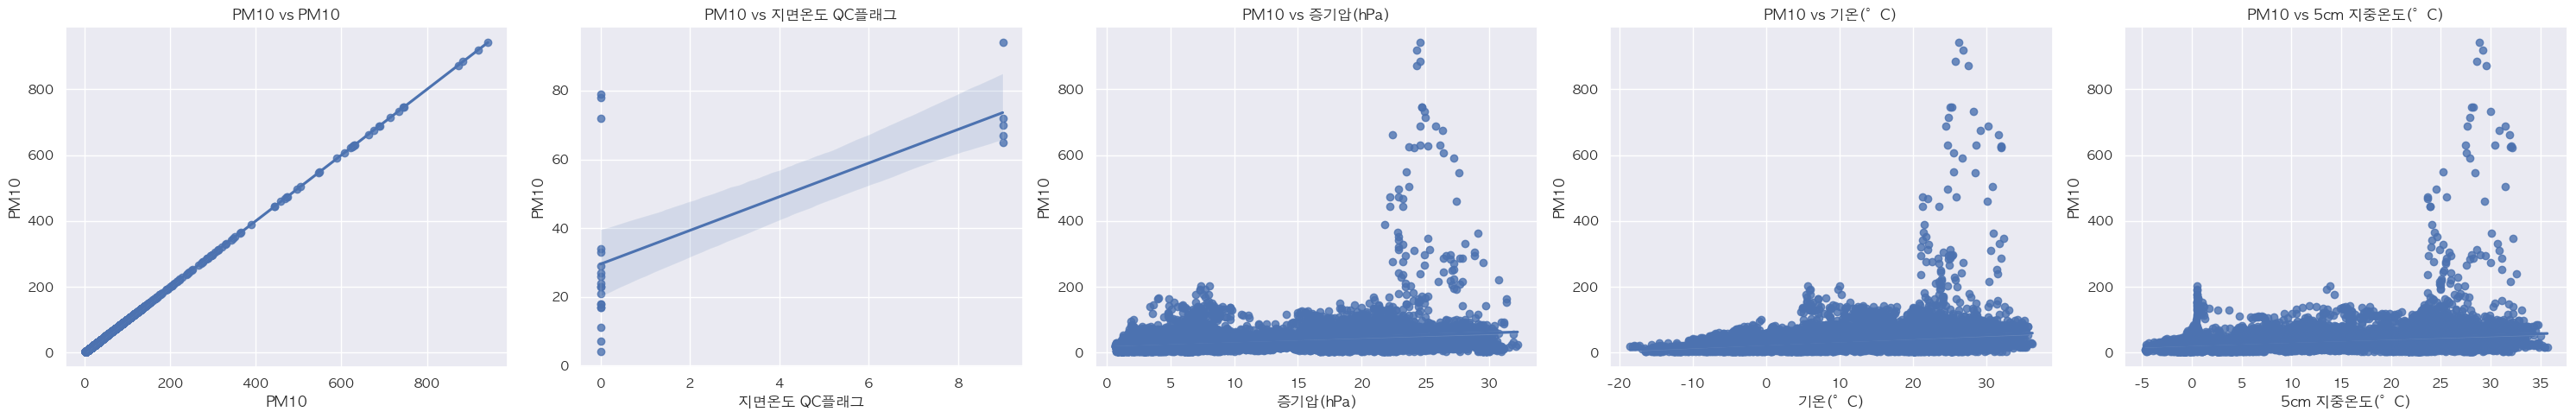

In [320]:
plot_scatter_with_regression(df=weather_21, target='PM10', columns=high_corr_list)

### Plot PM10 per month

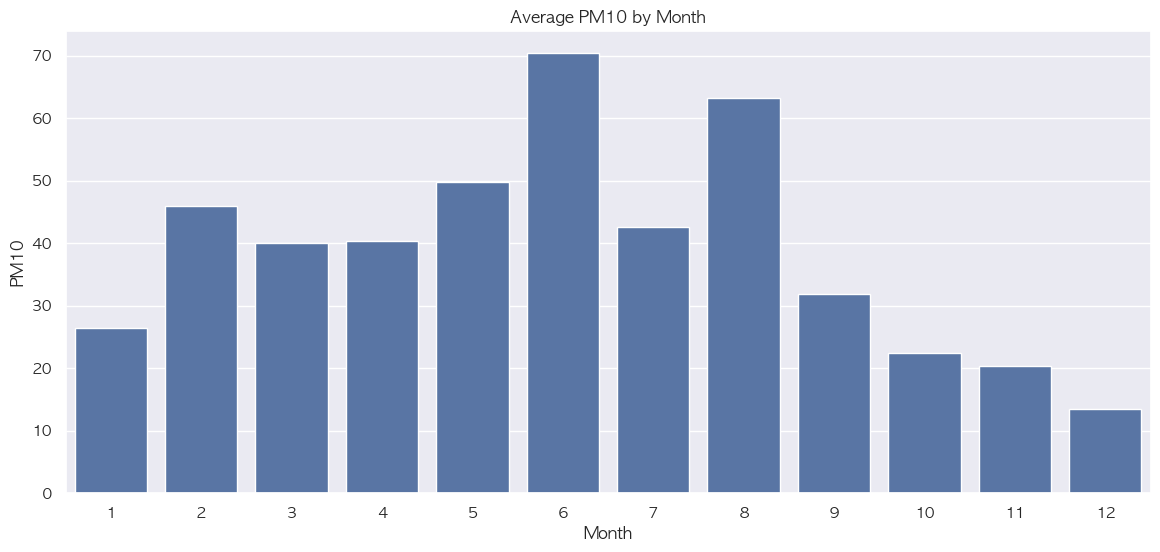

In [307]:
plot_monthly_pattern(df=weather_21, target='PM10')

### Plot PM10 per day

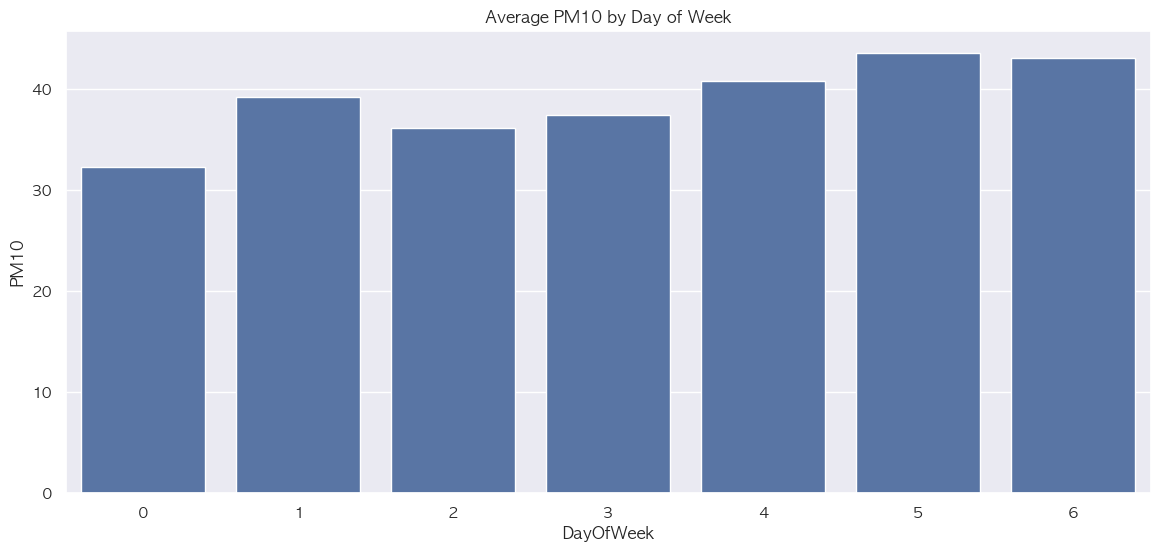

In [302]:
plot_day_of_week_pattern(df=weather_21, target='PM10')

## weather_22

###  Plot Missing values

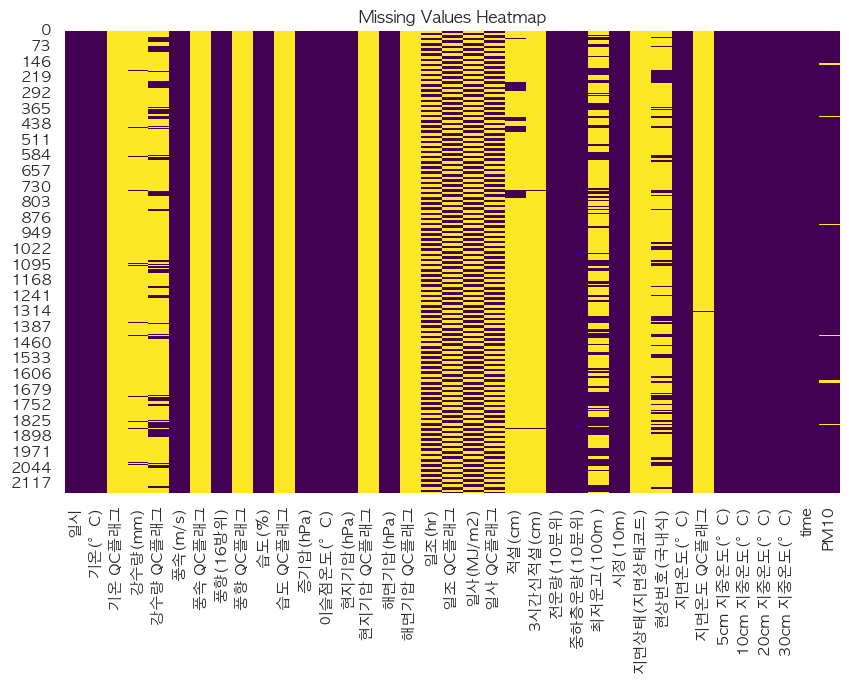

In [286]:
plot_missing_values_heatmap(df=weather_22)

### Plot Basic Statistics

In [287]:
display_basic_statistics(df=weather_22)

            기온(°C)  기온 QC플래그    강수량(mm)  강수량 QC플래그      풍속(m/s)  풍속 QC플래그  \
count  2160.000000       0.0  81.000000      382.0  2160.000000       0.0   
mean      1.518148       NaN   1.392593        9.0     2.430231       NaN   
min     -11.300000       NaN   0.000000        9.0     0.000000       NaN   
25%      -3.300000       NaN   0.000000        9.0     1.600000       NaN   
50%       1.200000       NaN   0.000000        9.0     2.300000       NaN   
75%       6.100000       NaN   0.900000        9.0     3.100000       NaN   
max      19.400000       NaN  32.200000        9.0     7.900000       NaN   
std       6.358060       NaN   4.087321        0.0     1.164067       NaN   

          풍향(16방위)  풍향 QC플래그        습도(%)  습도 QC플래그  ...  지면상태(지면상태코드)  \
count  2160.000000       0.0  2160.000000       0.0  ...           0.0   
mean    212.856481       NaN    57.306481       NaN  ...           NaN   
min       0.000000       NaN    17.000000       NaN  ...           NaN   
25%     16

### Plot Time Series

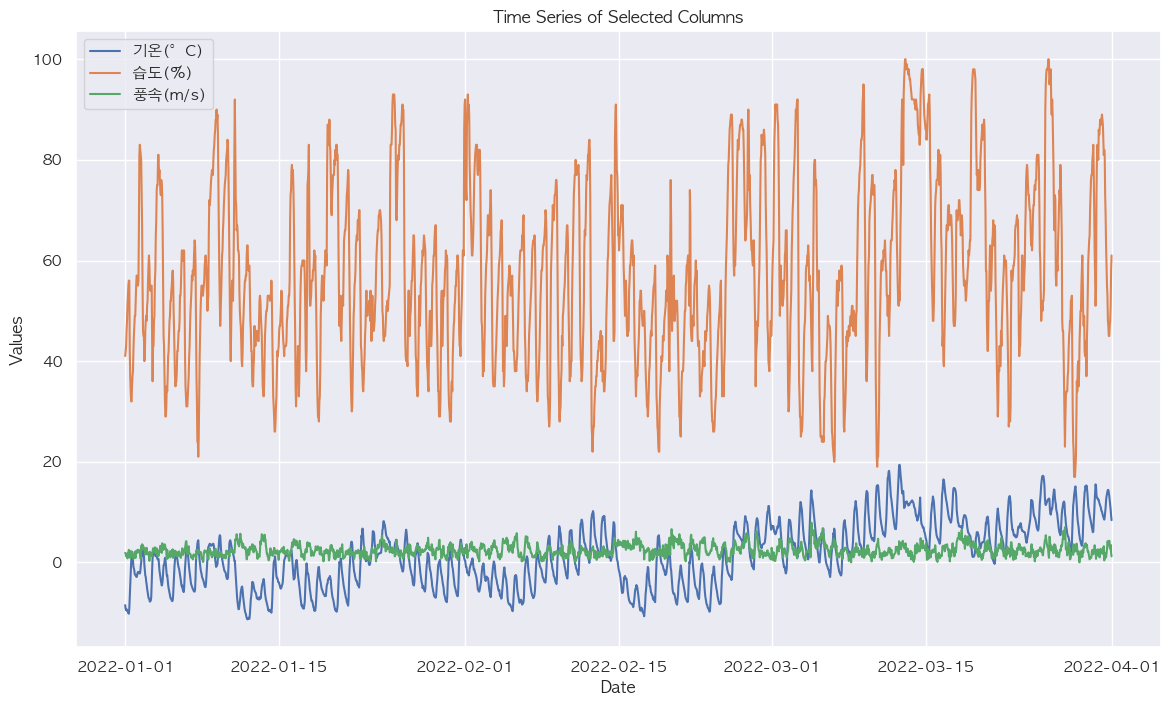

In [288]:
plot_time_series(df=weather_22, columns=['기온(°C)', '습도(%)', '풍속(m/s)'])

### Plot Correlation (based on PM10)

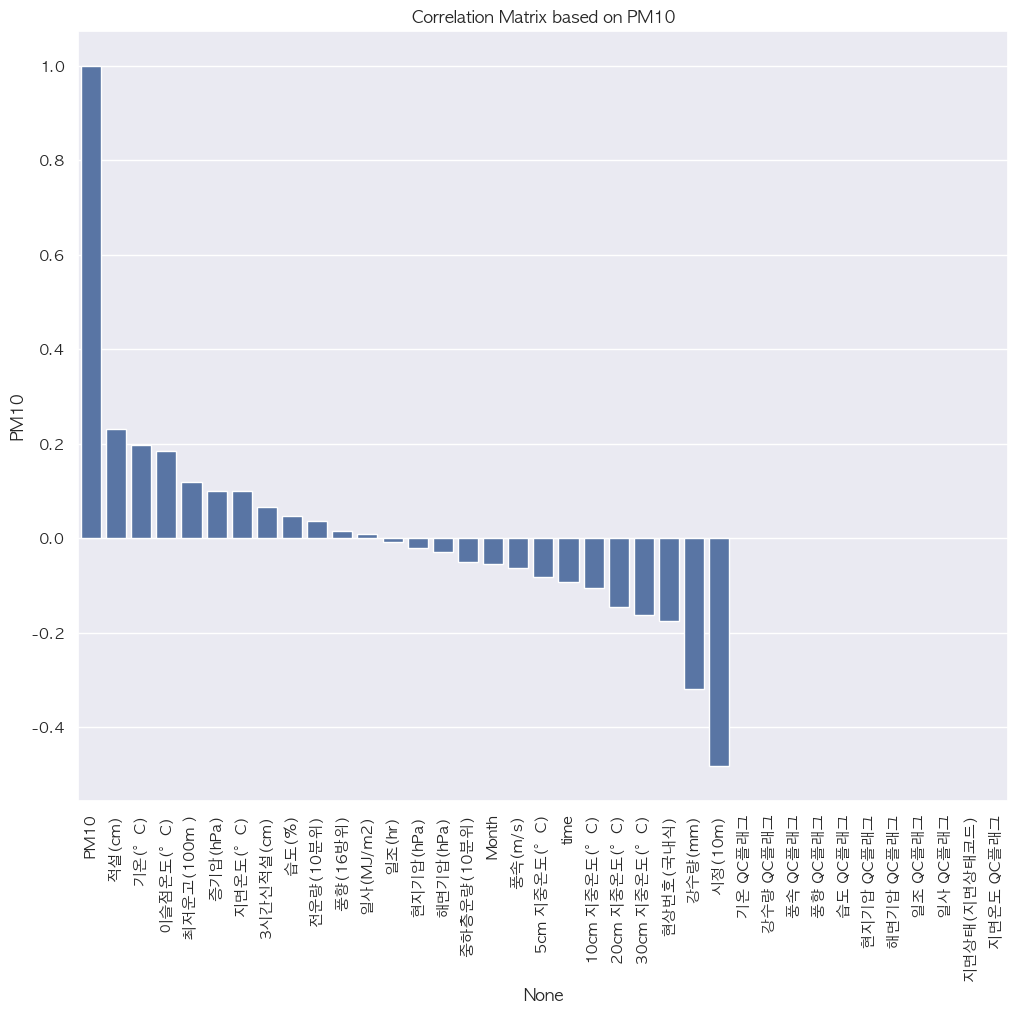

In [321]:
high_corr_list = plot_correlation_with_pm10(df=weather_22)

### Plot Distribution of certain features

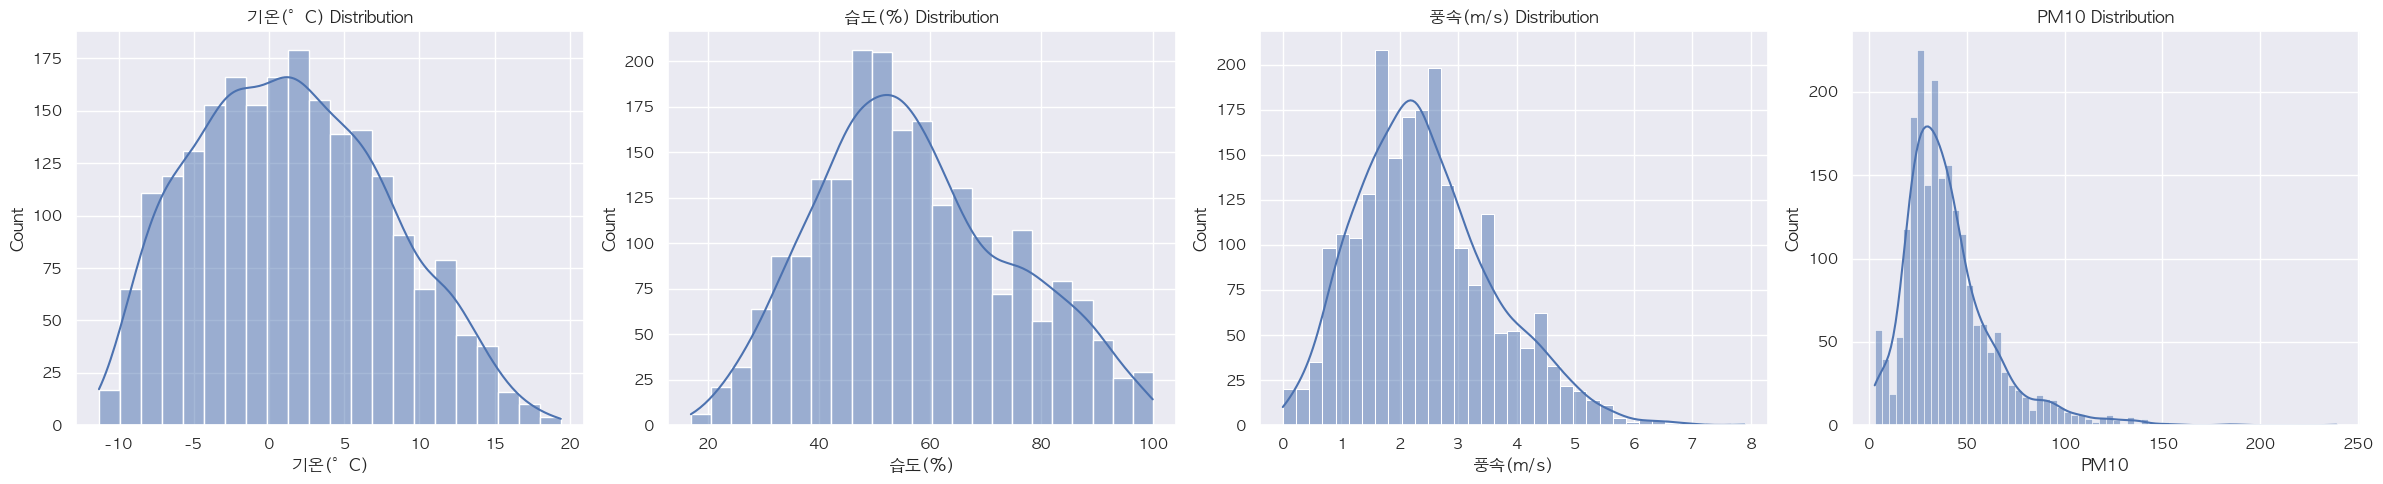

In [308]:
plot_distribution(df=weather_22, columns=['기온(°C)', '습도(%)', '풍속(m/s)', 'PM10'])

### Plot Scatter of PM10 and certain features

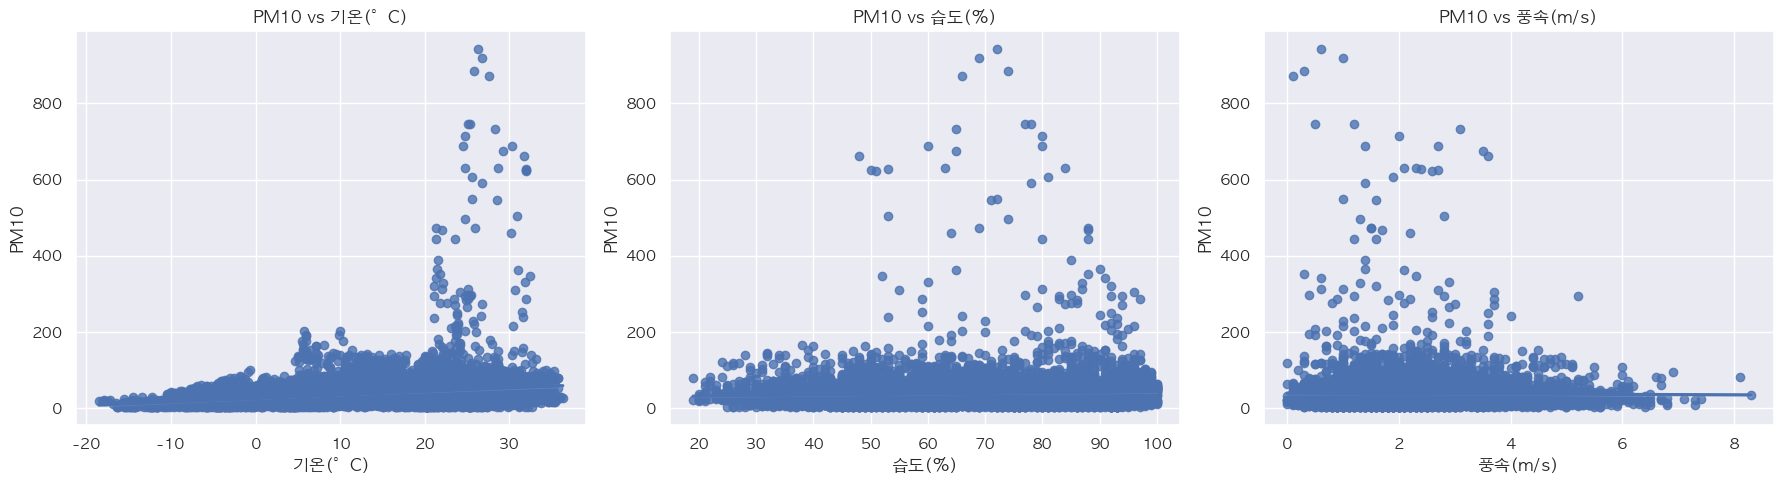

In [310]:
plot_scatter_with_regression(df=weather_21, target='PM10', columns=['기온(°C)', '습도(%)', '풍속(m/s)'])

Based on PM10

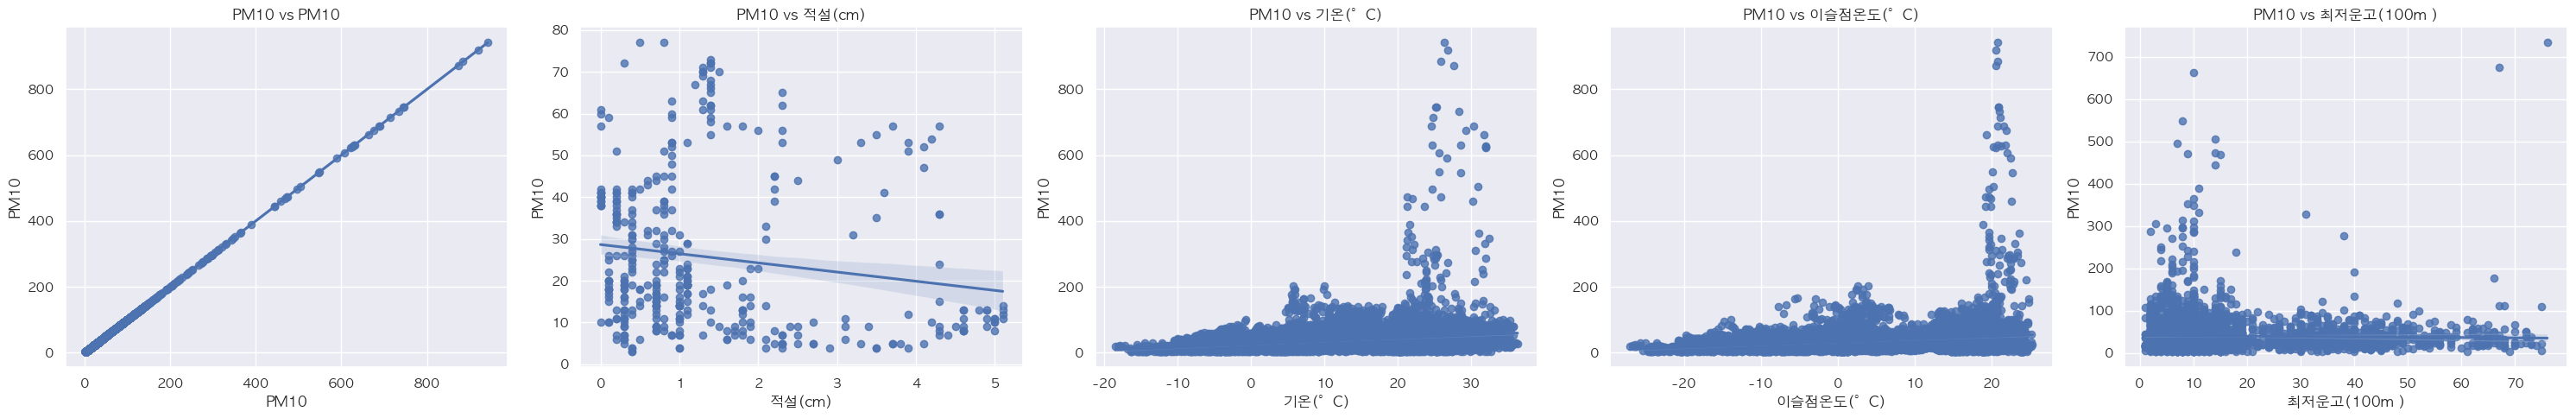

In [322]:
plot_scatter_with_regression(df=weather_21, target='PM10', columns=high_corr_list)

### Plot PM10 per month

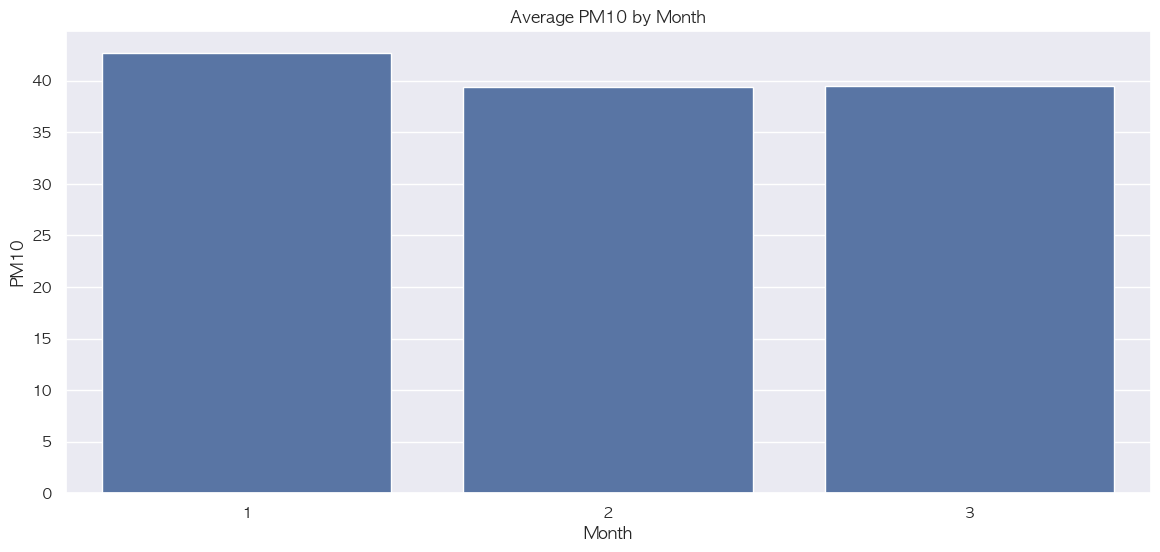

In [311]:
plot_monthly_pattern(df=weather_22, target='PM10')

In [312]:
weather_22.tail()

기온(°C)  기온 QC플래그  강수량(mm)  강수량 QC플래그  풍속(m/s)  풍속 QC플래그  \
일시                                                                             
2022-03-31 19:00:00    12.3       NaN      NaN        NaN      2.9       NaN   
2022-03-31 20:00:00    11.6       NaN      NaN        NaN      2.7       NaN   
2022-03-31 21:00:00    10.5       NaN      NaN        NaN      3.5       NaN   
2022-03-31 22:00:00     9.3       NaN      NaN        NaN      1.9       NaN   
2022-03-31 23:00:00     8.4       NaN      NaN        NaN      1.2       NaN   

                     풍향(16방위)  풍향 QC플래그  습도(%)  습도 QC플래그  ...  현상번호(국내식)  \
일시                                                        ...              
2022-03-31 19:00:00       340       NaN     47       NaN  ...        NaN   
2022-03-31 20:00:00       340       NaN     48       NaN  ...        NaN   
2022-03-31 21:00:00       320       NaN     51       NaN  ...        NaN   
2022-03-31 22:00:00        50       NaN     58       NaN  ...        NaN   
2022-03-31 23:00:00       360       NaN     61       NaN  ...        NaN   

                     지면온도(°C)  지면온도 QC플래그  5cm 지중온도(°C)  10cm 지중온도(°C)  \
일시                                                                       
2022-03-31 19:00:00      10.0         NaN          12.6           11.8   
2022-03-31 20:00:00       8.9         NaN          12.2           11.6   
2022-03-31 21:00:00       7.8         NaN          11.8           11.4   
2022-03-31 22:00:00       7.3         NaN          11.4           11.1   
2022-03-31 23:00:00       6.7         NaN          11.0           10.8   

                     20cm 지중온도(°C)  30cm 지중온도(°C)                time  PM10  \
일시                                                                            
2022-03-31 19:00:00           11.0           10.2 2022-03-31 19:00:00  11.0   
2022-03-31 20:00:00           11.0           10.3 2022-03-31 20:00:00  10.0   
2022-03-31 21:00:00           11.0           10.4 2022-03-31 21:00:00  11.0   
2022-03-31 22:00:00           10.9           10.5 2022-03-31 22:00:00  11.0   
2022-03-31 23:00:00           10.8           10.5 2022-03-31 23:00:00   9.0   

                     Month  
일시                          
2022-03-31 19:00:00      3  
2022-03-31 20:00:00      3  
2022-03-31 21:00:00      3  
2022-03-31 22:00:00      3  
2022-03-31 23:00:00      3  

[5 rows x 37 columns]

### Plot PM10 per day

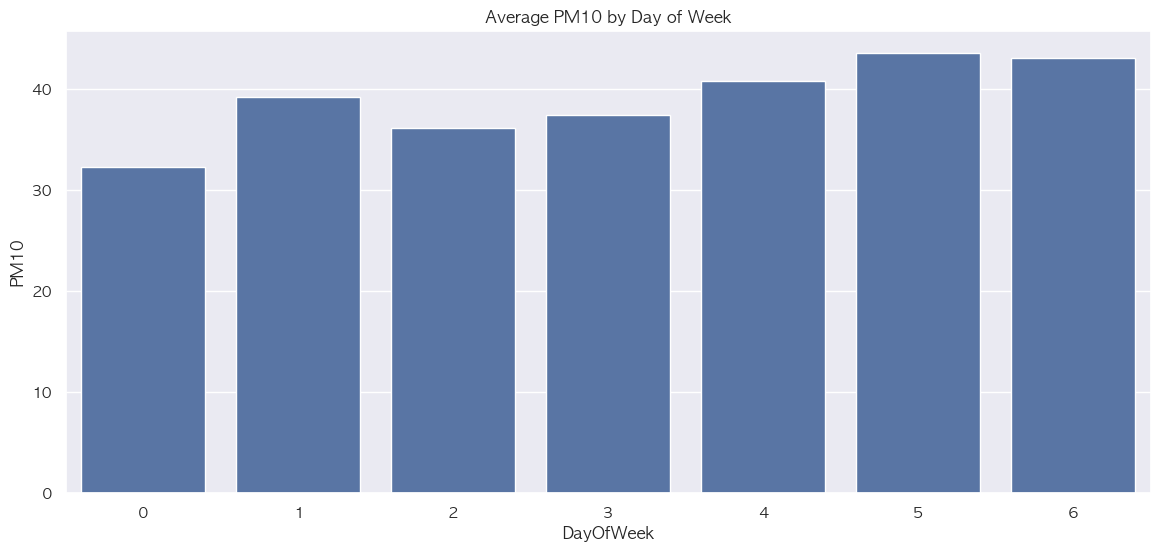

In [293]:
plot_day_of_week_pattern(df=weather_21, target='PM10')

## 시각화를 통해 알게된 사실을 정리
### 1. weather_22를 보면 3월까지의 데이터밖에 없다.
    - 월별 PM10 농도를 보면 달마다 그 평균값이 다른데 train을 구성할 때 weather_21의 data를 1월부터 3월까지만 사용하는 방향도 고려해볼만 하다.
    - 하지만 그렇게 되면 data의 개수가 너무 적어지기 때문에 조심해야 할 듯 하다.
### 2.PM10과의 상관관계가 weather_21일 때와 weather_22일 때가 다르다.
    - 이건 weather22에서 높은 상관관계를 보여준 feature에 대해 맞춰가는 것이 좋을 듯 하지만 막상 시각화해보면 그리 관계있어보이진 않아서 결국은 모두 쓸 것 같다.
### 3. NaN
    - 생각보다 전체적으로 NaN 값이 많았기 때문에 이에 유의해야 할 듯 하다.